In [2]:
import pandas as pd
import pm4py
import os
import numpy as np
import time
import uuid
import random

from pathlib import Path
from urllib.request import urlretrieve
from pm4py.objects.petri_net.obj import Marking
from pm4py.objects.petri_net.obj import PetriNet
from pm4py.objects.petri_net.utils.petri_utils import remove_transition, add_arc_from_to, remove_place
from pm4py.objects.process_tree.obj import ProcessTree
from pm4py.objects.process_tree.obj import Operator
from pm4py.objects.petri_net.utils import reduction

In [3]:
from urllib.request import urlretrieve
import os

# download from 4tu.nl
urlretrieve('https://data.4tu.nl/file/33632f3c-5c48-40cf-8d8f-2db57f5a6ce7/643dccf2-985a-459e-835c-a82bce1c0339', 'sepsis0.xes.gz')
sepsis_log = pm4py.read_xes('sepsis0.xes.gz')
os.unlink('sepsis0.xes.gz') # clean up
dataframe = pm4py.convert_to_dataframe(sepsis_log)

c:\Users\Harish\miniconda3\envs\snowflakes\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 1050/1050 [00:00<00:00, 1107.60it/s]


In [4]:
# import pm4py
# import pandas as pd

# # Save the DataFrame as a CSV file
# csv_file_path = "D:\Harish\Data Science\Final Thesis\Event logs\Sepsis log\Sepsis_log.csv"
# dataframe.to_csv(csv_file_path, index=False)

# print(f"Event log successfully converted to CSV format and saved at {csv_file_path}")

In [5]:
len(pm4py.get_variants_as_tuples(sepsis_log))

846

In [6]:
unique_cases = dataframe['case:concept:name'].unique()

len(unique_cases)

1050

In [7]:
# len(dataframe)

# unique_cases = dataframe['case:concept:name'].unique()
# print(unique_cases)
# midpoint = (len(unique_cases)) * 3 // 32
# half_traces = unique_cases[:midpoint]
# filtered_df = dataframe[dataframe['case:concept:name'].isin(half_traces)]
# filtered_event_log = pm4py.convert_to_event_log(filtered_df)

# # print(filtered_event_log)

# # len(filtered_df)

# unique_cases = filtered_df['case:concept:name'].unique()

# len(unique_cases)

In [8]:
# Step 1: Count the number of events per case ID
trace_lengths = dataframe['case:concept:name'].value_counts().reset_index()
trace_lengths.columns = ['case:concept:name', 'event_count']

# Step 2: Sort by the number of events in ascending order
trace_lengths_sorted = trace_lengths.sort_values(by='event_count', ascending=True)

# Step 3: Determine the number of long traces to remove
# Let's say we want to remove the top 20% longest traces
# Change 0.2 to any proportion you want for experimentation
threshold_index = int(len(trace_lengths_sorted) * 0.2)
traces_to_remove = trace_lengths_sorted['case:concept:name'][-threshold_index:]

# Step 4: Filter out the long traces from the original dataframe
filtered_df = dataframe[~dataframe['case:concept:name'].isin(traces_to_remove)]

# Optional: Convert to event log format if needed
filtered_event_log = pm4py.convert_to_event_log(filtered_df)

In [9]:
pm4py.write_xes(filtered_event_log, 'D:/Harish/Data Science/Final Thesis/Abstraction code/filtered_sepsisoriginal.xes')
path = "/Harish/Data Science/Final Thesis/Code/abstracted_sepsisnew1.xes"
abstracted_sepsislog = pm4py.read_xes(path)

parsing log, completed traces :: 100%|██████████| 840/840 [00:00<00:00, 7397.19it/s]


In [10]:
# filtered_df = dataframe[~dataframe['case:concept:name'].isin(traces_to_remove)]

# # filtered_df.head(20)

# # len(filtered_df)

unique_cases1 = filtered_df['case:concept:name'].unique()

len(unique_cases1)

840

In [11]:
len(pm4py.get_variants_as_tuples(filtered_event_log))

636

In [12]:
# Suppose you want 50% of short traces and 50% of long traces

# trace_length_df = dataframe.groupby('case:concept:name').size().reset_index(name='trace_length')

# short_traces = trace_length_df[trace_length_df['trace_length'] <= 5]['case:concept:name']
# long_traces = trace_length_df[trace_length_df['trace_length'] > 5]['case:concept:name']
# short_sample = dataframe[dataframe['case:concept:name'].isin(short_traces)].sample(frac=0.1, random_state=1)
# long_sample = dataframe[dataframe['case:concept:name'].isin(long_traces)].sample(frac=0.1, random_state=1)
# filtered_df = pd.concat([short_sample, long_sample])
# filtered_df = filtered_df.sort_values(by=['case:concept:name', 'time:timestamp']).reset_index(drop=True)

In [13]:
len(filtered_df)

filtered_df.head(20)

InfectionSuspected org:group DiagnosticBlood DisfuncOrg SIRSCritTachypnea  \
22               True         A            True      False              True   
23                NaN         C             NaN        NaN               NaN   
24                NaN         B             NaN        NaN               NaN   
25                NaN         B             NaN        NaN               NaN   
26                NaN         B             NaN        NaN               NaN   
27                NaN         A             NaN        NaN               NaN   
28                NaN         A             NaN        NaN               NaN   
29                NaN         A             NaN        NaN               NaN   
30                NaN         F             NaN        NaN               NaN   
31                NaN         B             NaN        NaN               NaN   
32                NaN         B             NaN        NaN               NaN   
33                NaN         E             NaN        NaN               NaN   
34               True         A            True      False             False   
35                NaN         C             NaN        NaN               NaN   
36                NaN         A             NaN        NaN               NaN   
37                NaN         B             NaN        NaN               NaN   
38                NaN         B             NaN        NaN               NaN   
39                NaN         A             NaN        NaN               NaN   
40                NaN         A             NaN        NaN               NaN   
41                NaN         G             NaN        NaN               NaN   

   Hypotensie SIRSCritHeartRate Infusion DiagnosticArtAstrup  \
22      False              True     True               False   
23        NaN               NaN      NaN                 NaN   
24        NaN               NaN      NaN                 NaN   
25        NaN               NaN      NaN                 NaN   
26        NaN               NaN      NaN                 NaN   
27        NaN               NaN      NaN                 NaN   
28        NaN               NaN      NaN                 NaN   
29        NaN               NaN      NaN                 NaN   
30        NaN               NaN      NaN                 NaN   
31        NaN               NaN      NaN                 NaN   
32        NaN               NaN      NaN                 NaN   
33        NaN               NaN      NaN                 NaN   
34      False              True     True                True   
35        NaN               NaN      NaN                 NaN   
36        NaN               NaN      NaN                 NaN   
37        NaN               NaN      NaN                 NaN   
38        NaN               NaN      NaN                 NaN   
39        NaN               NaN      NaN                 NaN   
40        NaN               NaN      NaN                 NaN   
41        NaN               NaN      NaN                 NaN   

        concept:name  ...  DiagnosticLacticAcid lifecycle:transition Diagnose  \
22   ER Registration  ...                  True             complete        B   
23         ER Triage  ...                   NaN             complete      NaN   
24               CRP  ...                   NaN             complete      NaN   
25        LacticAcid  ...                   NaN             complete      NaN   
26        Leucocytes  ...                   NaN             complete      NaN   
27  ER Sepsis Triage  ...                   NaN             complete      NaN   
28         IV Liquid  ...                   NaN             complete      NaN   
29    IV Antibiotics  ...                   NaN             complete      NaN   
30      Admission NC  ...                   NaN             complete      NaN   
31               CRP  ...                   NaN             complete      NaN   
32               CRP  ...                   NaN             complete      NaN   
33   

In [14]:
import pandas as pd

# Extract function the trace (sequence of events) for each case
def extract_trace(case_df):
    return tuple(case_df['concept:name'])

# Group the dataframe by 'case:concept:name' and extract trace for each case
case_traces_df = filtered_df.groupby('case:concept:name', group_keys=False).apply(extract_trace).reset_index(name='trace')

# Group by the 'trace' to count how many cases have the same trace
trace_grouped_df = case_traces_df.groupby('trace').size().reset_index(name='count')

# Filter for k cases
k = 1
filtered_trace_grouped_df = trace_grouped_df[trace_grouped_df['count'] >= k]

# Get the traces for k occurrences
valid_traces = filtered_trace_grouped_df['trace'].tolist()

# Filter the original df to keep with valid traces
valid_case_traces_df = case_traces_df[case_traces_df['trace'].isin(valid_traces)]

# Filter the original df to keep only the cases that correspond to valid traces
filtered_event_df = filtered_df[filtered_df['case:concept:name'].isin(valid_case_traces_df['case:concept:name'])]

# len(filtered_event_df)

# Display the filtered event log
# print(filtered_event_log)
# len(filtered_event_log)
# filtered_event_df.head(10)
# # Calculate the k-anonymity by finding the minimum count (since we filter for at least k=5, the minimum will be 5 or higher)
# if not filtered_trace_grouped_df.empty:
#     k_anonymity = filtered_trace_grouped_df['count'].min()
#     print(f"The k-anonymity for k={k} is: {k_anonymity}")
# else:
#     print(f"No trace has at least {k} occurrences, k-anonymity is not applicable.")

C:\Users\Harish\AppData\Local\Temp\ipykernel_25384\28751840.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  case_traces_df = filtered_df.groupby('case:concept:name', group_keys=False).apply(extract_trace).reset_index(name='trace')


In [15]:
unique_cases2 = filtered_event_df['case:concept:name'].unique()

len(unique_cases2)

840

In [16]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# trace_grouped_df2.head(62)

In [17]:
filtered_event_log2 = pm4py.convert_to_event_log(filtered_event_df)

len(pm4py.get_variants_as_tuples(filtered_event_log2))

636

In [18]:
#Group the df by 'case:concept:name' and extract trace for each case
case_traces_df2 = filtered_event_df.groupby('case:concept:name', group_keys=False).apply(extract_trace).reset_index(name='trace')

trace_grouped_df = case_traces_df2.groupby('trace').size().reset_index(name='case_count')

#Calculate the frequency of each "number of cases per trace variant

trace_variant_count_frequency = trace_grouped_df['case_count'].value_counts().reset_index()
trace_variant_count_frequency.columns = ['number_of_cases_per_variant', 'frequency']

# Display the frequency of the number of cases per trace variant
print(trace_variant_count_frequency)

    number_of_cases_per_variant  frequency
0                             1        574
1                             2         35
2                             3          9
3                             4          7
4                             5          4
5                            35          1
6                            13          1
7                            22          1
8                            24          1
9                            11          1
10                            9          1
11                            7          1


C:\Users\Harish\AppData\Local\Temp\ipykernel_25384\2720546785.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  case_traces_df2 = filtered_event_df.groupby('case:concept:name', group_keys=False).apply(extract_trace).reset_index(name='trace')


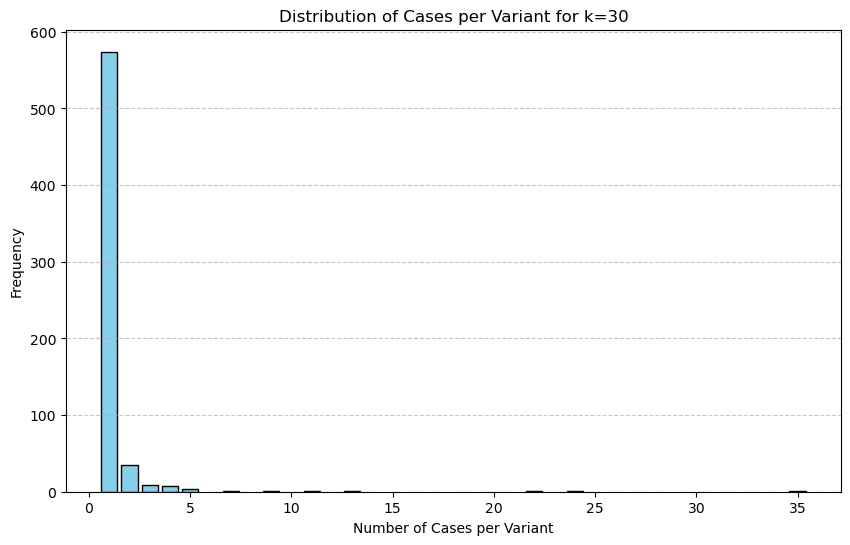

In [19]:
import matplotlib.pyplot as plt

# Function to plot the number of cases per variant
def plot_cases_per_variant(dataframe, k_value):
    # Extract the x and y values from the dataframe
    number_of_cases_per_variant = dataframe['number_of_cases_per_variant']
    frequency = dataframe['frequency']
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(number_of_cases_per_variant, frequency, color='skyblue', edgecolor='black')
    plt.xlabel('Number of Cases per Variant')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Cases per Variant for k={k_value}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Display plot
    plt.show()

plot_cases_per_variant(trace_variant_count_frequency, k_value=30)

In [20]:
# unique_traces = dataframe['case:concept:name'].unique()
# print(unique_traces)
# midpoint = (len(unique_traces) * 5) // 16
# half_traces = unique_traces[:midpoint]
# filtered_event_df = dataframe[dataframe['case:concept:name'].isin(half_traces)]
# filtered_event_log = pm4py.convert_to_event_log(filtered_event_df)
# # os.unlink("/Harish/Data Science/Final Thesis/Sepsis log/Sepsis Cases - Event Log.xes.gz") # clean up
# # dataframe.iloc[0][0]

In [21]:
# # Extract unique events from each DataFrame
# event_log_events = set(dataframe['concept:name'].unique())  # Replace 'event_log_df' with your event log DataFrame
# dataframe_events = set(filtered_event_df['concept:name'].unique())      # Replace 'dataframe' with your other DataFrame

# # Compare and check for missing events
# missing_in_dataframe = event_log_events - dataframe_events
# missing_in_event_log = dataframe_events - event_log_events

# if missing_in_dataframe:
#     print("The following events are in the event log but missing in the DataFrame:")
#     print(missing_in_dataframe)
# else:
#     print("All events from the event log are present in the DataFrame.")

# if missing_in_event_log:
#     print("The following events are in the DataFrame but missing in the event log:")
#     print(missing_in_event_log)
# else:
#     print("All events from the DataFrame are present in the event log.")


petrinet1 = pm4py.read_pnml("/Harish/Data Science/Final Thesis/Admission.pnml")
petrinet2 = pm4py.read_pnml("/Harish/Data Science/Final Thesis/Discharge.pnml")
# #c:\Python36\lib\site-packages\pm4py\objects\petri_net\importer\variants\pnml.py:343: UserWarning: the Petri net has been imported without a specified final marking. Please create it using the method pm4py.generate_marking
#   warnings.warn("the Petri net has been imported without a specified final marking. Please create it using the method pm4py.generate_marking")
petrinet3 = pm4py.read_pnml("/Harish/Data Science/Final Thesis/ER.pnml")
petrinet4 = pm4py.read_pnml("/Harish/Data Science/Final Thesis/Lab pattern.pnml")

In [22]:
from pm4py.objects.petri_net.importer import importer as pnml_importer
from pm4py.objects.petri_net.exporter import exporter as pnml_exporter
from pm4py.objects.petri_net.utils import petri_utils

pn1, im1, fm1 = pm4py.read_pnml("/Harish/Data Science/Final Thesis/Activity patterns/Sepsis patterns/Admission pattern.pnml")
# pn_1 = pm4py.generate_marking(petrinet1, {'p3': 1})
# pn1 = pm4py.write_pnml(pn_1, im, fm, "/Harish/Data Science/Final Thesis/Admission.pnml")
# pnml_exporter.apply(pn1, "/Harish/Data Science/Final Thesis/Admission_modified.pnml", final_marking=fm1)

pn2, im2, fm2 = pm4py.read_pnml("/Harish/Data Science/Final Thesis/Activity patterns/Sepsis patterns/Discharge.pnml")
# pn_2 = pm4py.generate_marking(petrinet2, {'p5': 1})
# pnml_exporter.apply(pn2, pn_2, "/Harish/Data Science/Final Thesis/Discharge_modified.pnml", final_marking=fm2)

pn3, im3, fm3 = pm4py.read_pnml("/Harish/Data Science/Final Thesis/Activity patterns/Sepsis patterns/ER pattern.pnml")
# pn_3 = pm4py.generate_marking(petrinet3, {'p9': 1})
# pnml_exporter.apply(pn3, pn_3, "/Harish/Data Science/Final Thesis/ER_modified.pnml", final_marking=fm3)

pn5, im5, fm5 = pm4py.read_pnml("/Harish/Data Science/Final Thesis/Activity patterns/Sepsis patterns/IV pattern.pnml")
# pn_4 = pm4py.generate_marking(petrinet4, {'p24': 1})
# pnml_exporter.apply(pn4, pn_4, "/Harish/Data Science/Final Thesis/Lab_pattern_modified.pnml", final_marking=fm4)

pn4, im4, fm4 = pm4py.read_pnml("/Harish/Data Science/Final Thesis/Activity patterns/Sepsis patterns/Lab pattern.pnml")

pn6, im6, fm6 = pm4py.read_pnml("/Harish/Data Science/Final Thesis/Activity patterns/Sepsis patterns/Return ER pattern.pnml")

# print(pn1)
# print(pn1[0])
# print(pn2)
# print(pn3)
# print(pn4)

c:\Users\Harish\miniconda3\envs\snowflakes\Lib\site-packages\pm4py\objects\petri_net\importer\variants\pnml.py:354: UserWarning: the Petri net has been imported without a specified final marking. Please create it using the method pm4py.generate_marking
  warnings.warn("the Petri net has been imported without a specified final marking. Please create it using the method pm4py.generate_marking")


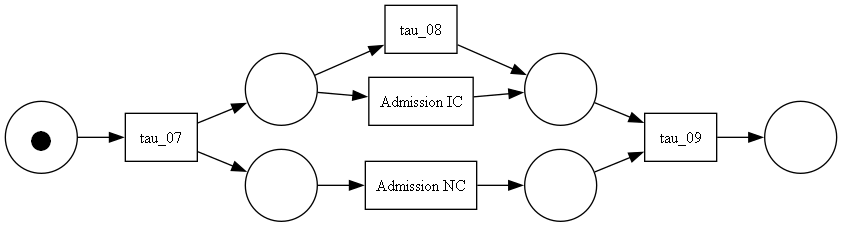

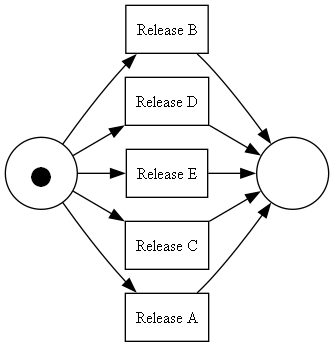

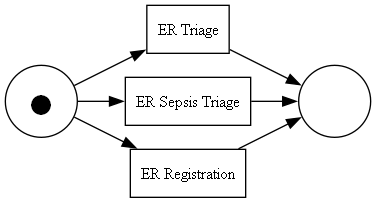

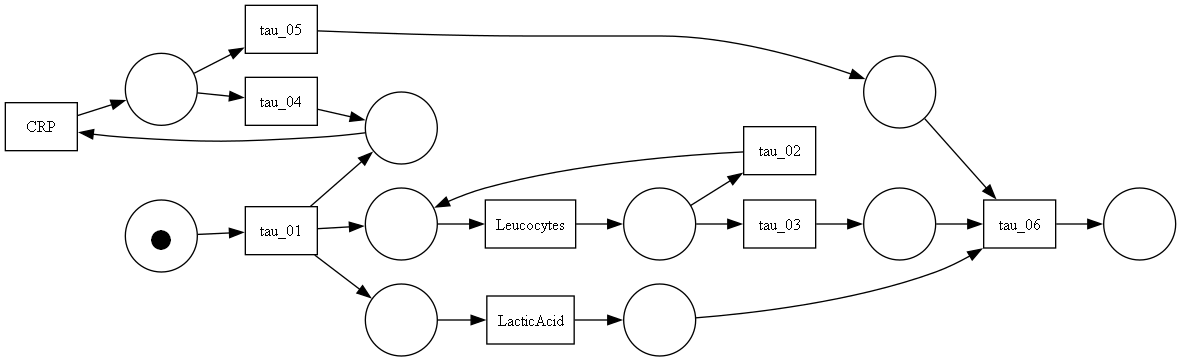

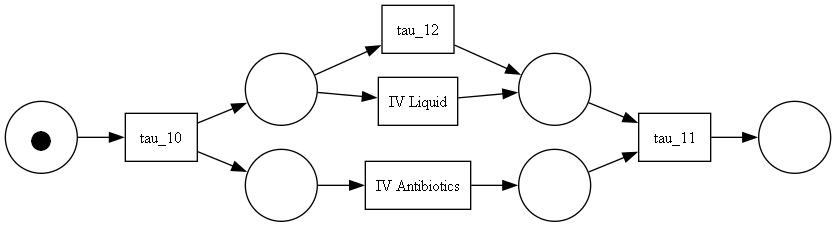

In [23]:
pm4py.view_petri_net(pn1,im1, format='png')
pm4py.view_petri_net(pn2,im2, format='png')
pm4py.view_petri_net(pn3,im3, format='png')
pm4py.view_petri_net(pn4,im4, format='png')
pm4py.view_petri_net(pn5,im5, format='png')
# pm4py.view_petri_net(pn6,im6, format='png')

In [24]:
class Counts(object):
    """
    Shared variables among executions
    """

    def __init__(self):
        """
        Constructor
        """
        self.num_places = 0
        self.num_hidden = 0
        self.num_visible_trans = 0
        self.num_skips = 0  # New count for skip transitions
        self.num_loops = 0  # New count for loop transitions
        self.dict_skips = {}
        self.dict_loops = {}

    def inc_places(self):
        """
        Increase the number of places
        """
        self.num_places = self.num_places + 1


    def inc_no_hidden(self):
        """
        Increase the number of hidden transitions
        """
        self.num_hidden = self.num_hidden + 1


    def inc_no_visible(self):
        """
        Increase the number of visible transitions
        """
        self.num_visible_trans = self.num_visible_trans + 1
    
    def inc_skips(self):
        """
        Increase the number of skip transitions
        """
        self.num_skips += 1

    def inc_loops(self):
        """
        Increase the number of loop transitions
        """
        self.num_loops += 1

In [25]:
def get_new_place(counts): #Create a new place in the Petri net

    counts.inc_places()
    return PetriNet.Place('p_' + str(counts.num_places))

def get_transition(counts, label): #Create a transitions with the specified label in the Petri net
 
    counts.inc_no_visible()
    if label in ["skip", "loop"]:
        return PetriNet.Transition(str(uuid.uuid4()), label)
    else:
        return PetriNet.Transition(str(uuid.uuid4()), label)
    
# def get_new_hidden_trans(counts, type_trans="unknown"): #Base function
#     """
#     Create a new hidden transition in the Petri net
#     """
#     counts.inc_no_hidden()
#     return PetriNet.Transition(type_trans, None)



In [26]:
def get_new_hidden_trans(counts, type_trans="unknown"):
      
    # Increment the hidden transition counter
    counts.inc_no_hidden()

    # Generate a dynamic label based on the type of transition and current count
    label = f"{type_trans}"

    # Create and return the new transition
    return PetriNet.Transition(label, None)

IV Pattern

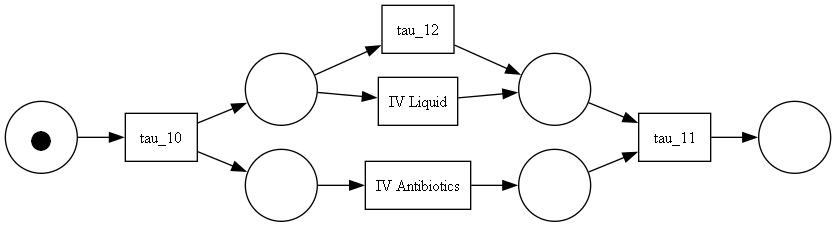

places: [ p1, p2, p3, p4, p5, p6 ]
transitions: [ (t1, 'tau_07'), (t2, 'Admission IC'), (t3, 'tau_08'), (t4, 'Admission NC'), (t5, 'tau_09') ]
arcs: [ (t1, 'tau_07')->p2, (t1, 'tau_07')->p4, (t2, 'Admission IC')->p3, (t3, 'tau_08')->p3, (t4, 'Admission NC')->p5, (t5, 'tau_09')->p6, p1->(t1, 'tau_07'), p2->(t2, 'Admission IC'), p2->(t3, 'tau_08'), p3->(t5, 'tau_09'), p4->(t4, 'Admission NC'), p5->(t5, 'tau_09') ]


In [27]:
pm4py.view_petri_net(pn5,im5,format='png')
print(pn1)

In [28]:
def find_isolated_places_with_arcs(petri_net):
     
    place_connections = {}

    
    incoming_arcs = {}
    outgoing_arcs = {}

    # Iterate over arcs 
    for arc in petri_net.arcs:
        source_place = arc.source
        target_place = arc.target

        # Update incoming arc count for the target place
        place_connections[target_place] = place_connections.get(target_place, {'incoming': 0, 'outgoing': 0})
        place_connections[target_place]['incoming'] += 1

        # Update outgoing arc count for the source place
        place_connections[source_place] = place_connections.get(source_place, {'incoming': 0, 'outgoing': 0})
        place_connections[source_place]['outgoing'] += 1

        # Store incoming arc for each place
        incoming_arcs[target_place] = incoming_arcs.get(target_place, [])
        incoming_arcs[target_place].append(arc)

        # Store outgoing arc for each place
        outgoing_arcs[source_place] = outgoing_arcs.get(source_place, [])
        outgoing_arcs[source_place].append(arc)

    # Find places without incoming or outgoing arcs
    isolated_places = {
        'incoming': {place: incoming_arcs.get(place, []) for place, connections in place_connections.items() if connections['incoming'] == 0},
        'outgoing': {place: outgoing_arcs.get(place, []) for place, connections in place_connections.items() if connections['outgoing'] == 0},
    }

    return isolated_places


isolated_places = find_isolated_places_with_arcs(pn5)
# print(isolated_places)


isolated_incoming_places_pn51 = isolated_places['incoming']
isolated_outgoing_places_pn51 = isolated_places['outgoing']


print("Isolated Incoming Places:", isolated_incoming_places_pn51)
print("Isolated Outgoing Places:", isolated_outgoing_places_pn51)


Isolated Incoming Places: {p1: []}
Isolated Outgoing Places: {p2: []}


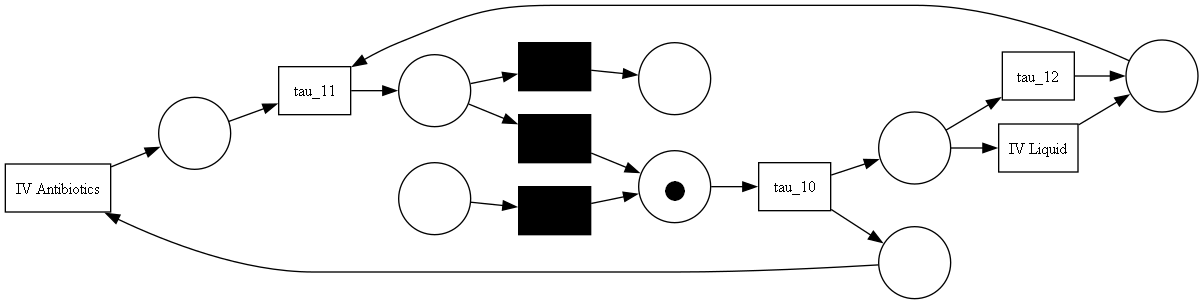

In [29]:
def add_place_transition_arc_to_incoming_places_p51(petri_net, incoming_places, outgoing_places, counts):    #BASE CODE WORKS
    petri_net9 = PetriNet()

    # Copy existing places, transitions, and arcs
    petri_net9.places.update(pn5.places)
    petri_net9.transitions.update(pn5.transitions)
    petri_net9.arcs.update(pn5.arcs)

    # Add new place
    source_place1 = get_new_place(counts)
    petri_net9.places.add(source_place1)

    # Add new transition
    # source_transition1 = get_transition(counts, label="tau_transition1")
    source_transition1 = get_new_hidden_trans(counts,"tau_transition01")
    petri_net9.transitions.add(source_transition1)

    # Add arc from place to transition
    place_to_transition_arc = PetriNet.Arc(source_place1, source_transition1, weight=1)
    petri_net9.arcs.add(place_to_transition_arc)
    
    # loop_transition1 = get_transition(counts, label="loop")
    loop_transition1 = get_new_hidden_trans(counts,"loop_01")
    petri_net9.transitions.add(loop_transition1)

    # Add arcs from transition to incoming places
    for incoming_place in incoming_places:
        transition_to_incoming_place_arc = PetriNet.Arc(source_transition1, incoming_place, weight=1)
        petri_net9.arcs.add(transition_to_incoming_place_arc)
        
    for outgoing_place in outgoing_places:
        place_to_transition_arc2 = PetriNet.Arc(outgoing_place, loop_transition1, weight=1)
        petri_net9.arcs.add(place_to_transition_arc2)
        
    for incoming_place in incoming_places:
        place_to_transition_arc1 = PetriNet.Arc(loop_transition1, incoming_place, weight=1)
        petri_net9.arcs.add(place_to_transition_arc1)
        
    # Add a new transition
    # sink_transition1 = get_transition(counts, label="tau_transition2")
    sink_transition1 = get_new_hidden_trans(counts,"tau_transition02")
    petri_net9.transitions.add(sink_transition1)
        
     # Add arcs from outgoing isolated places to the transition
    for outgoing_place in outgoing_places:
        transition_to_incoming_place_arc = PetriNet.Arc(outgoing_place, sink_transition1, weight=1)
        petri_net9.arcs.add(transition_to_incoming_place_arc) 
        
     # Add a sink place
    sink_place1 = get_new_place(counts)
    petri_net9.places.add(sink_place1)
    
    # Add an arc from the new transition to new place
    arc_to_sink_place1 = PetriNet.Arc(sink_transition1, sink_place1, weight=1)
    petri_net9.arcs.add(arc_to_sink_place1)

    return petri_net9

counts = Counts()

# Add a place, transition, and arcs to incoming places
petri_net9 = add_place_transition_arc_to_incoming_places_p51(pn5, isolated_incoming_places_pn51, isolated_outgoing_places_pn51, counts)

pm4py.view_petri_net(petri_net9, im5, format='png')

In [30]:
# def find_isolated_places_with_arcs_p52(petri_net):
    
#     place_connections = {}

#     incoming_arcs = {}
#     outgoing_arcs = {}


#     for arc in petri_net9.arcs:
#         source_place = arc.source
#         target_place = arc.target

#         place_connections[target_place] = place_connections.get(target_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[target_place]['incoming'] += 1

     
#         place_connections[source_place] = place_connections.get(source_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[source_place]['outgoing'] += 1

    
#         incoming_arcs[target_place] = incoming_arcs.get(target_place, [])
#         incoming_arcs[target_place].append(arc)

  
#         outgoing_arcs[source_place] = outgoing_arcs.get(source_place, [])
#         outgoing_arcs[source_place].append(arc)

#     isolated_places = {
#         'incoming': {place: incoming_arcs.get(place, []) for place, connections in place_connections.items() if connections['incoming'] == 0},
#         'outgoing': {place: outgoing_arcs.get(place, []) for place, connections in place_connections.items() if connections['outgoing'] == 0},
#     }

#     return isolated_places


isolated_places = find_isolated_places_with_arcs(petri_net9)
# print(isolated_places)


isolated_incoming_places_pn91 = isolated_places['incoming']
isolated_outgoing_places_pn91 = isolated_places['outgoing']


print("Isolated Incoming Places:", isolated_incoming_places_pn91)
print("Isolated Outgoing Places:", isolated_outgoing_places_pn91)

Isolated Incoming Places: {p_1: []}
Isolated Outgoing Places: {p_2: []}


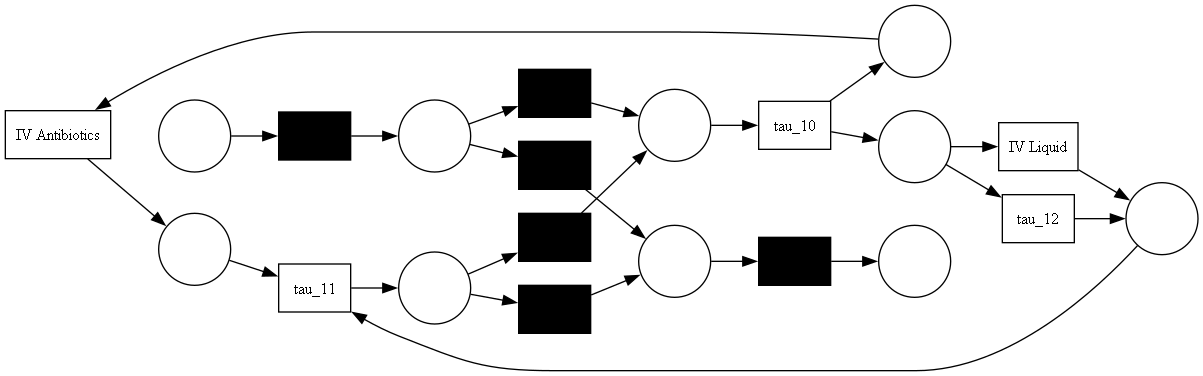

In [31]:
def add_place_transition_arc_to_incoming_places_p52(petri_net, incoming_places, outgoing_places, counts):    #BASE CODE WORKS
    petri_net10 = PetriNet()

  
    petri_net10.places.update(petri_net9.places)
    petri_net10.transitions.update(petri_net9.transitions)
    petri_net10.arcs.update(petri_net9.arcs)


    source_place1 = get_new_place(counts)
    petri_net10.places.add(source_place1)

    # source_transition1 = get_transition(counts, label="tau_transition3")
    source_transition1 = get_new_hidden_trans(counts,"tau_transition03")
    petri_net10.transitions.add(source_transition1)


    place_to_transition_arc = PetriNet.Arc(source_place1, source_transition1, weight=1)
    petri_net10.arcs.add(place_to_transition_arc)
    
    # loop_transition2 = get_transition(counts, label="skip")
    loop_transition2 = get_new_hidden_trans(counts,"skip_01")
    petri_net10.transitions.add(loop_transition2)

 
    for incoming_place in incoming_places:
        transition_to_incoming_place_arc = PetriNet.Arc(source_transition1, incoming_place, weight=1)
        petri_net10.arcs.add(transition_to_incoming_place_arc)
        
    for outgoing_place in outgoing_places:
        place_to_transition_arc2 = PetriNet.Arc(loop_transition2, outgoing_place, weight=1)
        petri_net10.arcs.add(place_to_transition_arc2)
        
    for incoming_place in incoming_places:
        place_to_transition_arc1 = PetriNet.Arc(incoming_place, loop_transition2, weight=1)
        petri_net10.arcs.add(place_to_transition_arc1)
        

    # sink_transition1 = get_transition(counts, label="tau_transition4")
    sink_transition1 = get_new_hidden_trans(counts,"tau_transition04")
    petri_net10.transitions.add(sink_transition1)
        

    for outgoing_place in outgoing_places:
        transition_to_incoming_place_arc = PetriNet.Arc(outgoing_place, sink_transition1, weight=1)
        petri_net10.arcs.add(transition_to_incoming_place_arc) 
        

    sink_place1 = get_new_place(counts)
    petri_net10.places.add(sink_place1)
    

    arc_to_sink_place1 = PetriNet.Arc(sink_transition1, sink_place1, weight=1)
    petri_net10.arcs.add(arc_to_sink_place1)

    return petri_net10

petri_net10 = add_place_transition_arc_to_incoming_places_p52(petri_net9, isolated_incoming_places_pn91, isolated_outgoing_places_pn91, counts)

pm4py.view_petri_net(petri_net10, format='png')

IV Liquid net has been successfully created.


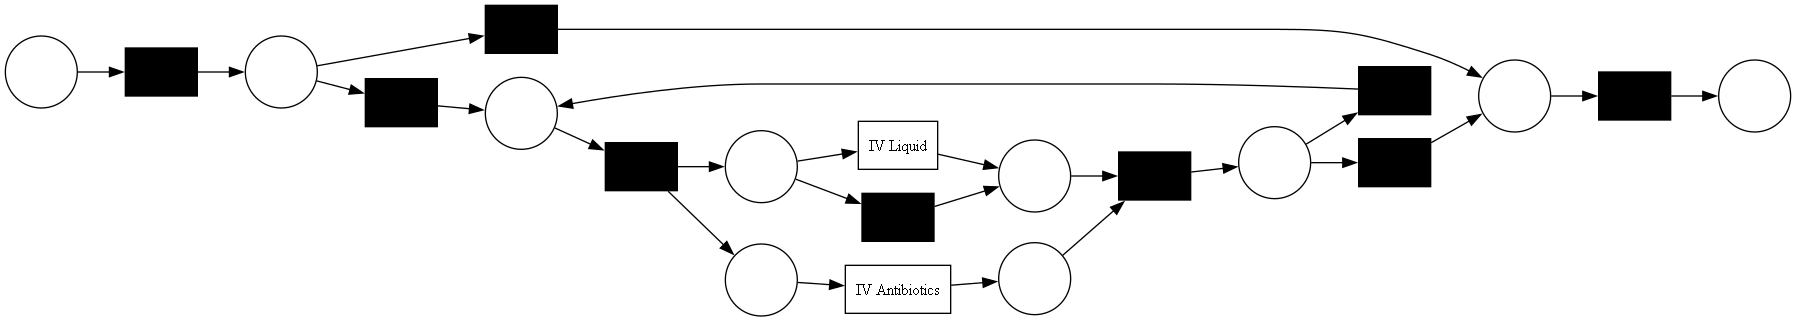

places: [ p1, p2, p3, p4, p5, p6, p_1, p_2, p_3, p_4 ]
transitions: [ (loop_01, None), (skip_01, None), (t1, 'IV Antibiotics'), (t4, 'IV Liquid'), (tau_10, None), (tau_11, None), (tau_12, None), (tau_transition01, None), (tau_transition02, None), (tau_transition03, None), (tau_transition04, None) ]
arcs: [ (loop_01, None)->p1, (skip_01, None)->p_2, (t1, 'IV Antibiotics')->p6, (t4, 'IV Liquid')->p4, (tau_10, None)->p3, (tau_10, None)->p5, (tau_11, None)->p2, (tau_12, None)->p4, (tau_transition01, None)->p1, (tau_transition02, None)->p_2, (tau_transition03, None)->p_1, (tau_transition04, None)->p_4, p1->(tau_10, None), p2->(loop_01, None), p2->(tau_transition02, None), p3->(t4, 'IV Liquid'), p3->(tau_12, None), p4->(tau_11, None), p5->(t1, 'IV Antibiotics'), p6->(tau_11, None), p_1->(skip_01, None), p_1->(tau_transition01, None), p_2->(tau_transition04, None), p_3->(tau_transition03, None) ]


In [32]:
import copy
import pm4py
from pm4py.objects.petri_net.utils import petri_utils
from pm4py.objects.petri_net.obj import PetriNet

def remove_transition(net, trans):
 
    if trans in net.transitions:
        in_arcs = list(trans.in_arcs)
        for arc in in_arcs:
            place = arc.source
            if arc in place.out_arcs:
                place.out_arcs.remove(arc)
            if arc in net.arcs:
                net.arcs.remove(arc)
        out_arcs = list(trans.out_arcs)
        for arc in out_arcs:
            place = arc.target
            if arc in place.in_arcs:
                place.in_arcs.remove(arc)
            if arc in net.arcs:
                net.arcs.remove(arc)
        net.transitions.remove(trans)
    return net

def add_hidden_transition_with_same_label(net, counts, old_label):

    new_transition = get_new_hidden_trans(counts, old_label)
    net.transitions.add(new_transition)
    return new_transition

def replace_with_hidden_transition(petri_net, transitions_to_replace, counts):
    # Copy 
    petri_net = copy.deepcopy(petri_net)
    
    for old_trans_label in transitions_to_replace:
        # Find the old transition
        old_transition = None
        for trans in petri_net.transitions:
            if trans.label == old_trans_label:
                old_transition = trans
                break
        
        if old_transition:
            # Collect arcs 
            in_arcs = list(old_transition.in_arcs)
            out_arcs = list(old_transition.out_arcs)
            
            # Remove the transition
            remove_transition(petri_net, old_transition)
            
            # Add a new hidden transition with the same label
            new_transition = add_hidden_transition_with_same_label(petri_net, counts, old_trans_label)
            
            # Reconnect the arcs
            for arc in in_arcs:
                new_arc = PetriNet.Arc(arc.source, new_transition, weight=arc.weight)
                petri_net.arcs.add(new_arc)
            
            for arc in out_arcs:
                new_arc = PetriNet.Arc(new_transition, arc.target, weight=arc.weight)
                petri_net.arcs.add(new_arc)
    
    return petri_net

# List of transitions 
transitions_to_replace = [trans.label for trans in petri_net10.transitions if trans.label and trans.label.startswith(('tau', 'Tau'))]

petri_net10 = replace_with_hidden_transition(petri_net10, transitions_to_replace, counts)

if petri_net10 is None:
    print("Error: The petri_net is None.")
else:
    print("IV Liquid net has been successfully created.")

if not hasattr(petri_net10, 'name') or petri_net10.name is None:
    petri_net10.name = "Modified_Petri_Net"


pm4py.view_petri_net(petri_net10, format='png')
print(petri_net10)

In [33]:
# from pm4py.visualization.petri_net import visualizer as pn_visualizer
# from pm4py.objects.petri_net.exporter import exporter as pnml_exporter
# from pm4py.objects.petri_net.obj import PetriNet, Marking
# # from pm4py.objects.petri.exporter.variants import export_net as pnml

# # gviz = pn_visualizer.apply(modified_net, initial_marking, final_marking)
# # pn_visualizer.view(gviz)

# pnml_exporter.apply(modified_petri_net10, ["p1"],"transfer.pnml")

Admission Pattern

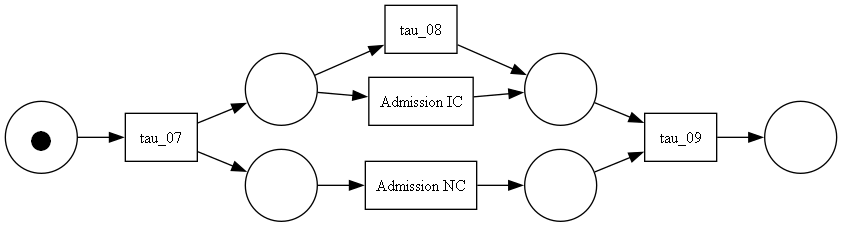

places: [ p1, p2, p3, p4, p5, p6 ]
transitions: [ (t1, 'tau_07'), (t2, 'Admission IC'), (t3, 'tau_08'), (t4, 'Admission NC'), (t5, 'tau_09') ]
arcs: [ (t1, 'tau_07')->p2, (t1, 'tau_07')->p4, (t2, 'Admission IC')->p3, (t3, 'tau_08')->p3, (t4, 'Admission NC')->p5, (t5, 'tau_09')->p6, p1->(t1, 'tau_07'), p2->(t2, 'Admission IC'), p2->(t3, 'tau_08'), p3->(t5, 'tau_09'), p4->(t4, 'Admission NC'), p5->(t5, 'tau_09') ]


In [34]:
pm4py.view_petri_net(pn1,im1,format='png')
print(pn1)

In [35]:
# def find_isolated_places_with_arcs_p11(petri_net):
 
#     place_connections = {}

    
#     incoming_arcs = {}
#     outgoing_arcs = {}

#     # Iterate over arcs 
#     for arc in pn1.arcs:
#         source_place = arc.source
#         target_place = arc.target

#         # Update incoming arc count for the target place
#         place_connections[target_place] = place_connections.get(target_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[target_place]['incoming'] += 1

#         # Update outgoing arc count for the source place
#         place_connections[source_place] = place_connections.get(source_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[source_place]['outgoing'] += 1

#         # Store incoming arc for each place
#         incoming_arcs[target_place] = incoming_arcs.get(target_place, [])
#         incoming_arcs[target_place].append(arc)

#         # Store outgoing arc for each place
#         outgoing_arcs[source_place] = outgoing_arcs.get(source_place, [])
#         outgoing_arcs[source_place].append(arc)

#     # Find places without incoming or outgoing arcs
#     isolated_places = {
#         'incoming': {place: incoming_arcs.get(place, []) for place, connections in place_connections.items() if connections['incoming'] == 0},
#         'outgoing': {place: outgoing_arcs.get(place, []) for place, connections in place_connections.items() if connections['outgoing'] == 0},
#     }

#     return isolated_places


isolated_places = find_isolated_places_with_arcs(pn1)
# print(isolated_places)


isolated_incoming_places_pn11 = isolated_places['incoming']
isolated_outgoing_places_pn11 = isolated_places['outgoing']


print("Isolated Incoming Places:", isolated_incoming_places_pn11)
print("Isolated Outgoing Places:", isolated_outgoing_places_pn11)


Isolated Incoming Places: {p1: []}
Isolated Outgoing Places: {p6: []}


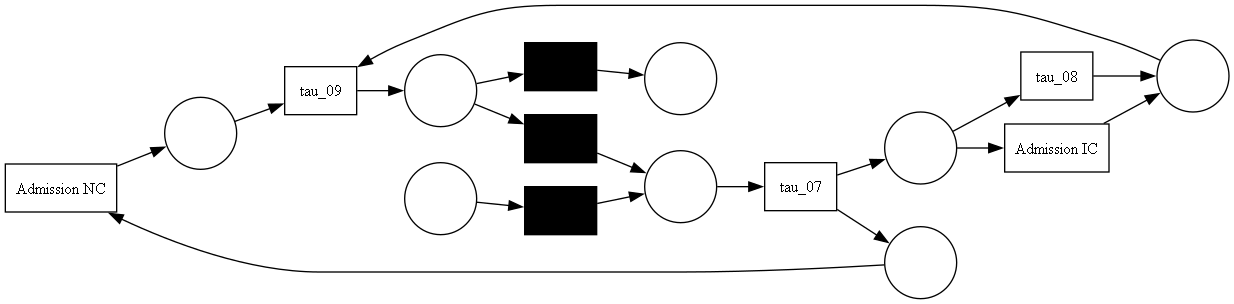

In [36]:
def add_place_transition_arc_to_incoming_places_p11(petri_net, incoming_places, outgoing_places, counts):    #BASE CODE WORKS
    petri_net1 = PetriNet()

    # Copy existing places, transitions, and arcs
    petri_net1.places.update(pn1.places)
    petri_net1.transitions.update(pn1.transitions)
    petri_net1.arcs.update(pn1.arcs)

    # Add new place
    source_place1 = get_new_place(counts)
    petri_net1.places.add(source_place1)

    # Add new transition
    # source_transition1 = get_transition(counts, label="tau_transition1")
    source_transition1 = get_new_hidden_trans(counts,"tau_transition05")
    petri_net1.transitions.add(source_transition1)

    # Add arc from place to transition
    place_to_transition_arc = PetriNet.Arc(source_place1, source_transition1, weight=1)
    petri_net1.arcs.add(place_to_transition_arc)
    
    # loop_transition1 = get_transition(counts, label="loop")
    loop_transition1 = get_new_hidden_trans(counts,"loop_02")
    petri_net1.transitions.add(loop_transition1)

    # Add arcs from transition to incoming places
    for incoming_place in incoming_places:
        transition_to_incoming_place_arc = PetriNet.Arc(source_transition1, incoming_place, weight=1)
        petri_net1.arcs.add(transition_to_incoming_place_arc)
        
    for outgoing_place in outgoing_places:
        place_to_transition_arc2 = PetriNet.Arc(outgoing_place, loop_transition1, weight=1)
        petri_net1.arcs.add(place_to_transition_arc2)
        
    for incoming_place in incoming_places:
        place_to_transition_arc1 = PetriNet.Arc(loop_transition1, incoming_place, weight=1)
        petri_net1.arcs.add(place_to_transition_arc1)
        
    # Add a new transition
    # sink_transition1 = get_transition(counts, label="tau_transition2")
    sink_transition1 = get_new_hidden_trans(counts,"tau_transition06")
    petri_net1.transitions.add(sink_transition1)
        
     # Add arcs from outgoing isolated places to the transition
    for outgoing_place in outgoing_places:
        transition_to_incoming_place_arc = PetriNet.Arc(outgoing_place, sink_transition1, weight=1)
        petri_net1.arcs.add(transition_to_incoming_place_arc) 
        
     # Add a sink place
    sink_place1 = get_new_place(counts)
    petri_net1.places.add(sink_place1)
    
    # Add an arc from the new transition to new place
    arc_to_sink_place1 = PetriNet.Arc(sink_transition1, sink_place1, weight=1)
    petri_net1.arcs.add(arc_to_sink_place1)

    return petri_net1

counts = Counts()


# Add a place, transition, and arcs to incoming places
petri_net1 = add_place_transition_arc_to_incoming_places_p11(pn1, isolated_incoming_places_pn11, isolated_outgoing_places_pn11, counts)

pm4py.view_petri_net(petri_net1, format='png')

In [37]:
print(petri_net1)

places: [ p1, p2, p3, p4, p5, p6, p_1, p_2 ]
transitions: [ (loop_02, None), (t1, 'tau_07'), (t2, 'Admission IC'), (t3, 'tau_08'), (t4, 'Admission NC'), (t5, 'tau_09'), (tau_transition05, None), (tau_transition06, None) ]
arcs: [ (loop_02, None)->p1, (t1, 'tau_07')->p2, (t1, 'tau_07')->p4, (t2, 'Admission IC')->p3, (t3, 'tau_08')->p3, (t4, 'Admission NC')->p5, (t5, 'tau_09')->p6, (tau_transition05, None)->p1, (tau_transition06, None)->p_2, p1->(t1, 'tau_07'), p2->(t2, 'Admission IC'), p2->(t3, 'tau_08'), p3->(t5, 'tau_09'), p4->(t4, 'Admission NC'), p5->(t5, 'tau_09'), p6->(loop_02, None), p6->(tau_transition06, None), p_1->(tau_transition05, None) ]


In [38]:
# def find_isolated_places_with_arcs_p12(petri_net):

#     place_connections = {}

#     incoming_arcs = {}
#     outgoing_arcs = {}


#     for arc in petri_net1.arcs:
#         source_place = arc.source
#         target_place = arc.target

#         place_connections[target_place] = place_connections.get(target_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[target_place]['incoming'] += 1

     
#         place_connections[source_place] = place_connections.get(source_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[source_place]['outgoing'] += 1

    
#         incoming_arcs[target_place] = incoming_arcs.get(target_place, [])
#         incoming_arcs[target_place].append(arc)

  
#         outgoing_arcs[source_place] = outgoing_arcs.get(source_place, [])
#         outgoing_arcs[source_place].append(arc)

#     isolated_places = {
#         'incoming': {place: incoming_arcs.get(place, []) for place, connections in place_connections.items() if connections['incoming'] == 0},
#         'outgoing': {place: outgoing_arcs.get(place, []) for place, connections in place_connections.items() if connections['outgoing'] == 0},
#     }

#     return isolated_places


isolated_places = find_isolated_places_with_arcs(petri_net1)
# print(isolated_places)


isolated_incoming_places_pn12 = isolated_places['incoming']
isolated_outgoing_places_pn12 = isolated_places['outgoing']


print("Isolated Incoming Places:", isolated_incoming_places_pn12)
print("Isolated Outgoing Places:", isolated_outgoing_places_pn12)

Isolated Incoming Places: {p_1: []}
Isolated Outgoing Places: {p_2: []}


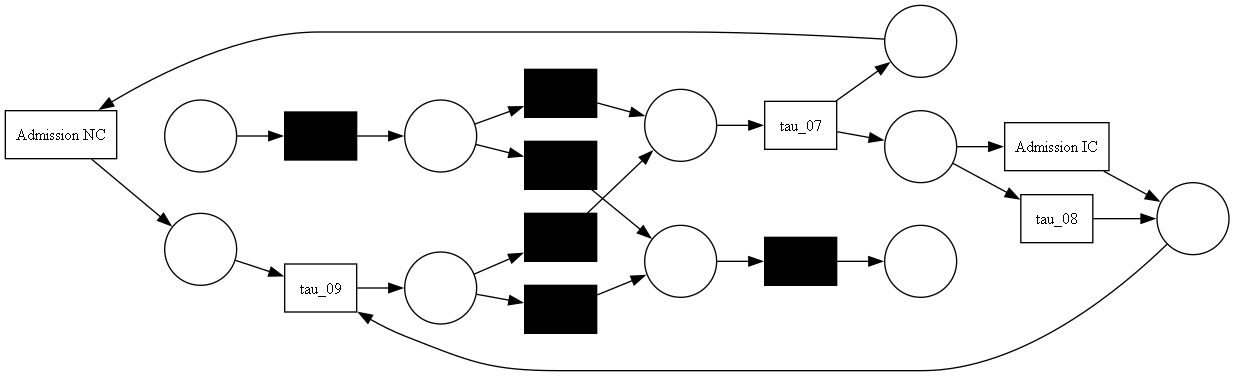

In [39]:
def add_place_transition_arc_to_incoming_places_p12(petri_net, incoming_places, outgoing_places, counts):    #BASE CODE WORKS
    petri_net2 = PetriNet()

  
    petri_net2.places.update(petri_net1.places)
    petri_net2.transitions.update(petri_net1.transitions)
    petri_net2.arcs.update(petri_net1.arcs)


    source_place1 = get_new_place(counts)
    petri_net2.places.add(source_place1)

    # source_transition1 = get_transition(counts, label="tau_transition3")
    source_transition1 = get_new_hidden_trans(counts,"tau_transition07")
    petri_net2.transitions.add(source_transition1)


    place_to_transition_arc = PetriNet.Arc(source_place1, source_transition1, weight=1)
    petri_net2.arcs.add(place_to_transition_arc)
    
    # loop_transition2 = get_transition(counts, label="skip")
    loop_transition2 = get_new_hidden_trans(counts,"skip_02")
    petri_net2.transitions.add(loop_transition2)

 
    for incoming_place in incoming_places:
        transition_to_incoming_place_arc = PetriNet.Arc(source_transition1, incoming_place, weight=1)
        petri_net2.arcs.add(transition_to_incoming_place_arc)
        
    for outgoing_place in outgoing_places:
        place_to_transition_arc2 = PetriNet.Arc(loop_transition2, outgoing_place, weight=1)
        petri_net2.arcs.add(place_to_transition_arc2)
        
    for incoming_place in incoming_places:
        place_to_transition_arc1 = PetriNet.Arc(incoming_place, loop_transition2, weight=1)
        petri_net2.arcs.add(place_to_transition_arc1)
        

    # sink_transition1 = get_transition(counts, label="tau_transition4")
    sink_transition1 = get_new_hidden_trans(counts,"tau_transition08")
    petri_net2.transitions.add(sink_transition1)
        

    for outgoing_place in outgoing_places:
        transition_to_incoming_place_arc = PetriNet.Arc(outgoing_place, sink_transition1, weight=1)
        petri_net2.arcs.add(transition_to_incoming_place_arc) 
        

    sink_place1 = get_new_place(counts)
    petri_net2.places.add(sink_place1)
    

    arc_to_sink_place1 = PetriNet.Arc(sink_transition1, sink_place1, weight=1)
    petri_net2.arcs.add(arc_to_sink_place1)

    return petri_net2

petri_net2 = add_place_transition_arc_to_incoming_places_p12(petri_net1, isolated_incoming_places_pn12, isolated_outgoing_places_pn12, counts)

pm4py.view_petri_net(petri_net2, format='png')

Admission net has been successfully created.


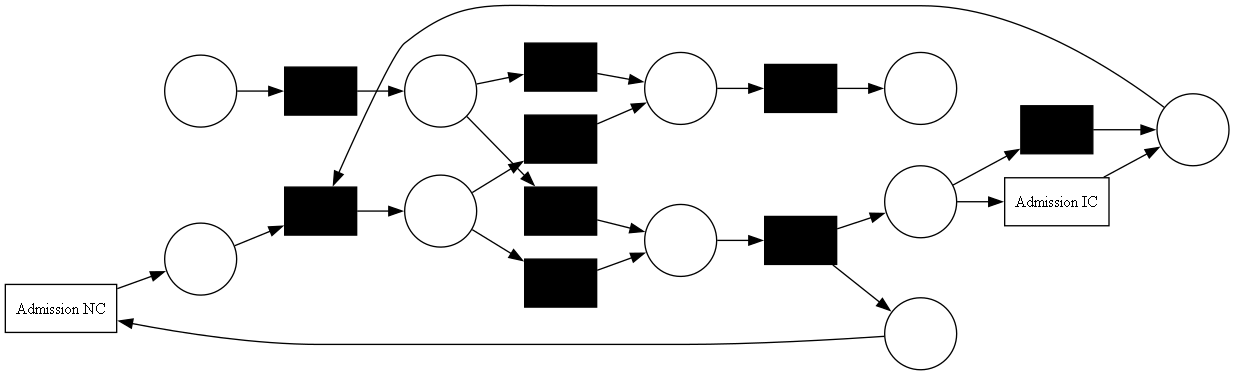

places: [ p1, p2, p3, p4, p5, p6, p_1, p_2, p_3, p_4 ]
transitions: [ (loop_02, None), (skip_02, None), (t2, 'Admission IC'), (t4, 'Admission NC'), (tau_07, None), (tau_08, None), (tau_09, None), (tau_transition05, None), (tau_transition06, None), (tau_transition07, None), (tau_transition08, None) ]
arcs: [ (loop_02, None)->p1, (skip_02, None)->p_2, (t2, 'Admission IC')->p3, (t4, 'Admission NC')->p5, (tau_07, None)->p2, (tau_07, None)->p4, (tau_08, None)->p3, (tau_09, None)->p6, (tau_transition05, None)->p1, (tau_transition06, None)->p_2, (tau_transition07, None)->p_1, (tau_transition08, None)->p_4, p1->(tau_07, None), p2->(t2, 'Admission IC'), p2->(tau_08, None), p3->(tau_09, None), p4->(t4, 'Admission NC'), p5->(tau_09, None), p6->(loop_02, None), p6->(tau_transition06, None), p_1->(skip_02, None), p_1->(tau_transition05, None), p_2->(tau_transition08, None), p_3->(tau_transition07, None) ]


In [40]:
# import copy
# import pm4py
# from pm4py.objects.petri_net.utils import petri_utils
# from pm4py.objects.petri_net.obj import PetriNet

# def remove_transition(net, trans):
 
#     if trans in net.transitions:
#         in_arcs = list(trans.in_arcs)
#         for arc in in_arcs:
#             place = arc.source
#             if arc in place.out_arcs:
#                 place.out_arcs.remove(arc)
#             if arc in net.arcs:
#                 net.arcs.remove(arc)
#         out_arcs = list(trans.out_arcs)
#         for arc in out_arcs:
#             place = arc.target
#             if arc in place.in_arcs:
#                 place.in_arcs.remove(arc)
#             if arc in net.arcs:
#                 net.arcs.remove(arc)
#         net.transitions.remove(trans)
#     return net

# def add_hidden_transition_with_same_label(net, counts, old_label):

#     new_transition = get_new_hidden_trans(counts, old_label)
#     net.transitions.add(new_transition)
#     return new_transition

# def replace_with_hidden_transition(petri_net, transitions_to_replace, counts):
#     # Copy 
#     petri_net = copy.deepcopy(petri_net)
    
#     for old_trans_label in transitions_to_replace:
#         # Find the old transition
#         old_transition = None
#         for trans in petri_net.transitions:
#             if trans.label == old_trans_label:
#                 old_transition = trans
#                 break
        
#         if old_transition:
#             # Collect arcs 
#             in_arcs = list(old_transition.in_arcs)
#             out_arcs = list(old_transition.out_arcs)
            
#             # Remove the transition
#             remove_transition(petri_net, old_transition)
            
#             # Add a new hidden transition with the same label
#             new_transition = add_hidden_transition_with_same_label(petri_net, counts, old_trans_label)
            
#             # Reconnect the arcs
#             for arc in in_arcs:
#                 new_arc = PetriNet.Arc(arc.source, new_transition, weight=arc.weight)
#                 petri_net.arcs.add(new_arc)
            
#             for arc in out_arcs:
#                 new_arc = PetriNet.Arc(new_transition, arc.target, weight=arc.weight)
#                 petri_net.arcs.add(new_arc)
    
#     return petri_net

transitions_to_replace = [trans.label for trans in petri_net2.transitions if trans.label and trans.label.startswith(('tau', 'Tau'))]

petri_net2 = replace_with_hidden_transition(petri_net2, transitions_to_replace, counts)

if petri_net2 is None:
    print("Error: The Petri_Net2 is None.")
else:
    print("Admission net has been successfully created.")

if not hasattr(petri_net2, 'name') or petri_net2.name is None:
    petri_net2.name = "Petri_Net2"


pm4py.view_petri_net(petri_net2, format='png')
print(petri_net2)

Discharge Pattern

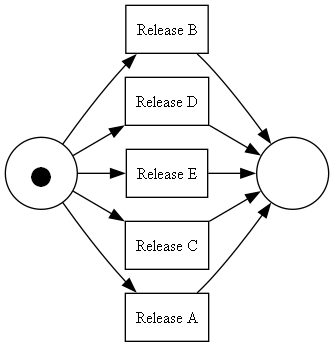

places: [ p1, p5 ]
transitions: [ (t10, 'Release D'), (t11, 'Release E'), (t3, 'Release A'), (t6, 'Release B'), (t9, 'Release C') ]
arcs: [ (t10, 'Release D')->p5, (t11, 'Release E')->p5, (t3, 'Release A')->p5, (t6, 'Release B')->p5, (t9, 'Release C')->p5, p1->(t10, 'Release D'), p1->(t11, 'Release E'), p1->(t3, 'Release A'), p1->(t6, 'Release B'), p1->(t9, 'Release C') ]


In [41]:
pm4py.view_petri_net(pn2, im2, format='png')
print(pn2)

In [42]:
# def find_isolated_places_with_arcs_p21(petri_net):

#     place_connections = {}


#     incoming_arcs = {}
#     outgoing_arcs = {}


#     for arc in pn2.arcs:
#         source_place = arc.source
#         target_place = arc.target


#         place_connections[target_place] = place_connections.get(target_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[target_place]['incoming'] += 1


#         place_connections[source_place] = place_connections.get(source_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[source_place]['outgoing'] += 1

#         incoming_arcs[target_place] = incoming_arcs.get(target_place, [])
#         incoming_arcs[target_place].append(arc)

#         outgoing_arcs[source_place] = outgoing_arcs.get(source_place, [])
#         outgoing_arcs[source_place].append(arc)


#     isolated_places = {
#         'incoming': {place: incoming_arcs.get(place, []) for place, connections in place_connections.items() if connections['incoming'] == 0},
#         'outgoing': {place: outgoing_arcs.get(place, []) for place, connections in place_connections.items() if connections['outgoing'] == 0},
#     }

#     return isolated_places


isolated_places = find_isolated_places_with_arcs(pn2)


isolated_incoming_places_pn21 = isolated_places['incoming']
isolated_outgoing_places_pn21 = isolated_places['outgoing']


print("Isolated Incoming Places:", isolated_incoming_places_pn21)
print("Isolated Outgoing Places:", isolated_outgoing_places_pn21)

Isolated Incoming Places: {p1: []}
Isolated Outgoing Places: {p5: []}


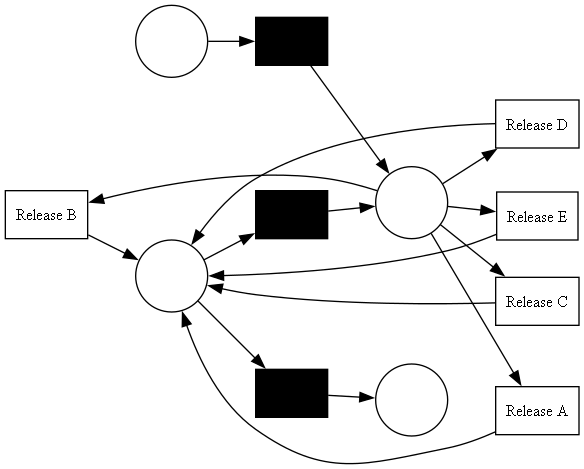

In [43]:
def add_place_transition_arc_to_incoming_places_p21(petri_net, incoming_places, outgoing_places, counts):    #ADD SKIP TRANSITION 
    petri_net3 = PetriNet()


    petri_net3.places.update(pn2.places)
    petri_net3.transitions.update(pn2.transitions)
    petri_net3.arcs.update(pn2.arcs)

    source_place1 = get_new_place(counts)
    petri_net3.places.add(source_place1)

    # source_transition1 = get_transition(counts, label="tau_transition5")
    source_transition1 = get_new_hidden_trans(counts,"tau_transition09")
    petri_net3.transitions.add(source_transition1)


    place_to_transition_arc = PetriNet.Arc(source_place1, source_transition1, weight=1)
    petri_net3.arcs.add(place_to_transition_arc)
    
    # loop_transition1 = get_transition(counts, label="loop")
    loop_transition1 = get_new_hidden_trans(counts,"loop_03")
    petri_net3.transitions.add(loop_transition1)


    for incoming_place in incoming_places:
        transition_to_incoming_place_arc = PetriNet.Arc(source_transition1, incoming_place, weight=1)
        petri_net3.arcs.add(transition_to_incoming_place_arc)
        
    for outgoing_place in outgoing_places:
        place_to_transition_arc2 = PetriNet.Arc(outgoing_place, loop_transition1, weight=1)
        petri_net3.arcs.add(place_to_transition_arc2)
        
    for incoming_place in incoming_places:
        place_to_transition_arc1 = PetriNet.Arc(loop_transition1, incoming_place, weight=1)
        petri_net3.arcs.add(place_to_transition_arc1)
        

    # sink_transition1 = get_transition(counts, label="tau_transition6")
    sink_transition1 = get_new_hidden_trans(counts,"tau_transition10")
    petri_net3.transitions.add(sink_transition1)
        

    for outgoing_place in outgoing_places:
        transition_to_incoming_place_arc = PetriNet.Arc(outgoing_place, sink_transition1, weight=1)
        petri_net3.arcs.add(transition_to_incoming_place_arc) 
        

    sink_place1 = get_new_place(counts)
    petri_net3.places.add(sink_place1)
    

    arc_to_sink_place1 = PetriNet.Arc(sink_transition1, sink_place1, weight=1)
    petri_net3.arcs.add(arc_to_sink_place1)

    return petri_net3


petri_net3 = add_place_transition_arc_to_incoming_places_p21(pn2, isolated_incoming_places_pn21, isolated_outgoing_places_pn21, counts)

pm4py.view_petri_net(petri_net3, format='png')

In [44]:
print(petri_net3)

places: [ p1, p5, p_5, p_6 ]
transitions: [ (loop_03, None), (t10, 'Release D'), (t11, 'Release E'), (t3, 'Release A'), (t6, 'Release B'), (t9, 'Release C'), (tau_transition09, None), (tau_transition10, None) ]
arcs: [ (loop_03, None)->p1, (t10, 'Release D')->p5, (t11, 'Release E')->p5, (t3, 'Release A')->p5, (t6, 'Release B')->p5, (t9, 'Release C')->p5, (tau_transition09, None)->p1, (tau_transition10, None)->p_6, p1->(t10, 'Release D'), p1->(t11, 'Release E'), p1->(t3, 'Release A'), p1->(t6, 'Release B'), p1->(t9, 'Release C'), p5->(loop_03, None), p5->(tau_transition10, None), p_5->(tau_transition09, None) ]


In [45]:
# def find_isolated_places_with_arcs_p22(petri_net):

#     place_connections = {}


#     incoming_arcs = {}
#     outgoing_arcs = {}


#     for arc in petri_net3.arcs:
#         source_place = arc.source
#         target_place = arc.target


#         place_connections[target_place] = place_connections.get(target_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[target_place]['incoming'] += 1


#         place_connections[source_place] = place_connections.get(source_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[source_place]['outgoing'] += 1


#         incoming_arcs[target_place] = incoming_arcs.get(target_place, [])
#         incoming_arcs[target_place].append(arc)


#         outgoing_arcs[source_place] = outgoing_arcs.get(source_place, [])
#         outgoing_arcs[source_place].append(arc)

#     isolated_places = {
#         'incoming': {place: incoming_arcs.get(place, []) for place, connections in place_connections.items() if connections['incoming'] == 0},
#         'outgoing': {place: outgoing_arcs.get(place, []) for place, connections in place_connections.items() if connections['outgoing'] == 0},
#     }

#     return isolated_places


isolated_places = find_isolated_places_with_arcs(petri_net3)
# print(isolated_places)


isolated_incoming_places_pn22 = isolated_places['incoming']
isolated_outgoing_places_pn22 = isolated_places['outgoing']


print("Isolated Incoming Places:", isolated_incoming_places_pn22)
print("Isolated Outgoing Places:", isolated_outgoing_places_pn22)

Isolated Incoming Places: {p_5: []}
Isolated Outgoing Places: {p_6: []}


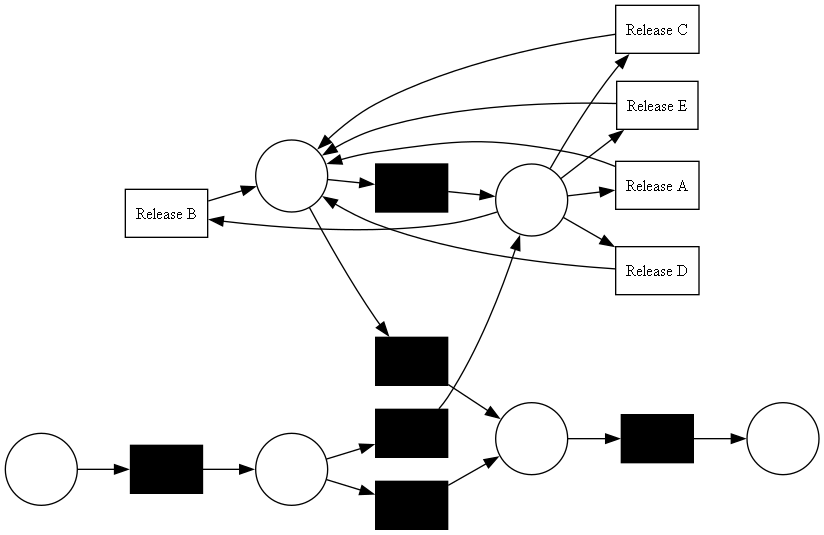

In [46]:
def add_place_transition_arc_to_incoming_places_p22(petri_net, incoming_places, outgoing_places, counts):    #BASE CODE WORKS
    petri_net4 = PetriNet()


    petri_net4.places.update(petri_net3.places)
    petri_net4.transitions.update(petri_net3.transitions)
    petri_net4.arcs.update(petri_net3.arcs)


    source_place1 = get_new_place(counts)
    petri_net4.places.add(source_place1)


    # source_transition1 = get_transition(counts, label="tau_transition7")
    source_transition1 = get_new_hidden_trans(counts,"tau_transition11")
    petri_net4.transitions.add(source_transition1)


    place_to_transition_arc = PetriNet.Arc(source_place1, source_transition1, weight=1)
    petri_net4.arcs.add(place_to_transition_arc)
    
    # loop_transition2 = get_transition(counts, label="skip")
    loop_transition2 = get_new_hidden_trans(counts,"skip_03")
    petri_net4.transitions.add(loop_transition2)


    for incoming_place in incoming_places:
        transition_to_incoming_place_arc = PetriNet.Arc(source_transition1, incoming_place, weight=1)
        petri_net4.arcs.add(transition_to_incoming_place_arc)
        
    for outgoing_place in outgoing_places:
        place_to_transition_arc2 = PetriNet.Arc(loop_transition2, outgoing_place, weight=1)
        petri_net4.arcs.add(place_to_transition_arc2)
        
    for incoming_place in incoming_places:
        place_to_transition_arc1 = PetriNet.Arc(incoming_place, loop_transition2, weight=1)
        petri_net4.arcs.add(place_to_transition_arc1)
        

    # sink_transition1 = get_transition(counts, label="tau_transition8")
    sink_transition1 = get_new_hidden_trans(counts,"tau_transition12")
    petri_net4.transitions.add(sink_transition1)
        

    for outgoing_place in outgoing_places:
        transition_to_incoming_place_arc = PetriNet.Arc(outgoing_place, sink_transition1, weight=1)
        petri_net4.arcs.add(transition_to_incoming_place_arc) 
        

    sink_place1 = get_new_place(counts)
    petri_net4.places.add(sink_place1)
    

    arc_to_sink_place1 = PetriNet.Arc(sink_transition1, sink_place1, weight=1)
    petri_net4.arcs.add(arc_to_sink_place1)

    return petri_net4

petri_net4 = add_place_transition_arc_to_incoming_places_p22(petri_net3, isolated_incoming_places_pn22, isolated_outgoing_places_pn22, counts)

pm4py.view_petri_net(petri_net4, format='png')

In [47]:
print(petri_net4)

places: [ p1, p5, p_5, p_6, p_7, p_8 ]
transitions: [ (loop_03, None), (skip_03, None), (t10, 'Release D'), (t11, 'Release E'), (t3, 'Release A'), (t6, 'Release B'), (t9, 'Release C'), (tau_transition09, None), (tau_transition10, None), (tau_transition11, None), (tau_transition12, None) ]
arcs: [ (loop_03, None)->p1, (skip_03, None)->p_6, (t10, 'Release D')->p5, (t11, 'Release E')->p5, (t3, 'Release A')->p5, (t6, 'Release B')->p5, (t9, 'Release C')->p5, (tau_transition09, None)->p1, (tau_transition10, None)->p_6, (tau_transition11, None)->p_5, (tau_transition12, None)->p_8, p1->(t10, 'Release D'), p1->(t11, 'Release E'), p1->(t3, 'Release A'), p1->(t6, 'Release B'), p1->(t9, 'Release C'), p5->(loop_03, None), p5->(tau_transition10, None), p_5->(skip_03, None), p_5->(tau_transition09, None), p_6->(tau_transition12, None), p_7->(tau_transition11, None) ]


ER Pattern

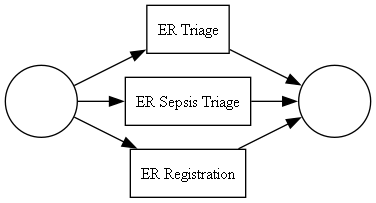

places: [ p1, p2 ]
transitions: [ (t1, 'ER Triage'), (t2, 'ER Sepsis Triage'), (t3, 'ER Registration') ]
arcs: [ (t1, 'ER Triage')->p2, (t2, 'ER Sepsis Triage')->p2, (t3, 'ER Registration')->p2, p1->(t1, 'ER Triage'), p1->(t2, 'ER Sepsis Triage'), p1->(t3, 'ER Registration') ]


In [48]:
pm4py.view_petri_net(pn3, format='png')
print(pn3)

In [49]:
# def find_isolated_places_with_arcs_p31(petri_net):

#     place_connections = {}


#     incoming_arcs = {}
#     outgoing_arcs = {}


#     for arc in pn3.arcs:
#         source_place = arc.source
#         target_place = arc.target


#         place_connections[target_place] = place_connections.get(target_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[target_place]['incoming'] += 1


#         place_connections[source_place] = place_connections.get(source_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[source_place]['outgoing'] += 1

#         incoming_arcs[target_place] = incoming_arcs.get(target_place, [])
#         incoming_arcs[target_place].append(arc)


#         outgoing_arcs[source_place] = outgoing_arcs.get(source_place, [])
#         outgoing_arcs[source_place].append(arc)


#     isolated_places = {
#         'incoming': {place: incoming_arcs.get(place, []) for place, connections in place_connections.items() if connections['incoming'] == 0},
#         'outgoing': {place: outgoing_arcs.get(place, []) for place, connections in place_connections.items() if connections['outgoing'] == 0},
#     }

#     return isolated_places


isolated_places = find_isolated_places_with_arcs(pn3)


isolated_incoming_places_pn31 = isolated_places['incoming']
isolated_outgoing_places_pn31 = isolated_places['outgoing']


print("Isolated Incoming Places:", isolated_incoming_places_pn31)
print("Isolated Outgoing Places:", isolated_outgoing_places_pn31)


Isolated Incoming Places: {p1: []}
Isolated Outgoing Places: {p2: []}


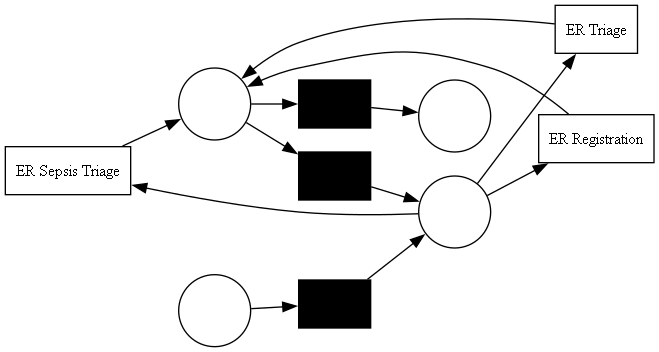

In [50]:
def add_place_transition_arc_to_incoming_places_p31(petri_net, incoming_places, outgoing_places, counts):    #ADD SKIP TRANSITION 
    petri_net5 = PetriNet()


    petri_net5.places.update(pn3.places)
    petri_net5.transitions.update(pn3.transitions)
    petri_net5.arcs.update(pn3.arcs)

    source_place1 = get_new_place(counts)
    petri_net5.places.add(source_place1)

    # source_transition1 = get_transition(counts, label="tau_transition22")
    source_transition1 = get_new_hidden_trans(counts,"tau_transition13")
    petri_net5.transitions.add(source_transition1)


    place_to_transition_arc = PetriNet.Arc(source_place1, source_transition1, weight=1)
    petri_net5.arcs.add(place_to_transition_arc)
    
    # loop_transition1 = get_transition(counts, label="loop")
    loop_transition1 = get_new_hidden_trans(counts,"loop_04")
    petri_net5.transitions.add(loop_transition1)

  
    for incoming_place in incoming_places:
        transition_to_incoming_place_arc = PetriNet.Arc(source_transition1, incoming_place, weight=1)
        petri_net5.arcs.add(transition_to_incoming_place_arc)
        
    for outgoing_place in outgoing_places:
        place_to_transition_arc2 = PetriNet.Arc(outgoing_place, loop_transition1, weight=1)
        petri_net5.arcs.add(place_to_transition_arc2)
        
    for incoming_place in incoming_places:
        place_to_transition_arc1 = PetriNet.Arc(loop_transition1, incoming_place, weight=1)
        petri_net5.arcs.add(place_to_transition_arc1)
        

    # sink_transition1 = get_transition(counts, label="tau_transition23")
    sink_transition1 = get_new_hidden_trans(counts,"tau_transition14")
    petri_net5.transitions.add(sink_transition1)
        

    for outgoing_place in outgoing_places:
        transition_to_incoming_place_arc = PetriNet.Arc(outgoing_place, sink_transition1, weight=1)
        petri_net5.arcs.add(transition_to_incoming_place_arc) 
        

    sink_place1 = get_new_place(counts)
    petri_net5.places.add(sink_place1)
    

    arc_to_sink_place1 = PetriNet.Arc(sink_transition1, sink_place1, weight=1)
    petri_net5.arcs.add(arc_to_sink_place1)

    return petri_net5


petri_net5 = add_place_transition_arc_to_incoming_places_p31(pn3, isolated_incoming_places_pn31, isolated_outgoing_places_pn31, counts)

pm4py.view_petri_net(petri_net5, format='png')


In [51]:
# def find_isolated_places_with_arcs_p32(petri_net):
 
#     place_connections = {}

  
#     incoming_arcs = {}
#     outgoing_arcs = {}


#     for arc in petri_net5.arcs:
#         source_place = arc.source
#         target_place = arc.target

   
#         place_connections[target_place] = place_connections.get(target_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[target_place]['incoming'] += 1

   
#         place_connections[source_place] = place_connections.get(source_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[source_place]['outgoing'] += 1


#         incoming_arcs[target_place] = incoming_arcs.get(target_place, [])
#         incoming_arcs[target_place].append(arc)

 
#         outgoing_arcs[source_place] = outgoing_arcs.get(source_place, [])
#         outgoing_arcs[source_place].append(arc)


#     isolated_places = {
#         'incoming': {place: incoming_arcs.get(place, []) for place, connections in place_connections.items() if connections['incoming'] == 0},
#         'outgoing': {place: outgoing_arcs.get(place, []) for place, connections in place_connections.items() if connections['outgoing'] == 0},
#     }

#     return isolated_places


isolated_places = find_isolated_places_with_arcs(petri_net5)
# print(isolated_places)


isolated_incoming_places_pn32 = isolated_places['incoming']
isolated_outgoing_places_pn32 = isolated_places['outgoing']


print("Isolated Incoming Places:", isolated_incoming_places_pn32)
print("Isolated Outgoing Places:", isolated_outgoing_places_pn32)


Isolated Incoming Places: {p_9: []}
Isolated Outgoing Places: {p_10: []}


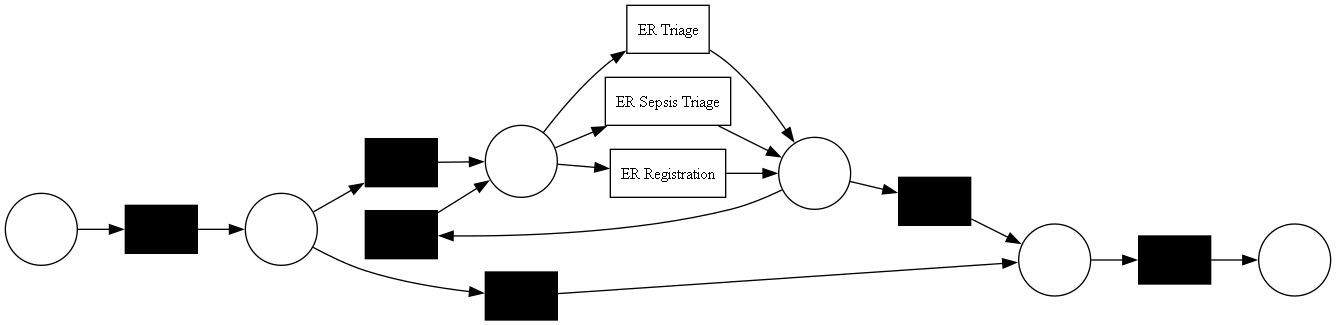

In [52]:
def add_place_transition_arc_to_incoming_places_p32(petri_net, incoming_places, outgoing_places, counts):    #BASE CODE WORKS
    petri_net6 = PetriNet()


    petri_net6.places.update(petri_net5.places)
    petri_net6.transitions.update(petri_net5.transitions)
    petri_net6.arcs.update(petri_net5.arcs)


    source_place1 = get_new_place(counts)
    petri_net6.places.add(source_place1)


    # source_transition1 = get_transition(counts, label="tau_transition24")
    source_transition1 = get_new_hidden_trans(counts,"tau_transition15")
    petri_net6.transitions.add(source_transition1)


    place_to_transition_arc = PetriNet.Arc(source_place1, source_transition1, weight=1)
    petri_net6.arcs.add(place_to_transition_arc)
    
    # loop_transition2 = get_transition(counts, label="skip")
    loop_transition2 = get_new_hidden_trans(counts,"skip_04")
    petri_net6.transitions.add(loop_transition2)


    for incoming_place in incoming_places:
        transition_to_incoming_place_arc = PetriNet.Arc(source_transition1, incoming_place, weight=1)
        petri_net6.arcs.add(transition_to_incoming_place_arc)
        
    for outgoing_place in outgoing_places:
        place_to_transition_arc2 = PetriNet.Arc(loop_transition2, outgoing_place, weight=1)
        petri_net6.arcs.add(place_to_transition_arc2)
        
    for incoming_place in incoming_places:
        place_to_transition_arc1 = PetriNet.Arc(incoming_place, loop_transition2, weight=1)
        petri_net6.arcs.add(place_to_transition_arc1)
        

    # sink_transition1 = get_transition(counts, label="tau_transition25")
    sink_transition1 = get_new_hidden_trans(counts,"tau_transition16")
    petri_net6.transitions.add(sink_transition1)
        

    for outgoing_place in outgoing_places:
        transition_to_incoming_place_arc = PetriNet.Arc(outgoing_place, sink_transition1, weight=1)
        petri_net6.arcs.add(transition_to_incoming_place_arc) 
        

    sink_place1 = get_new_place(counts)
    petri_net6.places.add(sink_place1)
    

    arc_to_sink_place1 = PetriNet.Arc(sink_transition1, sink_place1, weight=1)
    petri_net6.arcs.add(arc_to_sink_place1)

    return petri_net6

petri_net6 = add_place_transition_arc_to_incoming_places_p32(petri_net5, isolated_incoming_places_pn32, isolated_outgoing_places_pn32, counts)

pm4py.view_petri_net(petri_net6, format='png')

In [53]:
print(petri_net6)

places: [ p1, p2, p_10, p_11, p_12, p_9 ]
transitions: [ (loop_04, None), (skip_04, None), (t1, 'ER Triage'), (t2, 'ER Sepsis Triage'), (t3, 'ER Registration'), (tau_transition13, None), (tau_transition14, None), (tau_transition15, None), (tau_transition16, None) ]
arcs: [ (loop_04, None)->p1, (skip_04, None)->p_10, (t1, 'ER Triage')->p2, (t2, 'ER Sepsis Triage')->p2, (t3, 'ER Registration')->p2, (tau_transition13, None)->p1, (tau_transition14, None)->p_10, (tau_transition15, None)->p_9, (tau_transition16, None)->p_12, p1->(t1, 'ER Triage'), p1->(t2, 'ER Sepsis Triage'), p1->(t3, 'ER Registration'), p2->(loop_04, None), p2->(tau_transition14, None), p_10->(tau_transition16, None), p_11->(tau_transition15, None), p_9->(skip_04, None), p_9->(tau_transition13, None) ]


Lab Pattern

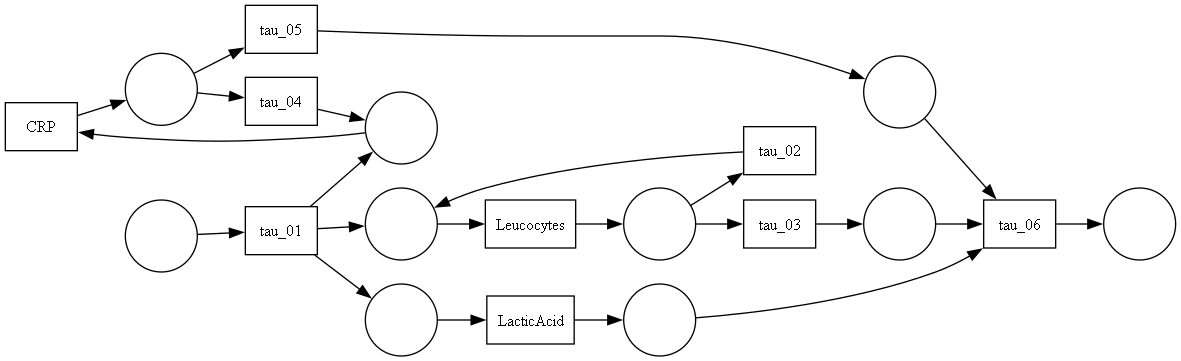

places: [ p1, p11, p12, p3, p4, p5, p6, p7, p8, p9 ]
transitions: [ (t1, 'tau_01'), (t10, 'tau_03'), (t13, 'tau_05'), (t2, 'Leucocytes'), (t5, 'tau_02'), (t6, 'CRP'), (t7, 'tau_06'), (t8, 'tau_04'), (t9, 'LacticAcid') ]
arcs: [ (t1, 'tau_01')->p4, (t1, 'tau_01')->p6, (t1, 'tau_01')->p7, (t10, 'tau_03')->p11, (t13, 'tau_05')->p12, (t2, 'Leucocytes')->p3, (t5, 'tau_02')->p6, (t6, 'CRP')->p5, (t7, 'tau_06')->p9, (t8, 'tau_04')->p4, (t9, 'LacticAcid')->p8, p1->(t1, 'tau_01'), p11->(t7, 'tau_06'), p12->(t7, 'tau_06'), p3->(t10, 'tau_03'), p3->(t5, 'tau_02'), p4->(t6, 'CRP'), p5->(t13, 'tau_05'), p5->(t8, 'tau_04'), p6->(t2, 'Leucocytes'), p7->(t9, 'LacticAcid'), p8->(t7, 'tau_06') ]


In [54]:
pm4py.view_petri_net(pn4, format='png')
print(pn4)

In [55]:
# def find_isolated_places_with_arcs_p41(petri_net):

#     place_connections = {}


#     incoming_arcs = {}
#     outgoing_arcs = {}


#     for arc in pn4.arcs:
#         source_place = arc.source
#         target_place = arc.target

    
#         place_connections[target_place] = place_connections.get(target_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[target_place]['incoming'] += 1

 
#         place_connections[source_place] = place_connections.get(source_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[source_place]['outgoing'] += 1


#         incoming_arcs[target_place] = incoming_arcs.get(target_place, [])
#         incoming_arcs[target_place].append(arc)

#         outgoing_arcs[source_place] = outgoing_arcs.get(source_place, [])
#         outgoing_arcs[source_place].append(arc)


#     isolated_places = {
#         'incoming': {place: incoming_arcs.get(place, []) for place, connections in place_connections.items() if connections['incoming'] == 0},
#         'outgoing': {place: outgoing_arcs.get(place, []) for place, connections in place_connections.items() if connections['outgoing'] == 0},
#     }

#     return isolated_places


isolated_places = find_isolated_places_with_arcs(pn4)


isolated_incoming_places_pn41 = isolated_places['incoming']
isolated_outgoing_places_pn41 = isolated_places['outgoing']


print("Isolated Incoming Places:", isolated_incoming_places_pn41)
print("Isolated Outgoing Places:", isolated_outgoing_places_pn41)


Isolated Incoming Places: {p1: []}
Isolated Outgoing Places: {p9: []}


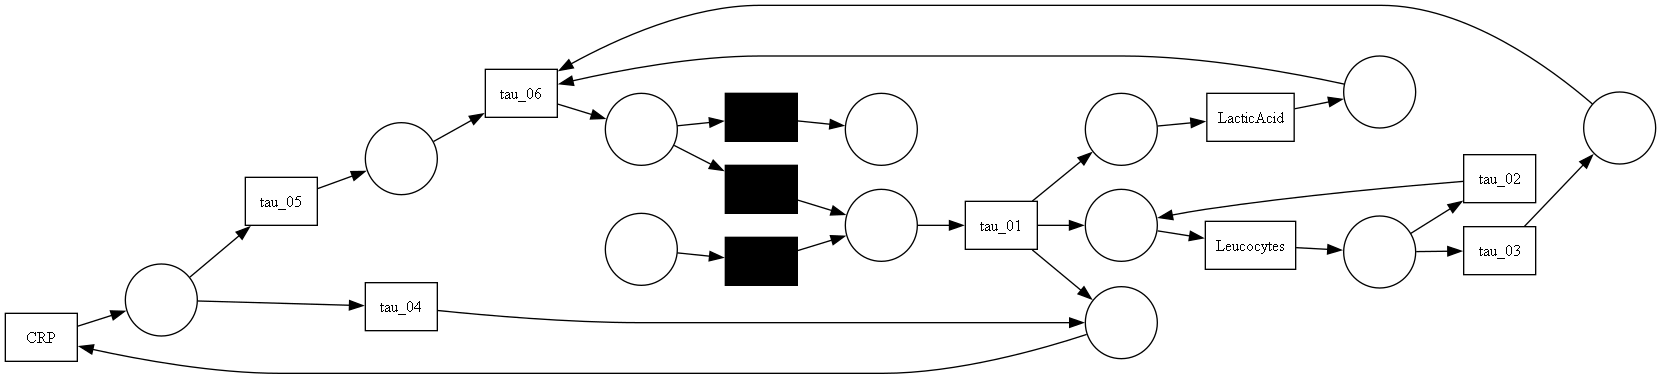

In [56]:
def add_place_transition_arc_to_incoming_places_p41(petri_net, incoming_places, outgoing_places, counts):    #ADD SKIP TRANSITION 
    petri_net7 = PetriNet()


    petri_net7.places.update(pn4.places)
    petri_net7.transitions.update(pn4.transitions)
    petri_net7.arcs.update(pn4.arcs)


    source_place1 = get_new_place(counts)
    petri_net7.places.add(source_place1)


    # source_transition1 = get_transition(counts, label="tau_transition13")
    source_transition1 = get_new_hidden_trans(counts,"tau_transition17")
    petri_net7.transitions.add(source_transition1)


    place_to_transition_arc = PetriNet.Arc(source_place1, source_transition1, weight=1)
    petri_net7.arcs.add(place_to_transition_arc)
    
    # loop_transition1 = get_transition(counts, label="loop")
    loop_transition1 = get_new_hidden_trans(counts,"loop_05")
    petri_net7.transitions.add(loop_transition1)


    for incoming_place in incoming_places:
        transition_to_incoming_place_arc = PetriNet.Arc(source_transition1, incoming_place, weight=1)
        petri_net7.arcs.add(transition_to_incoming_place_arc)
        
    for outgoing_place in outgoing_places:
        place_to_transition_arc2 = PetriNet.Arc(outgoing_place, loop_transition1, weight=1)
        petri_net7.arcs.add(place_to_transition_arc2)
        
    for incoming_place in incoming_places:
        place_to_transition_arc1 = PetriNet.Arc(loop_transition1, incoming_place, weight=1)
        petri_net7.arcs.add(place_to_transition_arc1)
        

    # sink_transition1 = get_transition(counts, label="tau_transition14")
    sink_transition1 = get_new_hidden_trans(counts,"tau_transition18")
    petri_net7.transitions.add(sink_transition1)
        

    for outgoing_place in outgoing_places:
        transition_to_incoming_place_arc = PetriNet.Arc(outgoing_place, sink_transition1, weight=1)
        petri_net7.arcs.add(transition_to_incoming_place_arc) 
        

    sink_place1 = get_new_place(counts)
    petri_net7.places.add(sink_place1)
    

    arc_to_sink_place1 = PetriNet.Arc(sink_transition1, sink_place1, weight=1)
    petri_net7.arcs.add(arc_to_sink_place1)

    return petri_net7



petri_net7 = add_place_transition_arc_to_incoming_places_p41(pn4, isolated_incoming_places_pn41, isolated_outgoing_places_pn41, counts)

pm4py.view_petri_net(petri_net7, format='png')

In [57]:
# def find_isolated_places_with_arcs_p42(petri_net):

#     place_connections = {}


#     incoming_arcs = {}
#     outgoing_arcs = {}


#     for arc in petri_net7.arcs:
#         source_place = arc.source
#         target_place = arc.target


#         place_connections[target_place] = place_connections.get(target_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[target_place]['incoming'] += 1


#         place_connections[source_place] = place_connections.get(source_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[source_place]['outgoing'] += 1


#         incoming_arcs[target_place] = incoming_arcs.get(target_place, [])
#         incoming_arcs[target_place].append(arc)


#         outgoing_arcs[source_place] = outgoing_arcs.get(source_place, [])
#         outgoing_arcs[source_place].append(arc)


#     isolated_places = {
#         'incoming': {place: incoming_arcs.get(place, []) for place, connections in place_connections.items() if connections['incoming'] == 0},
#         'outgoing': {place: outgoing_arcs.get(place, []) for place, connections in place_connections.items() if connections['outgoing'] == 0},
#     }

#     return isolated_places


isolated_places = find_isolated_places_with_arcs(petri_net7)
# print(isolated_places)


isolated_incoming_places_pn42 = isolated_places['incoming']
isolated_outgoing_places_pn42 = isolated_places['outgoing']


print("Isolated Incoming Places:", isolated_incoming_places_pn42)
print("Isolated Outgoing Places:", isolated_outgoing_places_pn42)


Isolated Incoming Places: {p_13: []}
Isolated Outgoing Places: {p_14: []}


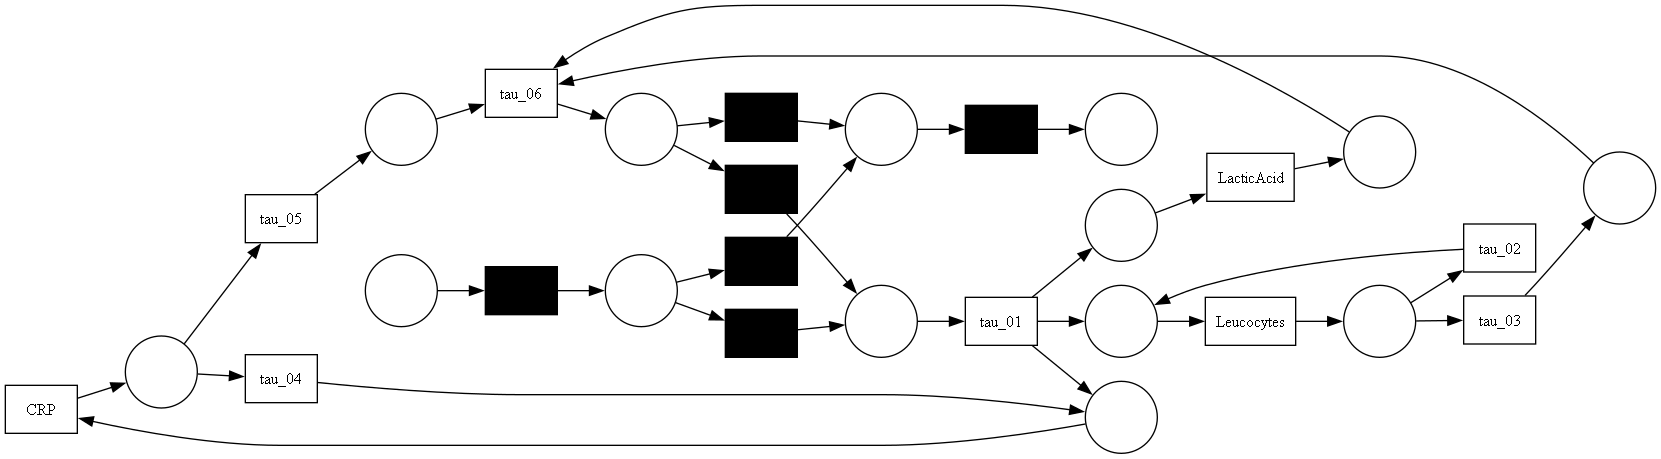

In [58]:
def add_place_transition_arc_to_incoming_places_p42(petri_net, incoming_places, outgoing_places, counts):    #BASE CODE WORKS
    petri_net8 = PetriNet()


    petri_net8.places.update(petri_net7.places)
    petri_net8.transitions.update(petri_net7.transitions)
    petri_net8.arcs.update(petri_net7.arcs)


    source_place1 = get_new_place(counts)
    petri_net8.places.add(source_place1)


    # source_transition1 = get_transition(counts, label="tau_transition15")
    source_transition1 = get_new_hidden_trans(counts,"tau_transition19")
    petri_net8.transitions.add(source_transition1)


    place_to_transition_arc = PetriNet.Arc(source_place1, source_transition1, weight=1)
    petri_net8.arcs.add(place_to_transition_arc)
    
    # loop_transition2 = get_transition(counts, label="skip")
    loop_transition2 = get_new_hidden_trans(counts,"skip_05")
    petri_net8.transitions.add(loop_transition2)


    for incoming_place in incoming_places:
        transition_to_incoming_place_arc = PetriNet.Arc(source_transition1, incoming_place, weight=1)
        petri_net8.arcs.add(transition_to_incoming_place_arc)
        
    for outgoing_place in outgoing_places:
        place_to_transition_arc2 = PetriNet.Arc(loop_transition2, outgoing_place, weight=1)
        petri_net8.arcs.add(place_to_transition_arc2)
        
    for incoming_place in incoming_places:
        place_to_transition_arc1 = PetriNet.Arc(incoming_place, loop_transition2, weight=1)
        petri_net8.arcs.add(place_to_transition_arc1)
        

    # sink_transition1 = get_transition(counts, label="tau_transition16")
    sink_transition1 = get_new_hidden_trans(counts,"tau_transition20")
    petri_net8.transitions.add(sink_transition1)
        

    for outgoing_place in outgoing_places:
        transition_to_incoming_place_arc = PetriNet.Arc(outgoing_place, sink_transition1, weight=1)
        petri_net8.arcs.add(transition_to_incoming_place_arc) 
        

    sink_place1 = get_new_place(counts)
    petri_net8.places.add(sink_place1)
    

    arc_to_sink_place1 = PetriNet.Arc(sink_transition1, sink_place1, weight=1)
    petri_net8.arcs.add(arc_to_sink_place1)

    return petri_net8

petri_net8 = add_place_transition_arc_to_incoming_places_p42(petri_net7, isolated_incoming_places_pn42, isolated_outgoing_places_pn42, counts)

pm4py.view_petri_net(petri_net8, format='png')

In [59]:
print(petri_net8)

places: [ p1, p11, p12, p3, p4, p5, p6, p7, p8, p9, p_13, p_14, p_15, p_16 ]
transitions: [ (loop_05, None), (skip_05, None), (t1, 'tau_01'), (t10, 'tau_03'), (t13, 'tau_05'), (t2, 'Leucocytes'), (t5, 'tau_02'), (t6, 'CRP'), (t7, 'tau_06'), (t8, 'tau_04'), (t9, 'LacticAcid'), (tau_transition17, None), (tau_transition18, None), (tau_transition19, None), (tau_transition20, None) ]
arcs: [ (loop_05, None)->p1, (skip_05, None)->p_14, (t1, 'tau_01')->p4, (t1, 'tau_01')->p6, (t1, 'tau_01')->p7, (t10, 'tau_03')->p11, (t13, 'tau_05')->p12, (t2, 'Leucocytes')->p3, (t5, 'tau_02')->p6, (t6, 'CRP')->p5, (t7, 'tau_06')->p9, (t8, 'tau_04')->p4, (t9, 'LacticAcid')->p8, (tau_transition17, None)->p1, (tau_transition18, None)->p_14, (tau_transition19, None)->p_13, (tau_transition20, None)->p_16, p1->(t1, 'tau_01'), p11->(t7, 'tau_06'), p12->(t7, 'tau_06'), p3->(t10, 'tau_03'), p3->(t5, 'tau_02'), p4->(t6, 'CRP'), p5->(t13, 'tau_05'), p5->(t8, 'tau_04'), p6->(t2, 'Leucocytes'), p7->(t9, 'LacticAcid'), p8

Lab net has been successfully created


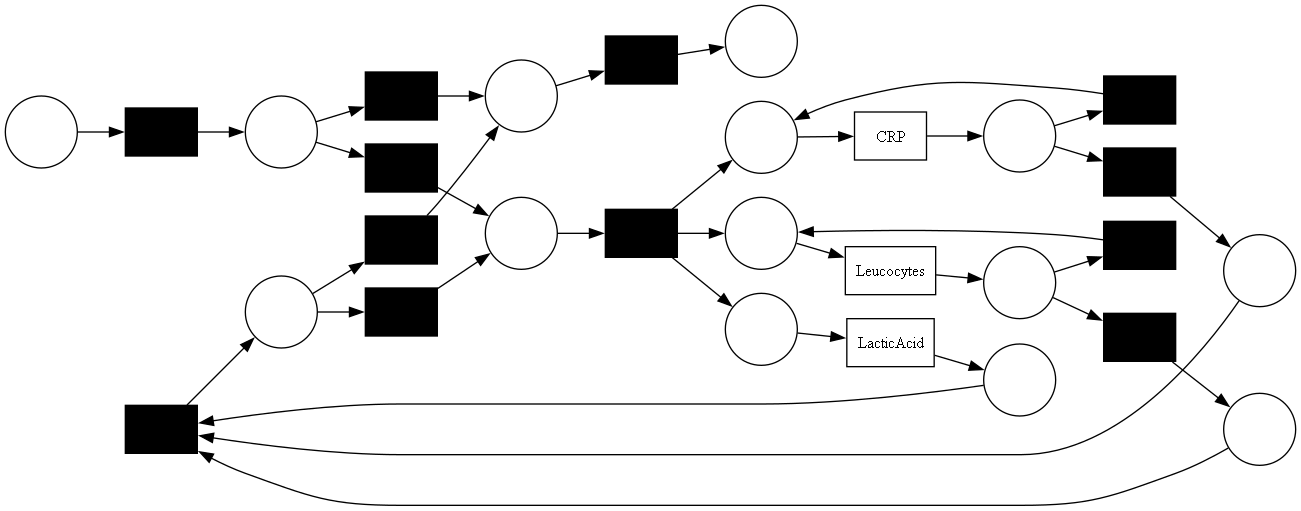

In [60]:
# List of transitions 
transitions_to_replace = [trans.label for trans in petri_net8.transitions if trans.label and trans.label.startswith(('tau', 'Tau'))]

petri_net8 = replace_with_hidden_transition(petri_net8, transitions_to_replace, counts)

if petri_net8 is None:
    print("Error: The Petri_net8 is None.")
else:
    print("Lab net has been successfully created")

if not hasattr(petri_net8, 'name') or petri_net8.name is None:
    petri_net8.name = "Petri_Net8"


pm4py.view_petri_net(petri_net8, format='png')

In [61]:
print(petri_net8)

places: [ p1, p11, p12, p3, p4, p5, p6, p7, p8, p9, p_13, p_14, p_15, p_16 ]
transitions: [ (loop_05, None), (skip_05, None), (t2, 'Leucocytes'), (t6, 'CRP'), (t9, 'LacticAcid'), (tau_01, None), (tau_02, None), (tau_03, None), (tau_04, None), (tau_05, None), (tau_06, None), (tau_transition17, None), (tau_transition18, None), (tau_transition19, None), (tau_transition20, None) ]
arcs: [ (loop_05, None)->p1, (skip_05, None)->p_14, (t2, 'Leucocytes')->p3, (t6, 'CRP')->p5, (t9, 'LacticAcid')->p8, (tau_01, None)->p4, (tau_01, None)->p6, (tau_01, None)->p7, (tau_02, None)->p6, (tau_03, None)->p11, (tau_04, None)->p4, (tau_05, None)->p12, (tau_06, None)->p9, (tau_transition17, None)->p1, (tau_transition18, None)->p_14, (tau_transition19, None)->p_13, (tau_transition20, None)->p_16, p1->(tau_01, None), p11->(tau_06, None), p12->(tau_06, None), p3->(tau_02, None), p3->(tau_03, None), p4->(t6, 'CRP'), p5->(tau_04, None), p5->(tau_05, None), p6->(t2, 'Leucocytes'), p7->(t9, 'LacticAcid'), p8->(tau

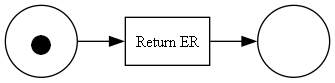

places: [ p1, p2 ]
transitions: [ (t1, 'Return ER') ]
arcs: [ (t1, 'Return ER')->p2, p1->(t1, 'Return ER') ]


In [62]:
pm4py.view_petri_net(pn6, im6, format='png')
print(pn6)

In [63]:
# def find_isolated_places_with_arcs_p61(petri_net):

#     place_connections = {}


#     incoming_arcs = {}
#     outgoing_arcs = {}


#     for arc in pn6.arcs:
#         source_place = arc.source
#         target_place = arc.target

    
#         place_connections[target_place] = place_connections.get(target_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[target_place]['incoming'] += 1

 
#         place_connections[source_place] = place_connections.get(source_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[source_place]['outgoing'] += 1


#         incoming_arcs[target_place] = incoming_arcs.get(target_place, [])
#         incoming_arcs[target_place].append(arc)

#         outgoing_arcs[source_place] = outgoing_arcs.get(source_place, [])
#         outgoing_arcs[source_place].append(arc)


#     isolated_places = {
#         'incoming': {place: incoming_arcs.get(place, []) for place, connections in place_connections.items() if connections['incoming'] == 0},
#         'outgoing': {place: outgoing_arcs.get(place, []) for place, connections in place_connections.items() if connections['outgoing'] == 0},
#     }

#     return isolated_places


isolated_places = find_isolated_places_with_arcs(pn6)


isolated_incoming_places_pn61 = isolated_places['incoming']
isolated_outgoing_places_pn61 = isolated_places['outgoing']


print("Isolated Incoming Places:", isolated_incoming_places_pn61)
print("Isolated Outgoing Places:", isolated_outgoing_places_pn61)


Isolated Incoming Places: {p1: []}
Isolated Outgoing Places: {p2: []}


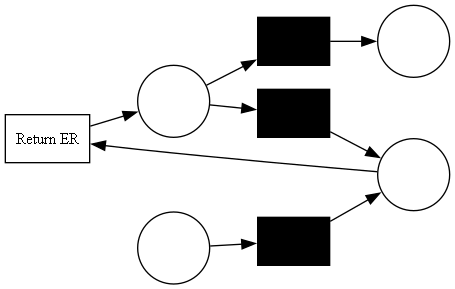

In [64]:
def add_place_transition_arc_to_incoming_places_p61(petri_net, incoming_places, outgoing_places, counts):    #ADD LOOP TRANSITION 
    petri_net11 = PetriNet()


    petri_net11.places.update(pn6.places)
    petri_net11.transitions.update(pn6.transitions)
    petri_net11.arcs.update(pn6.arcs)


    source_place1 = get_new_place(counts)
    petri_net11.places.add(source_place1)


    # source_transition1 = get_transition(counts, label="tau_transition13")
    source_transition1 = get_new_hidden_trans(counts,"tau_transition21")
    petri_net11.transitions.add(source_transition1)


    place_to_transition_arc = PetriNet.Arc(source_place1, source_transition1, weight=1)
    petri_net11.arcs.add(place_to_transition_arc)
    
    # loop_transition1 = get_transition(counts, label="loop")
    loop_transition1 = get_new_hidden_trans(counts,"loop_06")
    petri_net11.transitions.add(loop_transition1)


    for incoming_place in incoming_places:
        transition_to_incoming_place_arc = PetriNet.Arc(source_transition1, incoming_place, weight=1)
        petri_net11.arcs.add(transition_to_incoming_place_arc)
        
    for outgoing_place in outgoing_places:
        place_to_transition_arc2 = PetriNet.Arc(outgoing_place, loop_transition1, weight=1)
        petri_net11.arcs.add(place_to_transition_arc2)
        
    for incoming_place in incoming_places:
        place_to_transition_arc1 = PetriNet.Arc(loop_transition1, incoming_place, weight=1)
        petri_net11.arcs.add(place_to_transition_arc1)
        

    # sink_transition1 = get_transition(counts, label="tau_transition14")
    sink_transition1 = get_new_hidden_trans(counts,"tau_transition22")
    petri_net11.transitions.add(sink_transition1)
        

    for outgoing_place in outgoing_places:
        transition_to_incoming_place_arc = PetriNet.Arc(outgoing_place, sink_transition1, weight=1)
        petri_net11.arcs.add(transition_to_incoming_place_arc) 
        

    sink_place1 = get_new_place(counts)
    petri_net11.places.add(sink_place1)
    

    arc_to_sink_place1 = PetriNet.Arc(sink_transition1, sink_place1, weight=1)
    petri_net11.arcs.add(arc_to_sink_place1)

    return petri_net11



petri_net11 = add_place_transition_arc_to_incoming_places_p61(pn6, isolated_incoming_places_pn61, isolated_outgoing_places_pn61, counts)

pm4py.view_petri_net(petri_net11, format='png')

In [65]:
# def find_isolated_places_with_arcs_p62(petri_net):

#     place_connections = {}


#     incoming_arcs = {}
#     outgoing_arcs = {}


#     for arc in petri_net11.arcs:
#         source_place = arc.source
#         target_place = arc.target


#         place_connections[target_place] = place_connections.get(target_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[target_place]['incoming'] += 1


#         place_connections[source_place] = place_connections.get(source_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[source_place]['outgoing'] += 1


#         incoming_arcs[target_place] = incoming_arcs.get(target_place, [])
#         incoming_arcs[target_place].append(arc)


#         outgoing_arcs[source_place] = outgoing_arcs.get(source_place, [])
#         outgoing_arcs[source_place].append(arc)


#     isolated_places = {
#         'incoming': {place: incoming_arcs.get(place, []) for place, connections in place_connections.items() if connections['incoming'] == 0},
#         'outgoing': {place: outgoing_arcs.get(place, []) for place, connections in place_connections.items() if connections['outgoing'] == 0},
#     }

#     return isolated_places


isolated_places = find_isolated_places_with_arcs(petri_net11)
# print(isolated_places)


isolated_incoming_places_pn62 = isolated_places['incoming']
isolated_outgoing_places_pn62 = isolated_places['outgoing']


print("Isolated Incoming Places:", isolated_incoming_places_pn62)
print("Isolated Outgoing Places:", isolated_outgoing_places_pn62)


Isolated Incoming Places: {p_17: []}
Isolated Outgoing Places: {p_18: []}


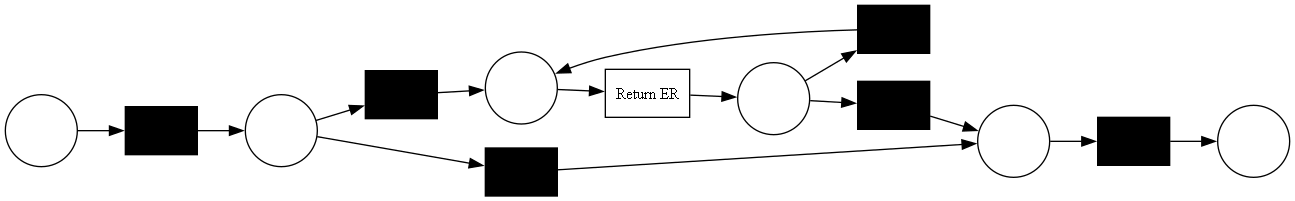

In [66]:
def add_place_transition_arc_to_incoming_places_p62(petri_net, incoming_places, outgoing_places, counts):    #BASE CODE WORKS
    petri_net12 = PetriNet()


    petri_net12.places.update(petri_net11.places)
    petri_net12.transitions.update(petri_net11.transitions)
    petri_net12.arcs.update(petri_net11.arcs)


    source_place1 = get_new_place(counts)
    petri_net12.places.add(source_place1)


    # source_transition1 = get_transition(counts, label="tau_transition15")
    source_transition1 = get_new_hidden_trans(counts,"tau_transition23")
    petri_net12.transitions.add(source_transition1)


    place_to_transition_arc = PetriNet.Arc(source_place1, source_transition1, weight=1)
    petri_net12.arcs.add(place_to_transition_arc)
    
    # loop_transition2 = get_transition(counts, label="skip")
    loop_transition2 = get_new_hidden_trans(counts,"skip_06")
    petri_net12.transitions.add(loop_transition2)


    for incoming_place in incoming_places:
        transition_to_incoming_place_arc = PetriNet.Arc(source_transition1, incoming_place, weight=1)
        petri_net12.arcs.add(transition_to_incoming_place_arc)
        
    for outgoing_place in outgoing_places:
        place_to_transition_arc2 = PetriNet.Arc(loop_transition2, outgoing_place, weight=1)
        petri_net12.arcs.add(place_to_transition_arc2)
        
    for incoming_place in incoming_places:
        place_to_transition_arc1 = PetriNet.Arc(incoming_place, loop_transition2, weight=1)
        petri_net12.arcs.add(place_to_transition_arc1)
        

    # sink_transition1 = get_transition(counts, label="tau_transition16")
    sink_transition1 = get_new_hidden_trans(counts,"tau_transition24")
    petri_net12.transitions.add(sink_transition1)
        

    for outgoing_place in outgoing_places:
        transition_to_incoming_place_arc = PetriNet.Arc(outgoing_place, sink_transition1, weight=1)
        petri_net12.arcs.add(transition_to_incoming_place_arc) 
        

    sink_place1 = get_new_place(counts)
    petri_net12.places.add(sink_place1)
    

    arc_to_sink_place1 = PetriNet.Arc(sink_transition1, sink_place1, weight=1)
    petri_net12.arcs.add(arc_to_sink_place1)

    return petri_net12

petri_net12 = add_place_transition_arc_to_incoming_places_p62(petri_net11, isolated_incoming_places_pn62, isolated_outgoing_places_pn62, counts)

pm4py.view_petri_net(petri_net12, format='png')

In [67]:
print(petri_net12)

places: [ p1, p2, p_17, p_18, p_19, p_20 ]
transitions: [ (loop_06, None), (skip_06, None), (t1, 'Return ER'), (tau_transition21, None), (tau_transition22, None), (tau_transition23, None), (tau_transition24, None) ]
arcs: [ (loop_06, None)->p1, (skip_06, None)->p_18, (t1, 'Return ER')->p2, (tau_transition21, None)->p1, (tau_transition22, None)->p_18, (tau_transition23, None)->p_17, (tau_transition24, None)->p_20, p1->(t1, 'Return ER'), p2->(loop_06, None), p2->(tau_transition22, None), p_17->(skip_06, None), p_17->(tau_transition21, None), p_18->(tau_transition24, None), p_19->(tau_transition23, None) ]


Parallel Composed net

In [68]:
petri_nets = [petri_net2,petri_net4,petri_net6,petri_net8,petri_net10,petri_net12]

def compose_petrinets(petri_nets, counts): #Compose multiple Petri nets into a single Petri net.
   
    composed_net = PetriNet() 


    place_mapping = {}
    transition_mapping = {}

   
    for petri_tuple in petri_nets:
        petrinet = petri_tuple  #Petri net is the first element in the tuple

        # Copy places 
        for place in petrinet.places:
            new_place = get_new_place(counts)
            composed_net.places.add(new_place)
            place_mapping[(petrinet, place)] = new_place

        # Copy transitions
        for transition in petrinet.transitions:
             if transition.label is None:  # Handle hidden transitions
                new_transition = get_new_hidden_trans(counts, type_trans=transition.name)
             else:
                new_transition = get_transition(counts, label=transition.label)
             composed_net.transitions.add(new_transition)
             transition_mapping[(petrinet, transition)] = new_transition

        # Copy arcs 
        for arc in petrinet.arcs:
            source = place_mapping.get((petrinet, arc.source), transition_mapping.get((petrinet, arc.source)))
            target = place_mapping.get((petrinet, arc.target), transition_mapping.get((petrinet, arc.target)))
            weight = arc.weight
            new_arc = PetriNet.Arc(source, target, weight)
            composed_net.arcs.add(new_arc)

    return composed_net


composed_net = compose_petrinets(petri_nets, counts)

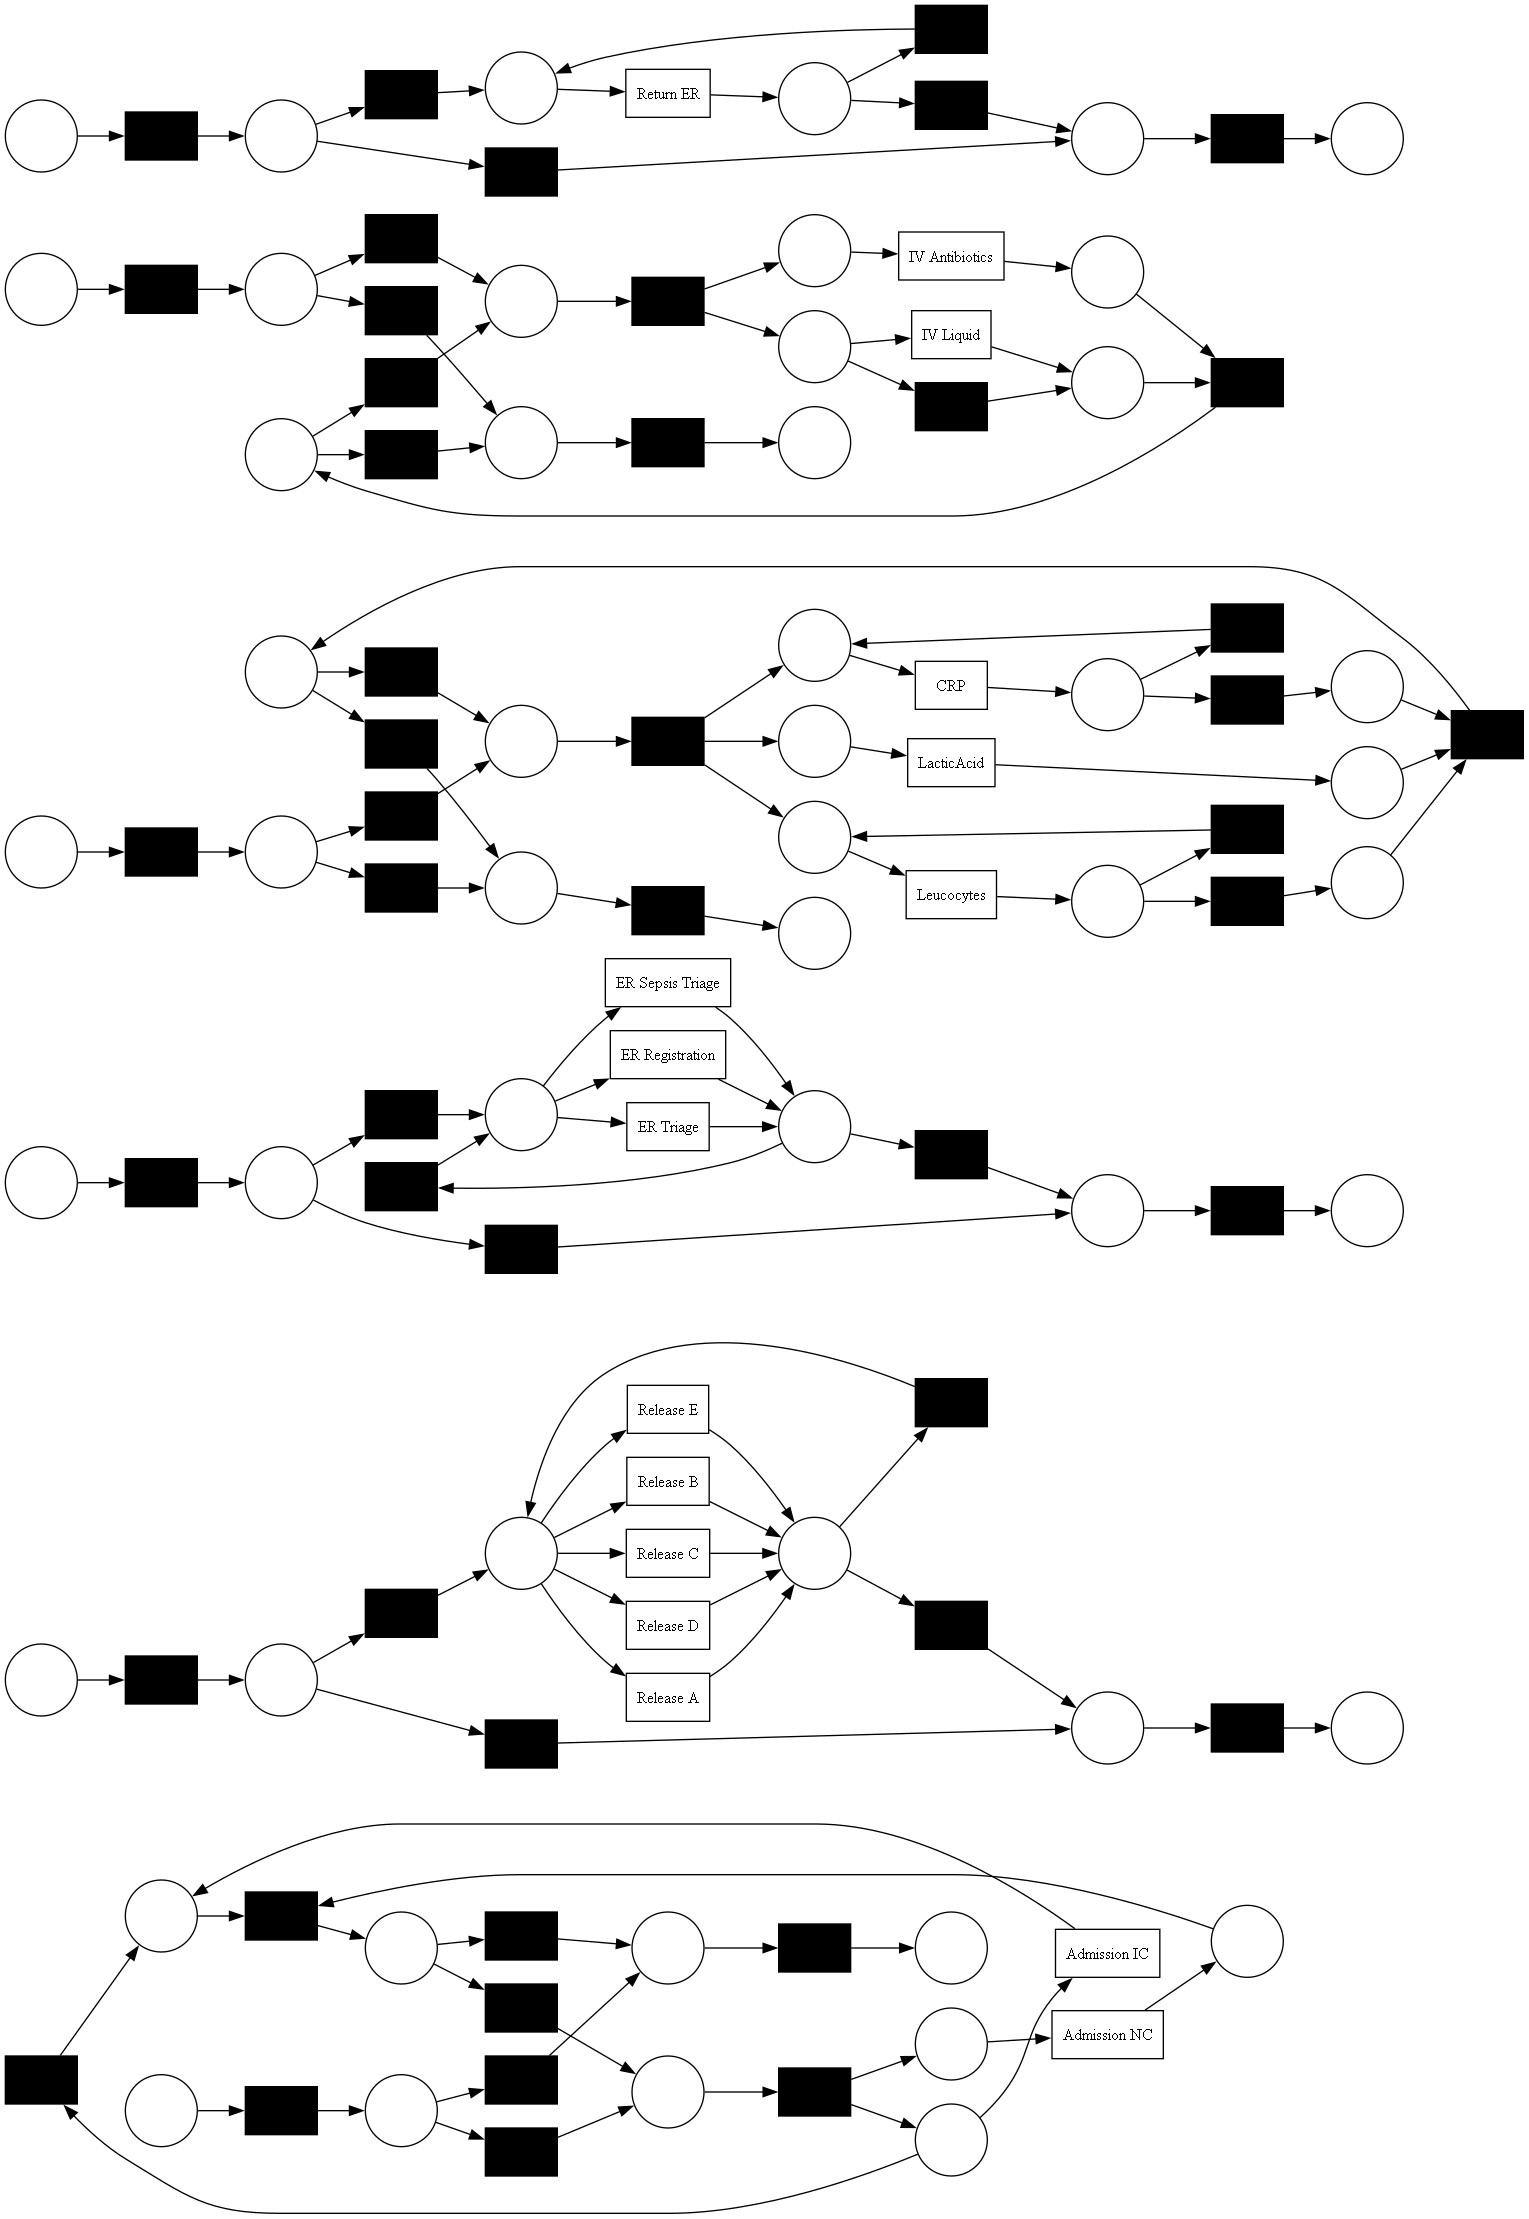

In [69]:
pm4py.view_petri_net(composed_net, format='png')

In [70]:
print(composed_net)

places: [ p_21, p_22, p_23, p_24, p_25, p_26, p_27, p_28, p_29, p_30, p_31, p_32, p_33, p_34, p_35, p_36, p_37, p_38, p_39, p_40, p_41, p_42, p_43, p_44, p_45, p_46, p_47, p_48, p_49, p_50, p_51, p_52, p_53, p_54, p_55, p_56, p_57, p_58, p_59, p_60, p_61, p_62, p_63, p_64, p_65, p_66, p_67, p_68, p_69, p_70, p_71, p_72 ]
transitions: [ (176d31d1-5219-4bef-a5ff-80bb7d63b611, 'Admission NC'), (2120234b-a68b-4a88-9122-3c48183c5793, 'Leucocytes'), (67e23538-4d21-4291-a922-d5c13ebe4047, 'Release A'), (7899325c-759e-4f72-bc31-b655ee5b9cfb, 'IV Antibiotics'), (7b565e62-41e4-411e-bce2-02acf38a91f3, 'Admission IC'), (8c11a2b3-19d0-4611-910b-9fd171347acc, 'CRP'), (9025b745-0546-4714-a569-1c7a2601d3fb, 'Release B'), (9f518880-c115-44f7-80d4-44e2a1ff22e6, 'LacticAcid'), (a6255abb-9731-431b-8e37-a23d0d3fa405, 'Release C'), (a8059367-ecbd-48dd-8500-63e7c6d07832, 'IV Liquid'), (aed2edab-be47-4869-8bc5-6571cdc0973b, 'Return ER'), (b73c39a7-34af-44d9-87ad-83ef49f3d02d, 'ER Sepsis Triage'), (d8a5fd1e-ec

In [71]:
# def find_isolated_places_with_arcs(composed_net):

#     place_connections = {}


#     incoming_arcs = {}
#     outgoing_arcs = {}


#     for arc in composed_net.arcs:
#         source_place = arc.source
#         target_place = arc.target

   
#         place_connections[target_place] = place_connections.get(target_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[target_place]['incoming'] += 1


#         place_connections[source_place] = place_connections.get(source_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[source_place]['outgoing'] += 1


#         incoming_arcs[target_place] = incoming_arcs.get(target_place, [])
#         incoming_arcs[target_place].append(arc)


#         outgoing_arcs[source_place] = outgoing_arcs.get(source_place, [])
#         outgoing_arcs[source_place].append(arc)


#     isolated_places = {
#         'incoming': {place: incoming_arcs.get(place, []) for place, connections in place_connections.items() if connections['incoming'] == 0},
#         'outgoing': {place: outgoing_arcs.get(place, []) for place, connections in place_connections.items() if connections['outgoing'] == 0},
#     }

#     return isolated_places


isolated_places = find_isolated_places_with_arcs(composed_net)
# print(isolated_places)


isolated_incoming_places_cn = isolated_places['incoming']
isolated_outgoing_places_cn = isolated_places['outgoing']


print("Isolated Incoming Places:", isolated_incoming_places_cn)
print("Isolated Outgoing Places:", isolated_outgoing_places_cn)

Isolated Incoming Places: {p_71: [], p_55: [], p_41: [], p_28: [], p_33: [], p_60: []}
Isolated Outgoing Places: {p_34: [], p_56: [], p_66: [], p_42: [], p_72: [], p_23: []}


In [72]:
def add_place_transition_arc_to_incoming_places(composed_net, incoming_places, outgoing_places, counts):    #BASE CODE WORKS
    modified_net = PetriNet()

    # Copy
    modified_net.places.update(composed_net.places)
    modified_net.transitions.update(composed_net.transitions)
    modified_net.arcs.update(composed_net.arcs)

    # Add a place
    source_place1 = get_new_place(counts)
    modified_net.places.add(source_place1)

    # Add a transition
    # source_transition1 = get_transition(counts, label="silent_transition1")
    source_transition1 = get_new_hidden_trans(counts,"source_transition")
    modified_net.transitions.add(source_transition1)

    # Add arc
    place_to_transition_arc = PetriNet.Arc(source_place1, source_transition1, weight=1)
    modified_net.arcs.add(place_to_transition_arc)

    # Add arcs
    for incoming_place in incoming_places:
        transition_to_incoming_place_arc = PetriNet.Arc(source_transition1, incoming_place, weight=1)
        modified_net.arcs.add(transition_to_incoming_place_arc)
        
    # Add a transition
    # sink_transition1 = get_transition(counts, label="silent_transition2")
    sink_transition1 = get_new_hidden_trans(counts,"sink_transition")
    modified_net.transitions.add(sink_transition1)
    
    # Add arcs 
    for outgoing_place in outgoing_places:
        transition_to_incoming_place_arc = PetriNet.Arc(outgoing_place, sink_transition1, weight=1)
        modified_net.arcs.add(transition_to_incoming_place_arc)
        
     # Add a sink place
    sink_place1 = get_new_place(counts)
    modified_net.places.add(sink_place1)
    
    # Add an arc from thetransition to the place
    arc_to_sink_place1 = PetriNet.Arc(sink_transition1, sink_place1, weight=1)
    modified_net.arcs.add(arc_to_sink_place1)

    return modified_net

# Add a place, transition, and arcs to incoming places
modified_net = add_place_transition_arc_to_incoming_places(composed_net, isolated_incoming_places_cn, isolated_outgoing_places_cn, counts)

# pm4py.view_petri_net(modified_net, format='png')

In [73]:
print(modified_net)

places: [ p_21, p_22, p_23, p_24, p_25, p_26, p_27, p_28, p_29, p_30, p_31, p_32, p_33, p_34, p_35, p_36, p_37, p_38, p_39, p_40, p_41, p_42, p_43, p_44, p_45, p_46, p_47, p_48, p_49, p_50, p_51, p_52, p_53, p_54, p_55, p_56, p_57, p_58, p_59, p_60, p_61, p_62, p_63, p_64, p_65, p_66, p_67, p_68, p_69, p_70, p_71, p_72, p_73, p_74 ]
transitions: [ (176d31d1-5219-4bef-a5ff-80bb7d63b611, 'Admission NC'), (2120234b-a68b-4a88-9122-3c48183c5793, 'Leucocytes'), (67e23538-4d21-4291-a922-d5c13ebe4047, 'Release A'), (7899325c-759e-4f72-bc31-b655ee5b9cfb, 'IV Antibiotics'), (7b565e62-41e4-411e-bce2-02acf38a91f3, 'Admission IC'), (8c11a2b3-19d0-4611-910b-9fd171347acc, 'CRP'), (9025b745-0546-4714-a569-1c7a2601d3fb, 'Release B'), (9f518880-c115-44f7-80d4-44e2a1ff22e6, 'LacticAcid'), (a6255abb-9731-431b-8e37-a23d0d3fa405, 'Release C'), (a8059367-ecbd-48dd-8500-63e7c6d07832, 'IV Liquid'), (aed2edab-be47-4869-8bc5-6571cdc0973b, 'Return ER'), (b73c39a7-34af-44d9-87ad-83ef49f3d02d, 'ER Sepsis Triage'), 

Finding and placing initial and final markings

In [74]:
# def find_isolated_places_with_arcs(modified_net):
  
#     place_connections = {}


#     incoming_arcs = {}
#     outgoing_arcs = {}


#     for arc in modified_net.arcs:
#         source_place = arc.source
#         target_place = arc.target

 
#         place_connections[target_place] = place_connections.get(target_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[target_place]['incoming'] += 1

   
#         place_connections[source_place] = place_connections.get(source_place, {'incoming': 0, 'outgoing': 0})
#         place_connections[source_place]['outgoing'] += 1


#         incoming_arcs[target_place] = incoming_arcs.get(target_place, [])
#         incoming_arcs[target_place].append(arc)


#         outgoing_arcs[source_place] = outgoing_arcs.get(source_place, [])
#         outgoing_arcs[source_place].append(arc)


#     isolated_places = {
#         'incoming': {place: incoming_arcs.get(place, []) for place, connections in place_connections.items() if connections['incoming'] == 0},
#         'outgoing': {place: outgoing_arcs.get(place, []) for place, connections in place_connections.items() if connections['outgoing'] == 0},
#     }

#     return isolated_places


isolated_places = find_isolated_places_with_arcs(modified_net)
# print(isolated_places)


isolated_incoming_places_mn = isolated_places['incoming']
isolated_outgoing_places_mn = isolated_places['outgoing']


print("Isolated Incoming Places:", isolated_incoming_places_mn)
print("Isolated Outgoing Places:", isolated_outgoing_places_mn)

Isolated Incoming Places: {p_73: []}
Isolated Outgoing Places: {p_74: []}


In [75]:
from pm4py.objects.petri_net.obj import Marking

# modified_net = PetriNet()
places = {place.name: place for place in modified_net.places}

initial_marking = Marking()
initial_marking[places['p_73']] = 1  
#initial_marking = {places['p_58']: 1}

final_marking = Marking()
final_marking[places['p_74']] = 1
# #final_marking = {places['p_59']: 1}

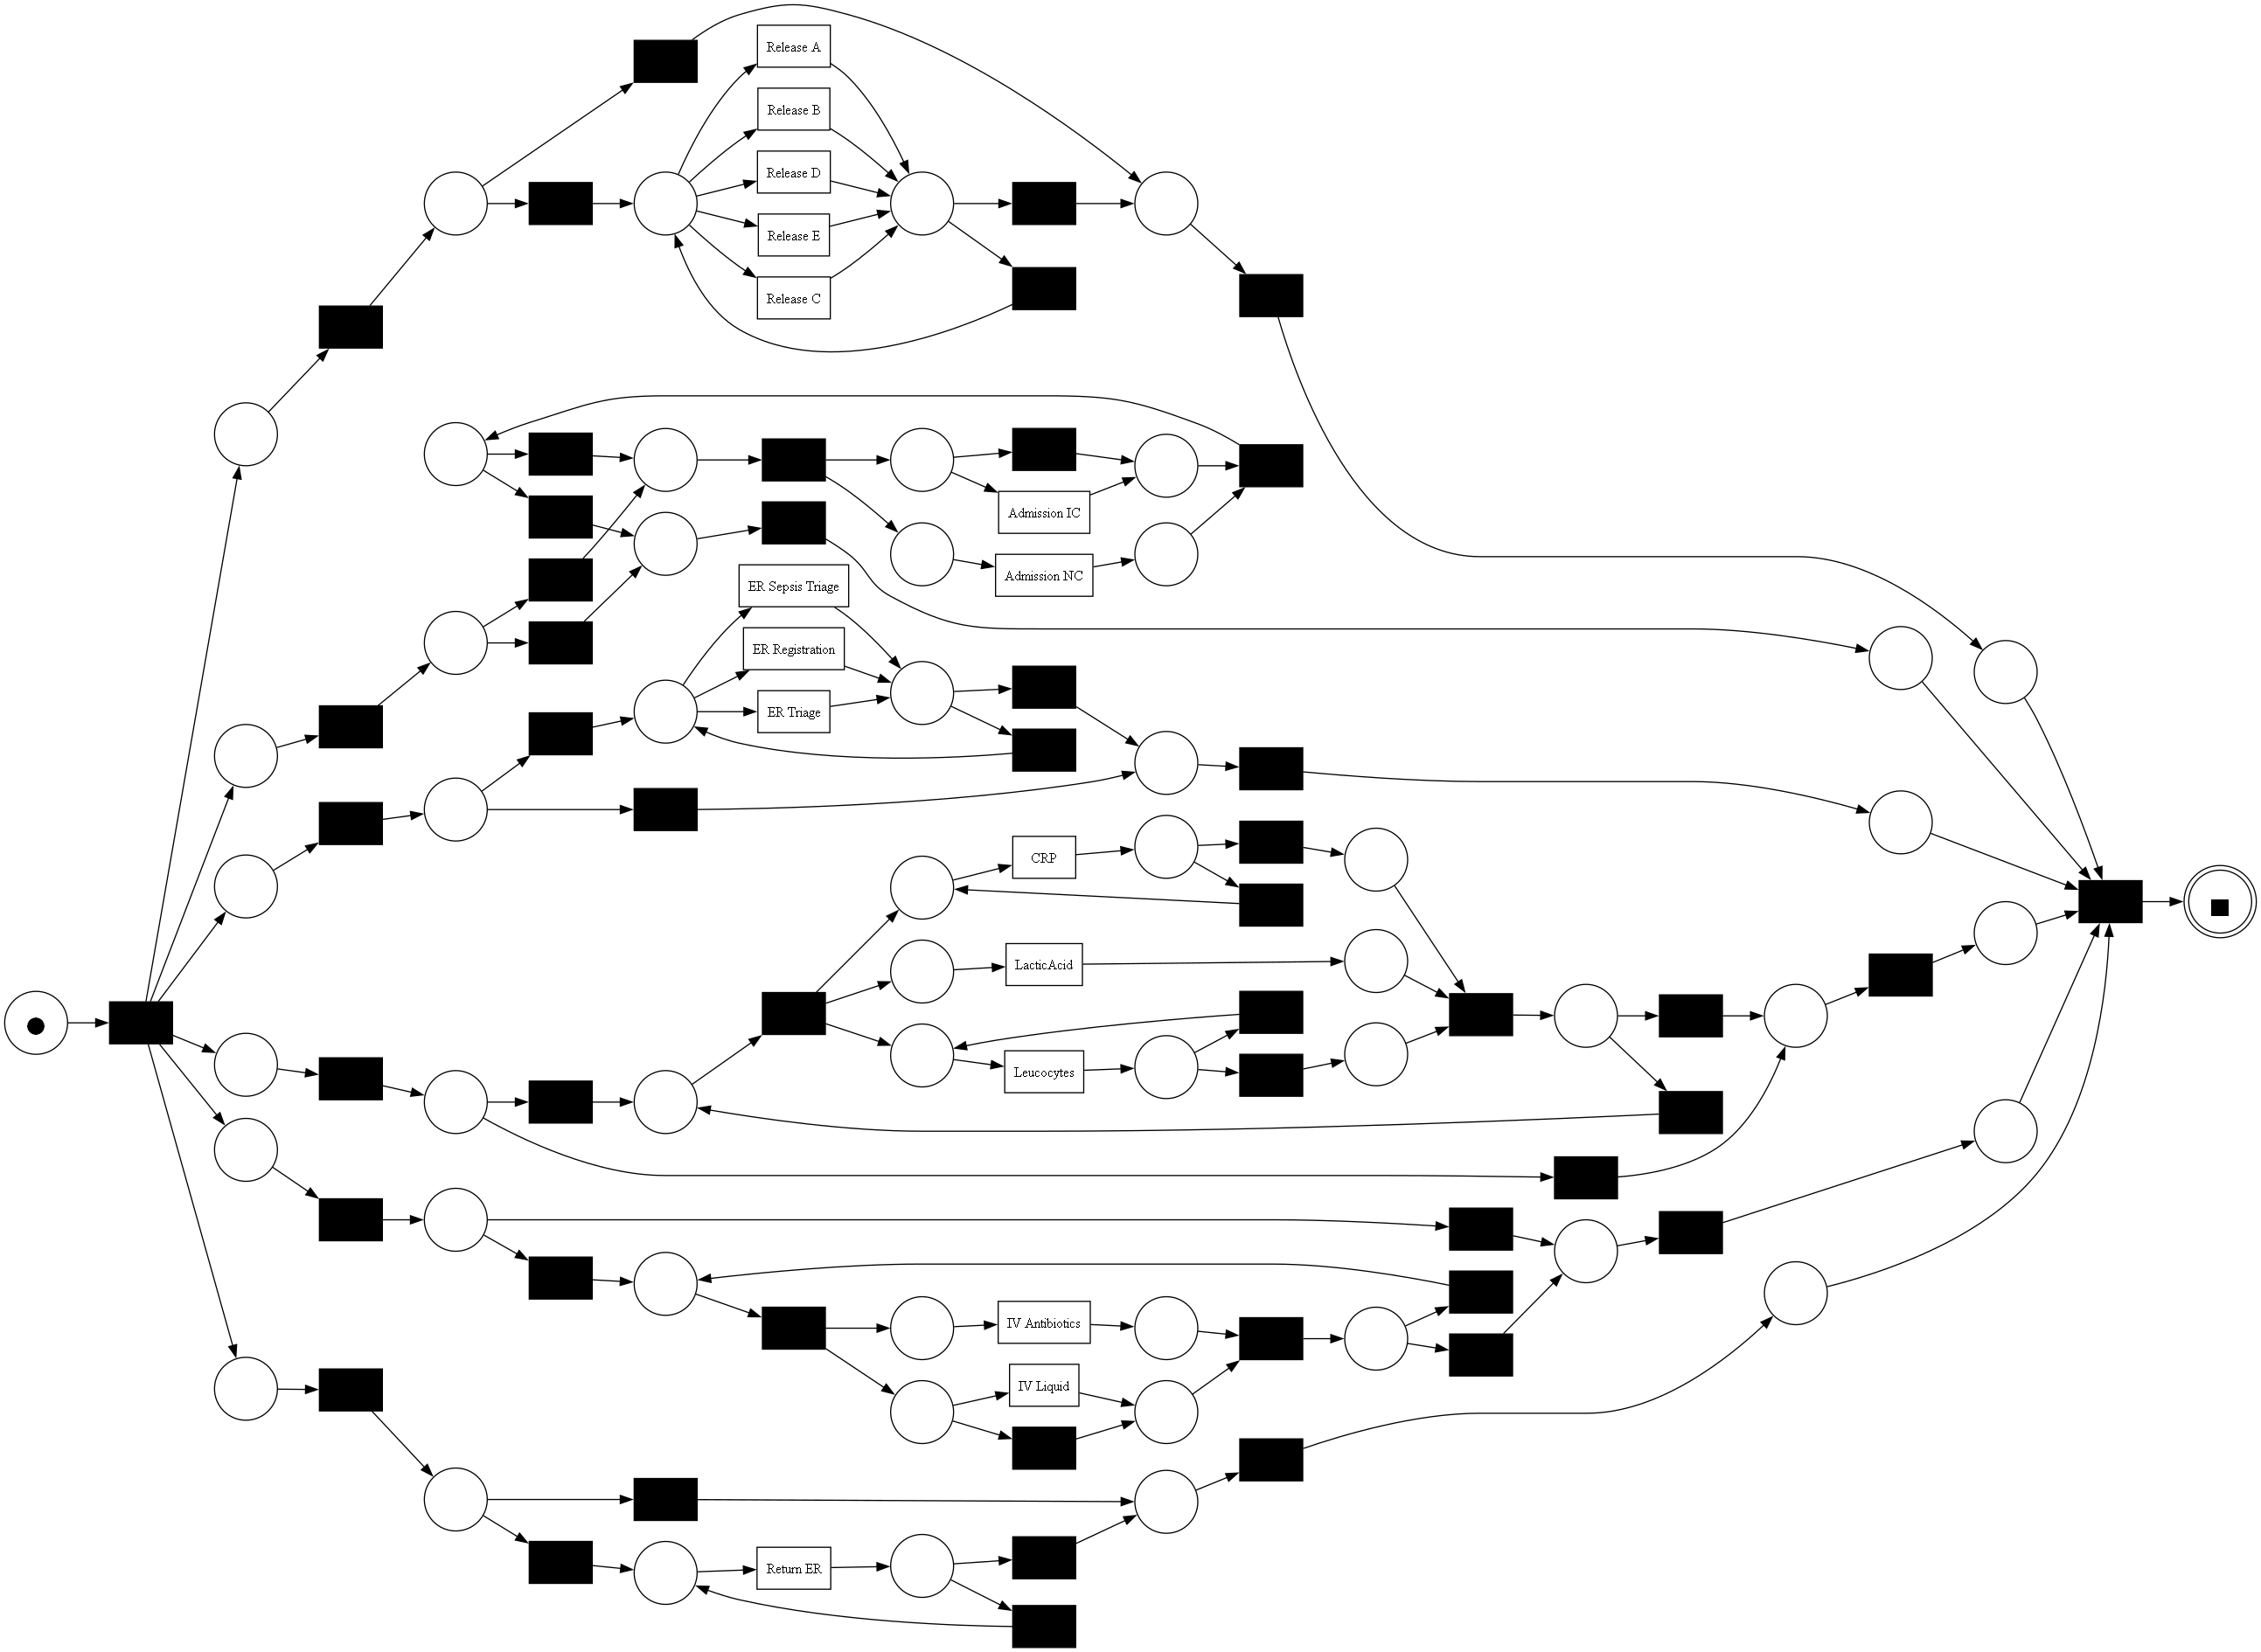

In [76]:
import pm4py
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.objects.petri_net.exporter import exporter as pnml_exporter
from pm4py.objects.petri_net.obj import PetriNet, Marking
# from pm4py.objects.petri.exporter.variants import export_net as pnml

gviz = pn_visualizer.apply(modified_net, initial_marking, final_marking)
pn_visualizer.view(gviz)

# pm4py.view_petri_net(modified_net, initial_marking, final_marking, format='png')

# net, im, fm = pm4py.read_pnml('modified_net_with_markings.pnml')
# is_sound = pm4py.check_soundness(net, im, fm)

# pm4py.objects.petri_net.exporter.variants.pnml.export_net(modified_net, initial_marking, modified_net.pnml, final_marking, export_prom5=False, parameters=None)

# pnml_exporter.apply(modified_net, initial_marking, modified_net.pnml, final_marking=final_marking)

Initial Marking: ['p_73:1']
Final Marking: ['p_74:1']


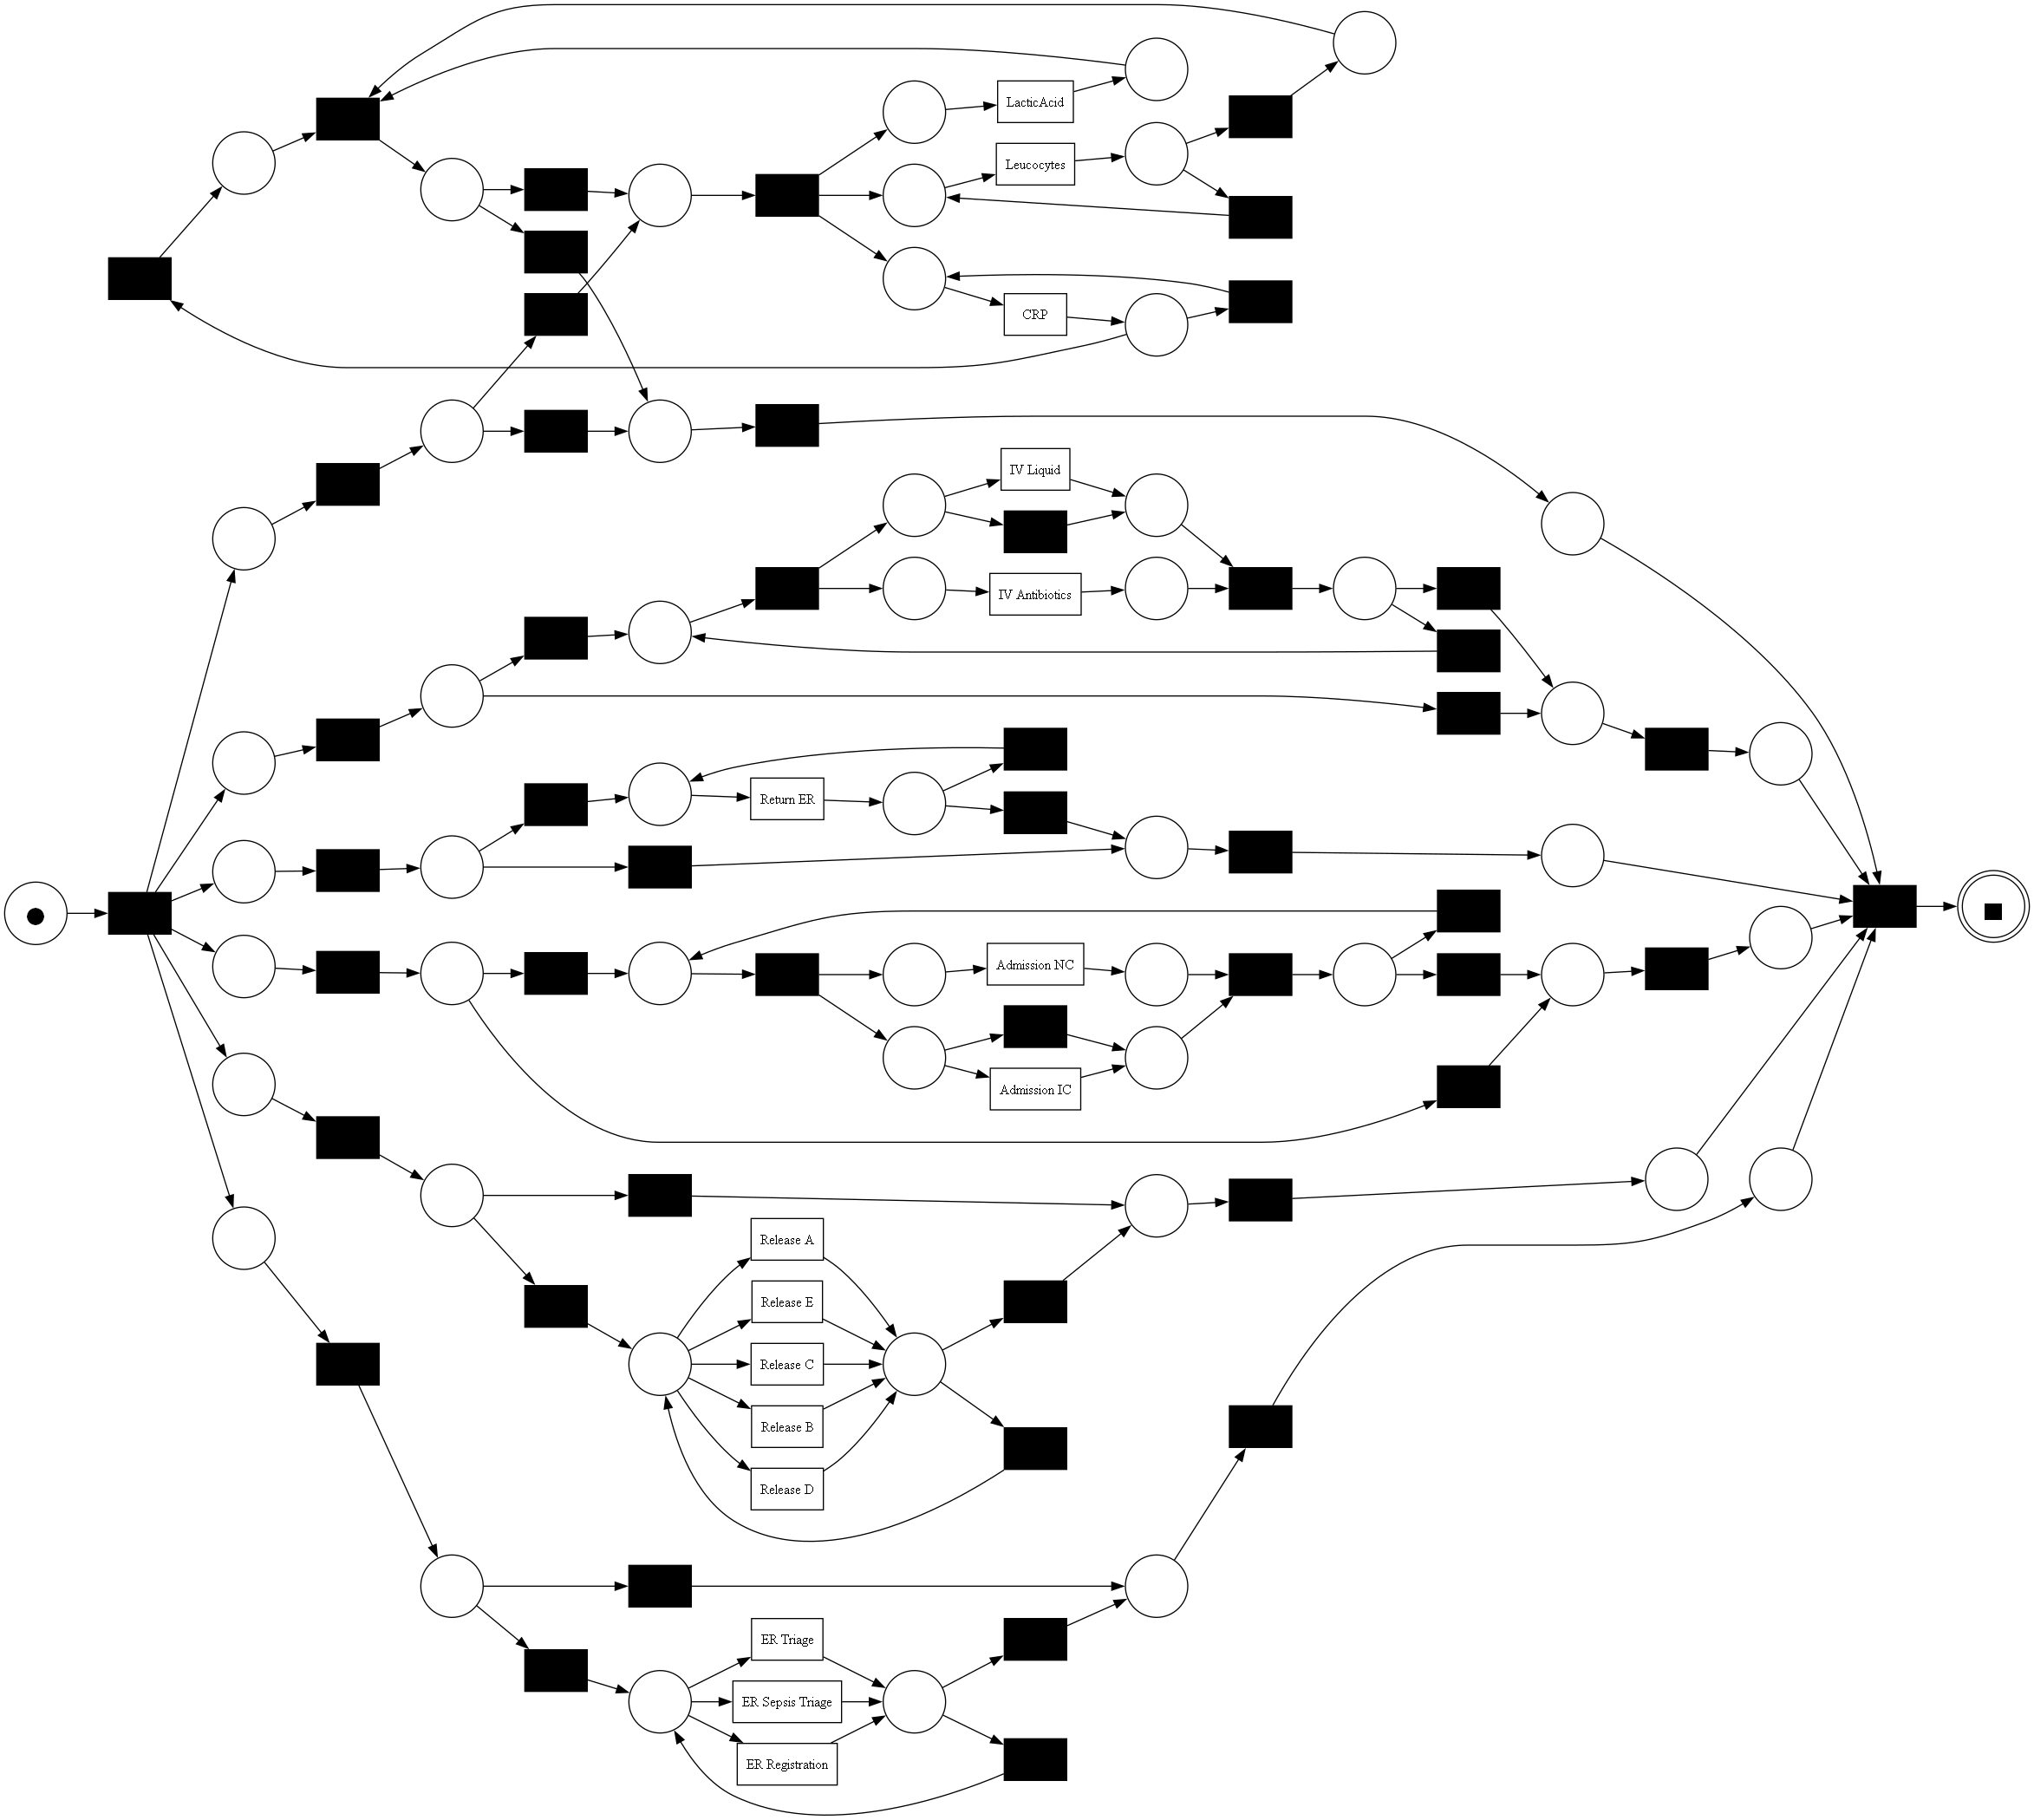

places: [ p_21, p_22, p_23, p_24, p_25, p_26, p_27, p_28, p_29, p_30, p_31, p_32, p_33, p_34, p_35, p_36, p_37, p_38, p_39, p_40, p_41, p_42, p_43, p_44, p_45, p_46, p_47, p_48, p_49, p_50, p_51, p_52, p_53, p_54, p_55, p_56, p_57, p_58, p_59, p_60, p_61, p_62, p_63, p_64, p_65, p_66, p_67, p_68, p_69, p_70, p_71, p_72, p_73, p_74 ]
transitions: [ (176d31d1-5219-4bef-a5ff-80bb7d63b611, 'Admission NC'), (2120234b-a68b-4a88-9122-3c48183c5793, 'Leucocytes'), (67e23538-4d21-4291-a922-d5c13ebe4047, 'Release A'), (7899325c-759e-4f72-bc31-b655ee5b9cfb, 'IV Antibiotics'), (7b565e62-41e4-411e-bce2-02acf38a91f3, 'Admission IC'), (8c11a2b3-19d0-4611-910b-9fd171347acc, 'CRP'), (9025b745-0546-4714-a569-1c7a2601d3fb, 'Release B'), (9f518880-c115-44f7-80d4-44e2a1ff22e6, 'LacticAcid'), (a6255abb-9731-431b-8e37-a23d0d3fa405, 'Release C'), (a8059367-ecbd-48dd-8500-63e7c6d07832, 'IV Liquid'), (aed2edab-be47-4869-8bc5-6571cdc0973b, 'Return ER'), (b73c39a7-34af-44d9-87ad-83ef49f3d02d, 'ER Sepsis Triage'), 

In [77]:
# pnml_exporter.apply(modified_net, initial_marking, "sepsis_net.pnml", final_marking)

# modified_net, initial_marking, final_marking = pm4py.read_pnml("sepsis_net.pnml")

# gviz = pn_visualizer.apply(modified_net, initial_marking, final_marking)
# pn_visualizer.view(gviz)

print("Initial Marking:", initial_marking)
print("Final Marking:", final_marking)

pm4py.write_pnml(modified_net, initial_marking, final_marking,'D:/Harish/Data Science/Final Thesis/Abstraction code/sepsis_net.pnml')

modified_net1, im8, fm8 = pm4py.read_pnml('D:/Harish/Data Science/Final Thesis/Abstraction code/sepsis_net.pnml')

# fm8 = Marking()
# fm8[places['p_74']] = 1

gviz = pn_visualizer.apply(modified_net1, im8, fm8)
pn_visualizer.view(gviz)

print(modified_net1)

In [78]:
# from pm4py.objects.petri_net.obj import PetriNet

# # Assuming 'modified_net1' is your loaded Petri net
# isolated_transitions = []

# # Iterate through transitions in the net
# for transition in modified_net1.transitions:
#     if transition.label is None:  # Check if it's an invisible transition
#         # Get incoming and outgoing arcs
#         incoming_arcs = [arc for arc in modified_net1.arcs if arc.target == transition]
#         outgoing_arcs = [arc for arc in modified_net1.arcs if arc.source == transition]
        
#         # Check if the transition is isolated (no incoming or outgoing arcs)
#         if not incoming_arcs and not outgoing_arcs:
#             isolated_transitions.append(transition)
#         # elif len(incoming_arcs) == 1 and len(outgoing_arcs) == 1:
#         #     incoming_place = incoming_arcs[0].source
#         #     outgoing_place = outgoing_arcs[0].target
#         #     if isinstance(incoming_place, PetriNet.Place) and isinstance(outgoing_place, PetriNet.Place):
#         #         isolated_transitions.append(transition)

# # Output the labels (or names) of isolated invisible transitions
# for transition in isolated_transitions:
#     print(f"Isolated invisible transition: {transition.name} with label: '{transition.label}'")

Petri Net Checks

In [79]:
from pm4py.objects.petri_net.obj import PetriNet, Marking

def verify_marking_places(net, marking):
    net_places = set(net.places)
    for place in marking:
        if place not in net_places:
            return False
    return True

# Check initial and final markings
initial_ok = verify_marking_places(modified_net, initial_marking)
final_ok = verify_marking_places(modified_net, final_marking)

print("Initial marking valid:", initial_ok)
print("Final marking valid:", final_ok)

Initial marking valid: True
Final marking valid: True


In [80]:
from pm4py.objects.petri_net.obj import PetriNet, Marking

def verify_marking_places(net, markings):
    # Create a set of place names from the net's places for quick lookup
    net_place_ids = {place.name for place in net.places}
    
    # Iterate over each marking and check if all places in the marking are in the net
    for marking in markings:
        for place in marking:
            if place.name not in net_place_ids:
                print(f"Place {place.name} in marking is not in the net")
                return False
    return True

all_markings = [initial_marking, final_marking]  # List of all markings to check
all_places_present = verify_marking_places(modified_net, all_markings)

print("All places in markings are present in the net:", all_places_present)


All places in markings are present in the net: True


In [81]:
def check_is_workflow_net(net: PetriNet) -> bool:
    """
    Checks if the input Petri net satisfies the WF-net conditions:
    1. unique source place
    2. unique sink place
    3. every node is on a path from the source to the sink

    Parameters
    ------------------
    net
        PetriNet

    Returns
    ------------------
    True iff the input net is a WF-net.
    """
    from pm4py.algo.analysis.workflow_net import algorithm
    return algorithm.apply(net)

check = check_is_workflow_net(modified_net)
print(check)

True


Keeping for future use

In [82]:
# for place in modified_net.places:
#     print(f"Place: {place.name}")

# # Access transitions
# for transition in modified_net.transitions:
#     print(f"Transition: {transition.name}, {transition.label}")

# # Access arcs
# for arc in modified_net.arcs:
#     print(f"Arc from {arc.source.name} to {arc.target.name}")

# # empty dictionary
# transitions_dict = {}

# # Access transitions
# for transition in modified_net.transitions:
#     # Using transition name as the key. If names are not unique, consider using a unique identifier like an UUID.
#     transitions_dict[transition.name] = {
#         "labels": transition.label if hasattr(transition, 'label') else "No label"  # Some transitions might have labels
#     }

# # Print the dictionary
# for name, details in transitions_dict.items():
#     print(f"Transition: {name}, Labels: {details['labels']}")

# from pprint import pprint

# pprint(vars(modified_net))

In [83]:
# import pm4py
# import os
# from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments
# from pm4py.algo.conformance.alignments.petri_net.utils import log_enrichment
# from pm4py.objects.log.importer.xes import importer as xes_importer


# # log = xes_importer.apply(os.path.join("..", "tests", "input_data", "running-example.xes"))
# filtered_log = pm4py.filter_variants_top_k(dataframe, 1)
# modified_net, im, fm = pm4py.discover_petri_net_inductive(filtered_log)
# aligned_traces = alignments.apply(dataframe, modified_net, im, fm, parameters={"ret_tuple_as_trans_desc": True})
# enriched_log = log_enrichment.apply(dataframe, aligned_traces)
# print(enriched_log)

In [84]:
# from pm4py.algo.analysis.woflan import algorithm as woflan

# # This requires WoFlan in the environment; make sure it's installed or available.
# diagnosis = woflan.apply(modified_net, initial_marking, final_marking)
# print(diagnosis)

In [85]:
# net, im, fm = pm4py.discover_petri_net_inductive(dataframe, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
# tbr_diagnostics = pm4py.conformance_diagnostics_token_based_replay(dataframe, modified_net, initial_marking, final_marking, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')

# print(tbr_diagnostics)

# print(*tbr_diagnostics, sep = "\n")

In [86]:
# from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness
# from pm4py.objects.petri_net.importer import importer as pnml_importer
# from pm4py.objects.log.importer.xes import importer as xes_importer

# # Run the fitness calculation
# fitness_results = replay_fitness.evaluate(filtered_event_df, modified_net1, im8, fm8)

# # Print overall fitness
# print("Overall fitness:", fitness_results['average_trace_fitness'])

# # Print fitness for individual traces if needed
# for trace in fitness_results['per_trace']:
#     print(f"Trace {trace['trace_index']}: Fitness = {trace['trace_fitness']}")

# Optional: filter out traces with low fitness
# low_fitness_traces = [trace for trace in fitness_results['per_trace'] if trace['trace_fitness'] < 0.5]
# print("Low fitness traces:", low_fitness_traces)


In [87]:
# import pm4py

# # net, im, fm = pm4py.discover_petri_net_inductive(dataframe, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
# fitness_tbr = pm4py.fitness_token_based_replay(filtered_df, modified_net1, im8, fm8, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')

In [88]:
# print(fitness_tbr)

# print(*fitness_tbr, sep = "\n")

# len(fitness_tbr)

In [89]:
# from pm4py.algo.conformance.tokenreplay import algorithm as token_replay

# # Apply token replay to evaluate fitness of each trace
# token_replay_results = token_replay.apply(filtered_df, modified_net1, im8, fm8)

# # Collecting only the traces with fitness issues
# unfit_traces = [trace for trace in token_replay_results if trace['trace_fitness'] < 1.0]
# print(f"Number of unfit traces: {len(unfit_traces)}")

In [90]:
# from pm4py.algo.conformance.tokenreplay import algorithm as token_replay

# # Run token-based replay
# token_replay_results = token_replay.apply(filtered_df, modified_net1, im8, fm8)

# # Collecting traces with fitness issues (fitness < 1.0)
# unfit_traces = [(i, trace) for i, trace in enumerate(token_replay_results) if trace.get('trace_fitness', 1.0) < 1.0]
# print(f"Number of unfit traces: {len(unfit_traces)}")

# # Displaying fitness information for unfit traces
# for i, (trace_index, trace) in enumerate(unfit_traces[:36]):  # Display first 5 as a sample
#     print(f"Trace Index: {trace_index + 1}, Fitness: {trace.get('trace_fitness', 'Unknown')}")
#     print(f"Tokens Consumed: {trace.get('consumed_tokens', 'N/A')}, Produced: {trace.get('produced_tokens', 'N/A')}")

In [91]:
# decoyyyyy

Alignment computation       # Keeping commented code for future use

In [92]:
import custom_pm4py as pm4py
from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments
from pm4py.objects.log.importer.xes import importer as xes_importer

# log = xes_importer.apply(os.path.join("..", "tests", "input_data", "running-example.xes"))
# filtered_log = pm4py.filter_variants_top_k(sepsis_log, 1)
# discovered_net, im, fm = pm4py.discover_petri_net_inductive(sepsis_log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
# place_map = {p.name:p for p in discovered_net.places}
# print(discovered_net)


# print(modified_net)
# place_map = {p.name:p for p in modified_net.places}

# print(initial_marking)
# print(initial_marking[place_map['p_58']])

# print(final_marking)
# print(final_marking[place_map['p_59']])


# print(place_map)

# print(pm4py.__version__)

# pm4py.view_petri_net(modified_net, initial_marking, final_marking, format='png')


aligned_traces = alignments.apply(filtered_df, modified_net1, im8, fm8, parameters={"ret_tuple_as_trans_desc": True})

aligning log, completed variants :: 100%|██████████| 636/636 [1:48:54<00:00, 10.28s/it]  


Alignment Diagnostics

In [93]:
# import pm4py

# modified_net, im, fm = pm4py.discover_petri_net_inductive(dataframe, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
# alignments_diagnostics = pm4py.conformance_diagnostics_alignments(dataframe, modified_net, im, fm, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')

Saving the aligned traces

In [94]:
# import pickle 

# # Open a file and use dump() 
# with open('sepsis_withReturnER.pkl', 'wb') as file: 
	
# 	# A new file will be created 
# 	pickle.dump(aligned_traces, file) 

Loading the aligned traces

In [95]:
# import pickle 
  
# # Open the file in binary mode 
# with open('sepsis_withReturnER.pkl', 'rb') as file: 
      
#     # Call load method to deserialze 
#     aligned_traces = pickle.load(file) 
  
#     # print(aligned_traces) 

In [96]:
# len(filtered_event_df)

# dataframe.head(20)

# filtered_event_df.head(20)

Printing the aligned traces

In [96]:
# import pandas as pd

# # print in new line
# # print("printing lists in new line")
 
# print(*aligned_traces, sep = "\n")

# len(aligned_traces)

# df = pd.DataFrame(aligned_traces)
    
# display(df)

# print(aligned_traces[0])

for move in (aligned_traces[0]['alignment']):
    print(move)

(('>>', 'source_transition'), ('>>', None))
(('>>', 'tau_transition03'), ('>>', None))
(('>>', 'tau_transition23'), ('>>', None))
(('>>', 'tau_transition07'), ('>>', None))
(('>>', 'tau_transition15'), ('>>', None))
(('>>', 'skip_02'), ('>>', None))
(('>>', 'tau_transition13'), ('>>', None))
(('>>', 'tau_transition01'), ('>>', None))
(('>>', 'tau_transition11'), ('>>', None))
(('>>', 'skip_06'), ('>>', None))
(('>>', 'tau_transition24'), ('>>', None))
(('>>', 'tau_transition08'), ('>>', None))
(('>>', 'tau_transition19'), ('>>', None))
(('>>', 'tau_transition17'), ('>>', None))
(('>>', 'tau_01'), ('>>', None))
(('>>', 'tau_10'), ('>>', None))
(('>>', 'skip_03'), ('>>', None))
(('>>', 'tau_transition12'), ('>>', None))
(('t_ER Registration_0', '8ef72379-4ed6-4b5a-9ec9-3b9e88868b8d'), ('ER Registration', 'ER Registration'))
(('>>', 'loop_04'), ('>>', None))
(('t_ER Triage_1', 'c7a4d1c4-10f1-42d4-872e-79174ee37ed5'), ('ER Triage', 'ER Triage'))
(('>>', 'loop_04'), ('>>', None))
(('t_ER Se

Enriching the log             #not working keeping it though

In [98]:
# import pm4py
# import os
# from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments
# from pm4py.algo.conformance.alignments.petri_net.utils import log_enrichment
# from pm4py.objects.log.importer.xes import importer as xes_importer

# enriched_log = log_enrichment.apply(event_log, aligned_traces)
# print(enriched_log)
# pm4py.view_alignments(dataframe, aligned_traces1, format='png')

Filtering the traces 

In [99]:
def filter_aligned_traces(aligned_traces):
    filtered_traces = []

    for trace in aligned_traces:
        filtered_trace = []

        for model, log in trace['alignment']:
            model_name, model_id = model
            log_event, log_id = log
            
            # Skip
            if any(prefix in model_id for prefix in ['source_transition','skip','loop','sink_transition']):
                continue

            # Add the event 
            filtered_trace.append((model, log))

        filtered_traces.append({'alignment': filtered_trace})
    
    return filtered_traces

filtered_traces_example = filter_aligned_traces(aligned_traces)

#Print
for i, trace in enumerate(filtered_traces_example):
    print(f"Trace {i+1}: {trace}")

Trace 1: {'alignment': [(('>>', 'tau_transition03'), ('>>', None)), (('>>', 'tau_transition23'), ('>>', None)), (('>>', 'tau_transition07'), ('>>', None)), (('>>', 'tau_transition15'), ('>>', None)), (('>>', 'tau_transition13'), ('>>', None)), (('>>', 'tau_transition01'), ('>>', None)), (('>>', 'tau_transition11'), ('>>', None)), (('>>', 'tau_transition24'), ('>>', None)), (('>>', 'tau_transition08'), ('>>', None)), (('>>', 'tau_transition19'), ('>>', None)), (('>>', 'tau_transition17'), ('>>', None)), (('>>', 'tau_01'), ('>>', None)), (('>>', 'tau_10'), ('>>', None)), (('>>', 'tau_transition12'), ('>>', None)), (('t_ER Registration_0', '8ef72379-4ed6-4b5a-9ec9-3b9e88868b8d'), ('ER Registration', 'ER Registration')), (('t_ER Triage_1', 'c7a4d1c4-10f1-42d4-872e-79174ee37ed5'), ('ER Triage', 'ER Triage')), (('t_ER Sepsis Triage_2', 'e7cd06fe-1298-4db5-bc03-794334902b8f'), ('ER Sepsis Triage', 'ER Sepsis Triage')), (('>>', 'tau_transition14'), ('>>', None)), (('>>', 'tau_transition16'), (

In [100]:
def extract_unique_transitions(aligned_traces):
    unique_transitions = set()
    
    for trace in aligned_traces:
        for model, log in trace['alignment']:
            model_name, model_id = model
            log_event, log_id = log
            
            if (model_id != '>>' and 
                log_event is not None and 
                'skip' not in log_event.lower() and 
                'loop' not in log_event.lower() and 
                not model_id.lower().startswith('silent') and
                not model_id.lower().startswith('tau') and
                not model_name.startswith('>>')):
                
                transition_output = f"{log_event} - {model_id}"
                unique_transitions.add(transition_output)
    
    return unique_transitions

unique_transitions = extract_unique_transitions(filtered_traces_example)
print("Unique Transitions:")
for transition in unique_transitions:
    print(transition)

Unique Transitions:
LacticAcid - a0dce7ab-b962-4077-b487-24cadd52d60e
ER Registration - 8ef72379-4ed6-4b5a-9ec9-3b9e88868b8d
Leucocytes - 03014ac1-c0d9-4767-9537-835f6fa94938
Admission IC - 631220a5-9772-43f2-8916-2c96f2c55fc5
Admission NC - f6837aca-7ed9-4a3f-9b24-40605952ac19
CRP - 29b237c6-83ed-46c5-b5c7-5a2403e741f3
Release D - 08515663-c506-47d0-aa84-972403fa2390
Release C - 5d3b33cd-91a4-450b-9500-b1e3ed9b0164
IV Liquid - ab0fc3c6-a6de-43ae-a052-85f2f14f67ea
ER Sepsis Triage - e7cd06fe-1298-4db5-bc03-794334902b8f
ER Triage - c7a4d1c4-10f1-42d4-872e-79174ee37ed5
Release A - 114f1578-5739-4bc0-a233-055667dbf229
IV Antibiotics - ad04ce71-76d8-4c9a-bb54-9a3f4cf2e907
Release E - 8ac9716f-8c98-4800-a55c-1901969b132c
Release B - 5348ebe8-ff2b-479d-bdd2-abdd82261534
Return ER - a4f4df14-508a-4afc-bedb-98f3a865a3e6


In [101]:
# unique_transitions = extract_unique_transitions(filtered_traces_example)

# # Create a dictionary only for 'release' transitions
# release_transitions = {model_id: log_event for log_event, model_id in 
#                        [transition.split(' - ') for transition in unique_transitions] 
#                        if log_event.lower().startswith('release')}

# print("Release Transitions:")
# for model_id, log_event in release_transitions.items():
#     print(f"{log_event}: {model_id}")

Defining the patterns with their start and end transitions

In [102]:
patterns = {
    "Admission": {
        "activities": ["Admission NC", "Admission IC"],
        "start_transition": "tau_transition05",
        "end_transition": "tau_transition06"
    },
    "ER": {
        "activities": ["ER Registration", "ER Triage", "ER Sepsis Triage"],
        "start_transition": "tau_transition13",
        "end_transition": "tau_transition14"
    },
    "Lab": {
        "activities": ["Leucocytes", "CRP", "LacticAcid"],
        "start_transition": "tau_transition17",
        "end_transition": "tau_transition18"
    },
    "Discharge": {
        "activities": ["Release A", "Release B", "Release C", "Release D", "Release E"],
        "start_transition": "tau_transition09",
        "end_transition": "tau_transition10"
    },
    "IV": {
        "activities": ["IV Liquid", "IV Antibiotics"],
        "start_transition": "tau_transition01",
        "end_transition": "tau_transition02"
    },
    "Return": {
        "activities": ["Return ER"],
        "start_transition": "tau_transition21",
        "end_transition": "tau_transition22"
    }
}

In [103]:
# for move in (filtered_traces_example[50]['alignment']):
#     print(move)

Extracting unique case ids for appending corresponding timestamps

In [104]:
import pandas as pd
import pm4py

# Extract
unique_case_ids = filtered_df['case:concept:name'].unique()

print(unique_case_ids)

# convert them to a list and print
unique_case_ids_list = unique_case_ids.tolist()
print(unique_case_ids_list)

['B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'T'
 'U' 'W' 'X' 'Y' 'Z' 'AA' 'BA' 'CA' 'DA' 'EA' 'FA' 'GA' 'HA' 'IA' 'JA'
 'KA' 'LA' 'MA' 'OA' 'PA' 'QA' 'RA' 'SA' 'TA' 'UA' 'VA' 'WA' 'XA' 'YA'
 'ZA' 'AB' 'BB' 'CB' 'DB' 'EB' 'FB' 'GB' 'HB' 'IB' 'JB' 'KB' 'MB' 'OB'
 'PB' 'QB' 'RB' 'SB' 'TB' 'UB' 'VB' 'WB' 'XB' 'YB' 'ZB' 'AC' 'BC' 'CC'
 'DC' 'EC' 'FC' 'GC' 'HC' 'IC' 'JC' 'KC' 'MC' 'NC' 'PC' 'QC' 'RC' 'SC'
 'VC' 'WC' 'XC' 'YC' 'ZC' 'BD' 'CD' 'DD' 'FD' 'GD' 'ID' 'JD' 'KD' 'LD'
 'MD' 'ND' 'PD' 'QD' 'RD' 'SD' 'TD' 'VD' 'WD' 'XD' 'YD' 'ZD' 'AE' 'BE'
 'CE' 'DE' 'EE' 'FE' 'GE' 'HE' 'IE' 'JE' 'KE' 'LE' 'ME' 'NE' 'OE' 'PE'
 'RE' 'SE' 'TE' 'WE' 'XE' 'YE' 'ZE' 'AF' 'BF' 'DF' 'EF' 'FF' 'HF' 'IF'
 'JF' 'KF' 'LF' 'MF' 'OF' 'PF' 'QF' 'RF' 'SF' 'TF' 'VF' 'XF' 'ZF' 'AG'
 'BG' 'CG' 'DG' 'EG' 'FG' 'HG' 'JG' 'KG' 'MG' 'NG' 'OG' 'PG' 'QG' 'SG'
 'TG' 'UG' 'VG' 'WG' 'XG' 'ZG' 'AH' 'CH' 'DH' 'EH' 'FH' 'GH' 'HH' 'IH'
 'JH' 'KH' 'LH' 'MH' 'NH' 'OH' 'PH' 'RH' 'SH' 'TH' 'UH' 'VH' 'WH' 'YH'
 'ZH

Abstraction logic

In [105]:
import pandas as pd

def abstract_activities_based_on_transitions(aligned_traces, patterns, dataframe):
    abstracted_traces = []

    # Convert 'time:timestamp' to datetime
    dataframe['time:timestamp'] = pd.to_datetime(dataframe['time:timestamp'])

    # Fetch unique case identifiers 
    unique_case_ids = dataframe['case:concept:name'].unique()

    for trace_index, trace in enumerate(aligned_traces):
        abstracted_trace = []
        active_patterns = {}
        pattern_start_end = {pattern_name: (pattern_details["start_transition"], pattern_details["end_transition"]) 
                             for pattern_name, pattern_details in patterns.items()}

        # Get the case identifier for the current trace
        case_id = unique_case_ids[trace_index]  # Dynamically get the case ID
        trace_dataframe = dataframe[dataframe['case:concept:name'] == case_id]

        for model, log in trace['alignment']:
            model_name, model_id = model
            log_event, log_id = log

            # if source_id in ['>>', 'skip', 'loop'] or source_id.startswith('silent_transition'):
            #     continue

            # Check if we should start a new pattern
            for pattern_name, (start_transition, end_transition) in pattern_start_end.items():
                if model_id == start_transition and pattern_name not in active_patterns:
                    active_patterns[pattern_name] = {
                        "start": model_id,
                        "activities": patterns[pattern_name]["activities"].copy(),
                        "timestamps": []
                    }
                    abstracted_trace.append((f"<{pattern_name} + Start>", model_id, None))
                    break

            for pattern_name, details in list(active_patterns.items()):
                if model_id == details["start"]:
                    continue

                if log_id in details["activities"]:
                    event_timestamp = trace_dataframe[trace_dataframe['concept:name'] == log_id]['time:timestamp']
                    if not event_timestamp.empty:
                        details["timestamps"].append(event_timestamp.iloc[0])
                    details["activities"].remove(log_id)

                if model_id == pattern_start_end[pattern_name][1]:
                    if details["timestamps"]:
                        start_time = min(details["timestamps"])
                        end_time = max(details["timestamps"])
                    else:
                        start_time = end_time = None
                    # Update the start activity with the start time
                    for i, (event, trans_id, _) in enumerate(abstracted_trace):
                        if event == f"<{pattern_name} + Start>" and trans_id == details["start"]:
                            abstracted_trace[i] = (event, trans_id, start_time)
                            break
                    # Append the end activity with the end time
                    abstracted_trace.append((f"<{pattern_name} + Complete>", model_id, end_time))
                    del active_patterns[pattern_name]

            # if no pattern is active
            if not active_patterns:
                if log_id is not None:
                    event_timestamp = trace_dataframe[trace_dataframe['concept:name'] == log_id]['time:timestamp']
                    timestamp = event_timestamp.iloc[0] if not event_timestamp.empty else None
                    abstracted_trace.append((log_id, model_id, timestamp))
                else:
                    abstracted_trace.append((None, model_id, None))

        abstracted_traces.append(abstracted_trace)

    return abstracted_traces

abstracted_traces = abstract_activities_based_on_transitions(filtered_traces_example, patterns, filtered_df)

for i, trace in enumerate(abstracted_traces):
    print(f"Trace {i+1}: {trace}")

C:\Users\Harish\AppData\Local\Temp\ipykernel_25728\158399398.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['time:timestamp'] = pd.to_datetime(dataframe['time:timestamp'])


Trace 1: [(None, 'tau_transition03', None), (None, 'tau_transition23', None), (None, 'tau_transition07', None), (None, 'tau_transition15', None), ('<ER + Start>', 'tau_transition13', Timestamp('2014-12-21 11:04:24+0000', tz='UTC')), ('<IV + Start>', 'tau_transition01', Timestamp('2014-12-21 12:33:48+0000', tz='UTC')), ('<Lab + Start>', 'tau_transition17', Timestamp('2014-12-21 11:36:00+0000', tz='UTC')), ('<ER + Complete>', 'tau_transition14', Timestamp('2014-12-21 12:15:45+0000', tz='UTC')), ('<Lab + Complete>', 'tau_transition18', Timestamp('2014-12-21 11:36:00+0000', tz='UTC')), ('<IV + Complete>', 'tau_transition02', Timestamp('2014-12-21 12:33:55+0000', tz='UTC')), (None, 'tau_transition02', None), (None, 'tau_transition04', None)]
Trace 2: [(None, 'tau_transition23', None), (None, 'tau_transition03', None), (None, 'tau_transition07', None), (None, 'tau_transition15', None), (None, 'tau_transition19', None), ('<Return + Start>', 'tau_transition21', None), ('<IV + Start>', 'tau_tra

In [ ]:
import pandas as pd

def abstract_activities_based_on_transitions(aligned_traces, patterns, dataframe):
    abstracted_traces = []

    # Convert 'time:timestamp' to datetime
    dataframe['time:timestamp'] = pd.to_datetime(dataframe['time:timestamp'])

    # Fetch unique case identifiers 
    unique_case_ids = dataframe['case:concept:name'].unique()

    for trace_index, trace in enumerate(aligned_traces):
        abstracted_trace = []
        active_patterns = {}
        pattern_start_end = {pattern_name: (pattern_details["start_transition"], pattern_details["end_transition"]) 
                             for pattern_name, pattern_details in patterns.items()}

        # Get the case identifier for the current trace
        case_id = unique_case_ids[trace_index]  # Dynamically get the case ID
        trace_dataframe = dataframe[dataframe['case:concept:name'] == case_id]

        last_timestamp = None  # To keep track of the last observed timestamp

        for model, log in trace['alignment']:
            model_name, model_id = model
            log_event, log_id = log

            # Check if we should start a new pattern
            for pattern_name, (start_transition, end_transition) in pattern_start_end.items():
                if model_id == start_transition and pattern_name not in active_patterns:
                    active_patterns[pattern_name] = {
                        "start": model_id,
                        "activities": patterns[pattern_name]["activities"].copy(),
                        "timestamps": []
                    }
                    abstracted_trace.append((f"<{pattern_name} + Start>", model_id, last_timestamp))
                    break

            for pattern_name, details in list(active_patterns.items()):
                if model_id == details["start"]:
                    continue

                if log_id in details["activities"]:
                    event_timestamp = trace_dataframe[trace_dataframe['concept:name'] == log_id]['time:timestamp']
                    if not event_timestamp.empty:
                        last_timestamp = event_timestamp.iloc[0]
                        details["timestamps"].append(last_timestamp)
                    details["activities"].remove(log_id)

                if model_id == pattern_start_end[pattern_name][1]:
                    if details["timestamps"]:
                        start_time = min(details["timestamps"])
                        end_time = max(details["timestamps"])
                    else:
                        start_time = end_time = None
                    # Update the start activity with the start time
                    for i, (event, trans_id, _) in enumerate(abstracted_trace):
                        if event == f"<{pattern_name} + Start>" and trans_id == details["start"]:
                            abstracted_trace[i] = (event, trans_id, start_time)
                            break
                    # Append the end activity with the end time
                    abstracted_trace.append((f"<{pattern_name} + Complete>", model_id, end_time))
                    del active_patterns[pattern_name]

            # Handle model moves
            if log_id is None:
                # Append the model move with the last known timestamp
                abstracted_trace.append((None, model_id, last_timestamp))
            else:
                # Append log move
                event_timestamp = trace_dataframe[trace_dataframe['concept:name'] == log_id]['time:timestamp']
                if not event_timestamp.empty:
                    last_timestamp = event_timestamp.iloc[0]
                abstracted_trace.append((log_id, model_id, last_timestamp))

        abstracted_traces.append(abstracted_trace)

    return abstracted_traces

abstracted_traces = abstract_activities_based_on_transitions(filtered_traces_example, patterns, filtered_df)

for i, trace in enumerate(abstracted_traces):
    print(f"Trace {i+1}: {trace}")

C:\Users\Harish\AppData\Local\Temp\ipykernel_25728\2325228041.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['time:timestamp'] = pd.to_datetime(dataframe['time:timestamp'])


In [105]:
for move in (abstracted_traces[0]):
    print(move)

(None, 'tau_transition03', None)
(None, 'tau_transition23', None)
(None, 'tau_transition07', None)
(None, 'tau_transition15', None)
('<ER + Start>', 'tau_transition13', Timestamp('2014-12-21 11:04:24+0000', tz='UTC'))
(None, 'tau_transition13', None)
('<IV + Start>', 'tau_transition01', Timestamp('2014-12-21 12:33:48+0000', tz='UTC'))
(None, 'tau_transition01', None)
(None, 'tau_transition11', None)
(None, 'tau_transition24', None)
(None, 'tau_transition08', None)
(None, 'tau_transition19', None)
('<Lab + Start>', 'tau_transition17', Timestamp('2014-12-21 11:36:00+0000', tz='UTC'))
(None, 'tau_transition17', None)
(None, 'tau_01', None)
(None, 'tau_10', None)
(None, 'tau_transition12', None)
('ER Registration', '8ef72379-4ed6-4b5a-9ec9-3b9e88868b8d', Timestamp('2014-12-21 11:04:24+0000', tz='UTC'))
('ER Triage', 'c7a4d1c4-10f1-42d4-872e-79174ee37ed5', Timestamp('2014-12-21 11:17:19+0000', tz='UTC'))
('ER Sepsis Triage', 'e7cd06fe-1298-4db5-bc03-794334902b8f', Timestamp('2014-12-21 12:1

In [106]:
# import pandas as pd

# def abstract_activities_based_on_transitions(aligned_traces, patterns, dataframe):
#     abstracted_traces = []

#     # Convert 'time:timestamp' to datetime
#     dataframe['time:timestamp'] = pd.to_datetime(dataframe['time:timestamp'])

#     # Fetch unique case identifiers 
#     unique_case_ids = dataframe['case:concept:name'].unique()

#     for trace_index, trace in enumerate(aligned_traces):
#         abstracted_trace = []
#         active_patterns = {}
#         pattern_start_end = {pattern_name: (pattern_details["start_transition"], pattern_details["end_transition"]) 
#                              for pattern_name, pattern_details in patterns.items()}

#         # Get the case identifier for the current trace
#         case_id = unique_case_ids[trace_index]  # Dynamically get the case ID
#         trace_dataframe = dataframe[dataframe['case:concept:name'] == case_id]

#         for model, log in trace['alignment']:
#             model_name, model_id = model
#             log_event, log_id = log

#             # Skip unwanted transitions or events
#             if model_id in ['>>', 'skip', 'loop'] or model_id.startswith('silent_transition'):
#                 continue

#             # Check if we should start a new pattern
#             pattern_matched = False
#             for pattern_name, (start_transition, end_transition) in pattern_start_end.items():
#                 if model_id == start_transition and pattern_name not in active_patterns:
#                     active_patterns[pattern_name] = {
#                         "start": model_id,
#                         "activities": patterns[pattern_name]["activities"].copy(),
#                         "timestamps": []
#                     }
#                     abstracted_trace.append((f"<{pattern_name} + Start>", model_id, None))
#                     pattern_matched = True
#                     break
            
#             if not pattern_matched:
#                     # Handle non-pattern events like "Return ER"
#                 if log_event and not any(model_id == start for start, end in pattern_start_end.values()):
#                     event_timestamp = trace_dataframe[trace_dataframe['concept:name'] == log_event]['time:timestamp']
#                     timestamp = event_timestamp.iloc[0] if not event_timestamp.empty else None
#                     abstracted_trace.append((log_event, model_id, timestamp))

#             for pattern_name, details in list(active_patterns.items()):
#                 if model_id == details["start"]:
#                     continue

#                 if log_event in details["activities"]:
#                     event_timestamp = trace_dataframe[trace_dataframe['concept:name'] == log_event]['time:timestamp']
#                     if not event_timestamp.empty:
#                         details["timestamps"].append(event_timestamp.iloc[0])
#                     details["activities"].remove(log_event)

#                 if model_id == pattern_start_end[pattern_name][1]:
#                     if details["timestamps"]:
#                         start_time = min(details["timestamps"])
#                         end_time = max(details["timestamps"])
#                     else:
#                         start_time = end_time = None
#                     # Update the start activity with the start time
#                     for i, (event, trans_id, _) in enumerate(abstracted_trace):
#                         if event == f"<{pattern_name} + Start>" and trans_id == details["start"]:
#                             abstracted_trace[i] = (event, trans_id, start_time)
#                             break
#                     # Append the end activity with the end time
#                     abstracted_trace.append((f"<{pattern_name} + Complete>", model_id, end_time))
#                     del active_patterns[pattern_name]

#             # If no pattern is active, add the remaining events
#             # if not active_patterns:
#             #     if log_event is not None:
#             #         event_timestamp = trace_dataframe[trace_dataframe['concept:name'] == log_event]['time:timestamp']
#             #         timestamp = event_timestamp.iloc[0] if not event_timestamp.empty else None
#             #         abstracted_trace.append((log_event, model_id, timestamp))
#             #     else:
#             #         abstracted_trace.append((None, model_id, None))

#         abstracted_traces.append(abstracted_trace)

#     return abstracted_traces

# # Example usage
# abstracted_traces = abstract_activities_based_on_transitions(filtered_traces_example, patterns, dataframe)

# for i, trace in enumerate(abstracted_traces):
#     print(f"Trace {i+1}: {trace}")

In [107]:
# def remove_tau_transitions(abstracted_traces): #Without timestaps
#     clean_traces = []

#     for trace in abstracted_traces:
#         clean_trace = [(event, trans_id) for event, trans_id in trace if not event.startswith('>>')]
#         clean_traces.append(clean_trace)

#     return clean_traces

# clean_traces = remove_tau_transitions(abstracted_traces)

# for i, trace in enumerate(clean_traces):
#     print(f"Trace {i+1}: {trace}")

In [108]:
# def remove_tau_transitions(abstracted_traces): #With timestamps without sorting
#     clean_traces = []

#     for trace in abstracted_traces:
#         clean_trace = [(event, trans_id, timestamp) for event, trans_id, timestamp in trace if event is not None]
#         clean_traces.append(clean_trace)

#     return clean_traces

# # Example usage
# clean_traces = remove_tau_transitions(abstracted_traces)

# for i, trace in enumerate(clean_traces):
#     print(f"Trace {i+1}: {trace}")

Removing tau transitions from traces

In [109]:
def remove_tau_transitions(abstracted_traces): #With timestamps without sorting
    clean_traces = []

    for trace in abstracted_traces:
        clean_trace = [(event, trans_id, timestamp) for event, trans_id, timestamp in trace if event is not None and event != '>>']
        clean_traces.append(clean_trace)

    return clean_traces

# Example usage
clean_traces = remove_tau_transitions(abstracted_traces)

for i, trace in enumerate(clean_traces):
    print(f"Trace {i+1}: {trace}")

Trace 1: [('<ER + Start>', 'tau_transition13', Timestamp('2014-12-21 11:04:24+0000', tz='UTC')), ('<IV + Start>', 'tau_transition01', Timestamp('2014-12-21 12:33:48+0000', tz='UTC')), ('<Lab + Start>', 'tau_transition17', Timestamp('2014-12-21 11:36:00+0000', tz='UTC')), ('ER Registration', '8ef72379-4ed6-4b5a-9ec9-3b9e88868b8d', Timestamp('2014-12-21 11:04:24+0000', tz='UTC')), ('ER Triage', 'c7a4d1c4-10f1-42d4-872e-79174ee37ed5', Timestamp('2014-12-21 11:17:19+0000', tz='UTC')), ('ER Sepsis Triage', 'e7cd06fe-1298-4db5-bc03-794334902b8f', Timestamp('2014-12-21 12:15:45+0000', tz='UTC')), ('<ER + Complete>', 'tau_transition14', Timestamp('2014-12-21 12:15:45+0000', tz='UTC')), ('Leucocytes', '03014ac1-c0d9-4767-9537-835f6fa94938', Timestamp('2014-12-21 11:36:00+0000', tz='UTC')), ('LacticAcid', 'a0dce7ab-b962-4077-b487-24cadd52d60e', Timestamp('2014-12-21 11:36:00+0000', tz='UTC')), ('CRP', '29b237c6-83ed-46c5-b5c7-5a2403e741f3', Timestamp('2014-12-21 11:36:00+0000', tz='UTC')), ('<La

In [110]:
# def sort_by_timestamp(trace):  #Sorting in a differnt way #Keep it

#     return sorted(trace, key=lambda x: (x[2] is None, x[2]))

# sorted_clean_traces = [sort_by_timestamp(trace) for trace in clean_traces]

# for i, trace in enumerate(sorted_clean_traces):
#     print(f"Trace {i+1}: {trace}")

Sorting traces according to timestamps

In [111]:
def sort_clean_traces_by_timestamp(clean_traces):
    sorted_clean_traces = []

    for trace in clean_traces:
        trace.sort(key=lambda x: (x[2] is None, x[2]))  # Sort by timestamp, None values last
        sorted_clean_traces.append(trace)
    
    return sorted_clean_traces

sorted_clean_traces = sort_clean_traces_by_timestamp(clean_traces)

for i, trace in enumerate(sorted_clean_traces):
    print(f"Trace {i+1}: {trace}")

Trace 1: [('<ER + Start>', 'tau_transition13', Timestamp('2014-12-21 11:04:24+0000', tz='UTC')), ('ER Registration', '8ef72379-4ed6-4b5a-9ec9-3b9e88868b8d', Timestamp('2014-12-21 11:04:24+0000', tz='UTC')), ('ER Triage', 'c7a4d1c4-10f1-42d4-872e-79174ee37ed5', Timestamp('2014-12-21 11:17:19+0000', tz='UTC')), ('<Lab + Start>', 'tau_transition17', Timestamp('2014-12-21 11:36:00+0000', tz='UTC')), ('Leucocytes', '03014ac1-c0d9-4767-9537-835f6fa94938', Timestamp('2014-12-21 11:36:00+0000', tz='UTC')), ('LacticAcid', 'a0dce7ab-b962-4077-b487-24cadd52d60e', Timestamp('2014-12-21 11:36:00+0000', tz='UTC')), ('CRP', '29b237c6-83ed-46c5-b5c7-5a2403e741f3', Timestamp('2014-12-21 11:36:00+0000', tz='UTC')), ('<Lab + Complete>', 'tau_transition18', Timestamp('2014-12-21 11:36:00+0000', tz='UTC')), ('ER Sepsis Triage', 'e7cd06fe-1298-4db5-bc03-794334902b8f', Timestamp('2014-12-21 12:15:45+0000', tz='UTC')), ('<ER + Complete>', 'tau_transition14', Timestamp('2014-12-21 12:15:45+0000', tz='UTC')), (

In [112]:
for move in (sorted_clean_traces[0]):
    print(move)

('<ER + Start>', 'tau_transition13', Timestamp('2014-12-21 11:04:24+0000', tz='UTC'))
('ER Registration', '8ef72379-4ed6-4b5a-9ec9-3b9e88868b8d', Timestamp('2014-12-21 11:04:24+0000', tz='UTC'))
('ER Triage', 'c7a4d1c4-10f1-42d4-872e-79174ee37ed5', Timestamp('2014-12-21 11:17:19+0000', tz='UTC'))
('<Lab + Start>', 'tau_transition17', Timestamp('2014-12-21 11:36:00+0000', tz='UTC'))
('Leucocytes', '03014ac1-c0d9-4767-9537-835f6fa94938', Timestamp('2014-12-21 11:36:00+0000', tz='UTC'))
('LacticAcid', 'a0dce7ab-b962-4077-b487-24cadd52d60e', Timestamp('2014-12-21 11:36:00+0000', tz='UTC'))
('CRP', '29b237c6-83ed-46c5-b5c7-5a2403e741f3', Timestamp('2014-12-21 11:36:00+0000', tz='UTC'))
('<Lab + Complete>', 'tau_transition18', Timestamp('2014-12-21 11:36:00+0000', tz='UTC'))
('ER Sepsis Triage', 'e7cd06fe-1298-4db5-bc03-794334902b8f', Timestamp('2014-12-21 12:15:45+0000', tz='UTC'))
('<ER + Complete>', 'tau_transition14', Timestamp('2014-12-21 12:15:45+0000', tz='UTC'))
('<IV + Start>', 'tau

Abstracting to High Level Activity(Anonymization)

In [113]:
# def abstract_pattern_names(sorted_clean_traces):                #With lifecycle transition and timestamp
#     abstracted_names_traces = []

#     for trace in sorted_clean_traces:
#         abstracted_names_trace = []
#         active_patterns = set()

#         for event, trans_id, timestamp in trace:
#             if event.endswith(' + Start>'):
#                 pattern_name = event.split(' + Start>')[0]
#                 abstracted_names_trace.append((pattern_name.lstrip('<'), "Start", timestamp))
#                 active_patterns.add(f"{pattern_name}>")
#             elif event.endswith(' + Complete>'):
#                 pattern_name = event.split(' + Complete>')[0]
#                 if f"{pattern_name}>" in active_patterns:
#                     abstracted_names_trace.append((pattern_name.lstrip('<'), "Complete", timestamp))
#                     active_patterns.remove(f"{pattern_name}>")
#             else:
#                 abstracted_names_trace.append((event.lstrip('<'), "Other", timestamp))

#         abstracted_names_traces.append(abstracted_names_trace)

#     return abstracted_names_traces

# abstracted_names_traces = abstract_pattern_names(sorted_clean_traces)

# for i, trace in enumerate(abstracted_names_traces):
#     print(f"Trace {i+1}: {trace}")

In [114]:
def abstract_pattern_names(sorted_clean_traces):                        #Without lifecycle transition and with timestamps
    abstracted_names_traces = []

    for trace in sorted_clean_traces:
        abstracted_names_trace = []
        active_patterns = {}

        for event, trans_id, timestamp in trace:
            if event.endswith(' + Start>'):
                pattern_name = event.split(' + Start>')[0]
                active_patterns[pattern_name] = timestamp 
            elif event.endswith(' + Complete>'):
                pattern_name = event.split(' + Complete>')[0]
                if pattern_name in active_patterns:
                    # Append the minimum timestamp
                    abstracted_names_trace.append((pattern_name.lstrip('<'), active_patterns[pattern_name]))
                    del active_patterns[pattern_name]

        # Sort the patterns 
        abstracted_names_trace.sort(key=lambda x: (x[1] is None, x[1]))

        abstracted_names_traces.append(abstracted_names_trace)

    return abstracted_names_traces

abstracted_names_traces = abstract_pattern_names(sorted_clean_traces)

for i, trace in enumerate(abstracted_names_traces):
    print(f"Trace {i+1}: {trace}")

Trace 1: [('ER', Timestamp('2014-12-21 11:04:24+0000', tz='UTC')), ('Lab', Timestamp('2014-12-21 11:36:00+0000', tz='UTC')), ('IV', Timestamp('2014-12-21 12:33:48+0000', tz='UTC'))]
Trace 2: [('ER', Timestamp('2014-02-09 19:29:29+0000', tz='UTC')), ('Lab', Timestamp('2014-02-09 20:06:00+0000', tz='UTC')), ('IV', Timestamp('2014-02-09 20:07:12+0000', tz='UTC')), ('Admission', Timestamp('2014-02-09 22:53:46+0000', tz='UTC')), ('Discharge', Timestamp('2014-02-15 10:00:00+0000', tz='UTC')), ('Return', None)]
Trace 3: [('ER', Timestamp('2014-07-10 11:52:00+0000', tz='UTC')), ('Lab', Timestamp('2014-07-10 12:50:00+0000', tz='UTC')), ('IV', Timestamp('2014-07-10 12:56:57+0000', tz='UTC'))]
Trace 4: [('ER', Timestamp('2015-01-15 20:14:58+0000', tz='UTC')), ('IV', Timestamp('2015-01-15 20:30:32+0000', tz='UTC')), ('Lab', Timestamp('2015-01-15 20:31:00+0000', tz='UTC')), ('Admission', None), ('Discharge', None)]
Trace 5: [('ER', Timestamp('2014-05-07 18:56:57+0000', tz='UTC')), ('Lab', Timestamp

In [115]:
for move in (abstracted_names_traces[0]):
    print(move)

('ER', Timestamp('2014-12-21 11:04:24+0000', tz='UTC'))
('Lab', Timestamp('2014-12-21 11:36:00+0000', tz='UTC'))
('IV', Timestamp('2014-12-21 12:33:48+0000', tz='UTC'))


Convert Anonymized traces to Anonymized log 

In [116]:
# import pandas as pd

# pd.options.mode.chained_assignment = None       # removes slicing df error

# # abstracted traces to a DataFrame
# data = []
# for trace_index, trace in enumerate(abstracted_names_traces):
#     case_id_key = f"Case_{trace_index + 1}"
#     for event, trans_id, timestamp in trace:
#         data.append({
#             "case:concept:name": case_id_key,
#             "concept:name": event,
#             # "lifecycle:transition": trans_id,
#             "time:timestamp": pd.to_datetime(timestamp)
#         })

# abstracted_df = pd.DataFrame(data)

# #  no missing values
# # abstracted_df.dropna(subset=["case:concept:name", "concept:name", "time:timestamp"], inplace=True)

# # DataFrame is formatted correctly
# abstracted_df = pm4py.utils.format_dataframe(abstracted_df)

# # Ensure columns are of the correct type
# # abstracted_df["case:concept:name"] = abstracted_df["case:concept:name"].astype("string")
# # abstracted_df["concept:name"] = abstracted_df["concept:name"].astype("string")
# # abstracted_df["transition"] = abstracted_df["transition"].astype("string")

# abstracted_log = pm4py.convert.convert_to_event_log(abstracted_df)

# for trace in abstracted_log:
#     print(f"Trace {trace.attributes['concept:name']}:")
#     for event in trace:
#         # print(f"\t{event['concept:name']} - {event['lifecycle:transition']} at {event['time:timestamp']}")
#         print(f"\t{event['concept:name']} at {event['time:timestamp']}")

In [117]:
# import pandas as pd

# pd.options.mode.chained_assignment = None       # removes slicing df error

# data = []
# for trace_index, trace in enumerate(abstracted_names_traces):
#     case_id_key = f"Case_{trace_index + 1:03d}"  # Adding leading zeros for numeric sorting
#     for event, timestamp in trace:
#         # Keep 'None' as it is for timestamps
#         if timestamp is None:
#             event_timestamp = None
#         else:
#             event_timestamp = pd.to_datetime(timestamp)
#         data.append({
#             "case:concept:name": case_id_key,
#             "concept:name": event,
#             "time:timestamp": pd.to_datetime(timestamp)
#         })

# abstracted_df = pd.DataFrame(data)
# abstracted_df = pm4py.utils.format_dataframe(abstracted_df)
# abstracted_log = pm4py.convert.convert_to_event_log(abstracted_df)

# for trace in abstracted_log:
#     print(f"Trace {trace.attributes['concept:name']}:")
#     for event in trace:
#         # Handle None timestamps in the print output
#         if event['time:timestamp'] is None:
#             print(f"\t{event['concept:name']} at None")
#         else:
#             print(f"\t{event['concept:name']} at {event['time:timestamp']}")

In [118]:
# import pandas as pd

# pd.options.mode.chained_assignment = None  # removes slicing df error

# data = []
# for trace_index, trace in enumerate(abstracted_names_traces):
#     case_id_key = f"Case_{trace_index + 1:03d}"  # Adding leading zeros for numeric sorting
#     for event, timestamp in trace:
#         # Append the event even if the timestamp is None
#         data.append({
#             "case:concept:name": case_id_key,
#             "concept:name": event,
#             "time:timestamp": pd.to_datetime(timestamp) if timestamp is not None else None
#         })

# # Create the DataFrame from the collected data
# abstracted_df = pd.DataFrame(data)

# # Directly print the DataFrame, including None timestamps
# for case_id, group in abstracted_df.groupby("case:concept:name"):
#     print(f"Trace {case_id}:")
#     for _, row in group.iterrows():
#         if pd.isnull(row["time:timestamp"]):
#             print(f"\t{row['concept:name']} at None")
#         else:
#             print(f"\t{row['concept:name']} at {row['time:timestamp']}")

In [119]:
import pandas as pd

pd.options.mode.chained_assignment = None  # removes slicing df error

# Assuming `filtered_df` contains the original case:concept:name values
filtered_case_ids = filtered_df['case:concept:name'].unique()

# Avoid re-generating case IDs and use the original ones from the filtered_df
data = []
for trace_index, trace in enumerate(abstracted_names_traces):
    case_id_key = filtered_case_ids[trace_index]  # Match case IDs with the original filtered_df
    for event, timestamp in trace:
        # Append the event even if the timestamp is None
        data.append({
            "case:concept:name": case_id_key,
            "concept:name": event,
            "time:timestamp": pd.to_datetime(timestamp) if timestamp is not None else None
        })

# Create the DataFrame from the collected data
abstracted_df = pd.DataFrame(data)

# Directly print the DataFrame, including None timestamps
for case_id, group in abstracted_df.groupby("case:concept:name"):
    print(f"Trace {case_id}:")
    for _, row in group.iterrows():
        if pd.isnull(row["time:timestamp"]):
            print(f"\t{row['concept:name']} at None")
        else:
            print(f"\t{row['concept:name']} at {row['time:timestamp']}")

Trace AA:
	ER at 2014-12-03 09:06:44+00:00
	Lab at 2014-12-03 09:32:00+00:00
	Admission at None
	Discharge at None
Trace AAA:
	ER at 2014-11-19 03:16:21+00:00
	Lab at 2014-11-19 03:43:00+00:00
	IV at 2014-11-19 05:43:37+00:00
	Admission at 2014-11-19 05:44:29+00:00
	Discharge at 2014-11-22 11:30:00+00:00
Trace AB:
	ER at 2014-02-16 09:55:43+00:00
	Lab at 2014-02-16 10:03:00+00:00
	IV at 2014-02-16 13:52:02+00:00
	Admission at None
	Discharge at None
	Return at None
Trace ABA:
	ER at 2014-10-12 11:22:24+00:00
	IV at 2014-10-12 11:43:51+00:00
	Lab at 2014-10-12 12:10:00+00:00
	Admission at 2014-10-12 15:19:40+00:00
	Discharge at 2014-10-18 16:15:00+00:00
Trace AC:
	ER at 2014-09-24 15:39:13+00:00
	Lab at 2014-09-24 16:04:00+00:00
	IV at 2014-09-24 17:20:09+00:00
	Admission at 2014-09-24 20:22:34+00:00
	Discharge at 2014-09-30 11:30:00+00:00
Trace ACA:
	ER at 2014-09-22 10:00:00+00:00
	Lab at 2014-09-22 10:15:00+00:00
	IV at 2014-09-22 10:15:14+00:00
	Admission at None
	Discharge at None


In [120]:
# import pandas as pd
# import pm4py

# abstracted_df['time:timestamp'] = abstracted_df['time:timestamp'].apply(lambda x: None if pd.isna(x) else x)


abstracted_log = pm4py.convert.convert_to_event_log(abstracted_df)
# print(abstracted_log)


pm4py.write_xes(abstracted_log, 'D:/Harish/Data Science/Final Thesis/Code/abstracted_sepsisnew1.xes')
path = "/Harish/Data Science/Final Thesis/Code/abstracted_sepsisnew1.xes"
abstracted_sepsislog = pm4py.read_xes(path)
# print(abstracted_sepsislog)

parsing log, completed traces :: 100%|██████████| 840/840 [00:00<00:00, 4705.24it/s]


In [121]:
abstracted_df.head(20)

case:concept:name concept:name            time:timestamp
0                  B           ER 2014-12-21 11:04:24+00:00
1                  B          Lab 2014-12-21 11:36:00+00:00
2                  B           IV 2014-12-21 12:33:48+00:00
3                  C           ER 2014-02-09 19:29:29+00:00
4                  C          Lab 2014-02-09 20:06:00+00:00
5                  C           IV 2014-02-09 20:07:12+00:00
6                  C    Admission 2014-02-09 22:53:46+00:00
7                  C    Discharge 2014-02-15 10:00:00+00:00
8                  C       Return                       NaT
9                  D           ER 2014-07-10 11:52:00+00:00
10                 D          Lab 2014-07-10 12:50:00+00:00
11                 D           IV 2014-07-10 12:56:57+00:00
12                 E           ER 2015-01-15 20:14:58+00:00
13                 E           IV 2015-01-15 20:30:32+00:00
14                 E          Lab 2015-01-15 20:31:00+00:00
15                 E    Admission                       NaT
16                 E    Discharge                       NaT
17                 F           ER 2014-05-07 18:56:57+00:00
18                 F          Lab 2014-05-07 19:11:00+00:00
19                 F           IV 2014-05-07 22:01:28+00:00

In [122]:
len(pm4py.get_variants_as_tuples(abstracted_log))

39

In [123]:
unique_cases3 = abstracted_df['case:concept:name'].unique()

len(unique_cases3)

840

In [124]:
# len(abstracted_df)

In [1]:
import pandas as pd

# Extract function the trace (sequence of events) for each case
def extract_trace(case_df):
    return tuple(case_df['concept:name'])

# Group the dataframe by 'case:concept:name' and extract trace for each case
case_traces_df1 = abstracted_df.groupby('case:concept:name', group_keys=False).apply(extract_trace).reset_index(name='trace')

# Group by the 'trace' to count how many cases have the same trace
trace_grouped_df1 = case_traces_df1.groupby('trace').size().reset_index(name='count')

# Filter for k cases
k = 40
filtered_trace_grouped_df1 = trace_grouped_df1[trace_grouped_df1['count'] >= k]
print(filtered_trace_grouped_df1)

# Get the traces for k occurrences
valid_traces1 = filtered_trace_grouped_df1['trace'].tolist()

# Filter the original df to keep with valid traces
valid_case_traces_df1 = case_traces_df1[case_traces_df1['trace'].isin(valid_traces1)]

# Filter the original df to keep only the cases that correspond to valid traces
filtered_event_df1 = abstracted_df[abstracted_df['case:concept:name'].isin(valid_case_traces_df1['case:concept:name'])]

# len(filtered_event_df1)


NameError: name 'abstracted_df' is not defined

In [191]:
# Group the dataframe by 'case:concept:name' and extract trace for each case
case_traces_df3 = filtered_event_df1.groupby('case:concept:name', group_keys=False).apply(extract_trace).reset_index(name='trace')

trace_grouped_df1 = case_traces_df3.groupby('trace').size().reset_index(name='case_count')

# Step 3: Calculate the frequency of each "number of cases per trace variant"
# i.e., how many trace variants have each specific count of cases
trace_variant_count_frequency1 = trace_grouped_df1['case_count'].value_counts().reset_index()
trace_variant_count_frequency1.columns = ['number_of_cases_per_variant', 'frequency']

# Display the frequency of the number of cases per trace variant
print(trace_variant_count_frequency1)

   number_of_cases_per_variant  frequency
0                           37          1
1                           73          1
2                           36          1
3                           84          1
4                           54          1
5                           92          1
6                          182          1
7                          107          1


C:\Users\Harish\AppData\Local\Temp\ipykernel_62296\3978980705.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  case_traces_df3 = filtered_event_df1.groupby('case:concept:name', group_keys=False).apply(extract_trace).reset_index(name='trace')


In [185]:
unique_case_ids = filtered_event_df1['case:concept:name'].unique()

# print(unique_case_ids)

In [128]:
# import matplotlib.pyplot as plt

# # Function to plot the number of cases per variant
# def plot_cases_per_variant(dataframe, k_value):
#     # Extract the x and y values from the dataframe
#     number_of_cases_per_variant = dataframe['number_of_cases_per_variant']
#     frequency = dataframe['frequency']
    
#     # Plotting
#     plt.figure(figsize=(10, 6))
#     plt.bar(number_of_cases_per_variant, frequency, color='skyblue', edgecolor='black')
#     plt.xlabel('Number of Cases per Variant')
#     plt.ylabel('Frequency')
#     plt.title(f'Distribution of Cases per Variant for k={k_value}')
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
    
#     # Display plot
#     plt.show()

# plot_cases_per_variant(trace_variant_count_frequency1, k_value=3)

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Example k-value (replace with your actual k-value)
# k_value = 30  # Change this dynamically for each k-value

# # Create bins
# bins = [0, 10, 25, 50, 100, 200] 

# # Apply binning to the 'number_of_cases_per_variant'
# trace_grouped_df1['binned_cases'] = pd.cut(trace_grouped_df1['case_count'], bins=bins, right=False)

# # Calculate the frequency of each bin
# binned_counts = trace_grouped_df1['binned_cases'].value_counts().sort_index()

# # Plot the binned distribution
# plt.figure(figsize=(10, 6))
# binned_counts.plot(kind='bar', edgecolor='black')
# plt.xlabel('Number of Cases per Variant (Binned)')
# plt.ylabel('Frequency of Trace Variants')
# plt.title(f'Distribution of Cases per Trace Variant (Binned) for k={k_value}')  # Add k-value to the title
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

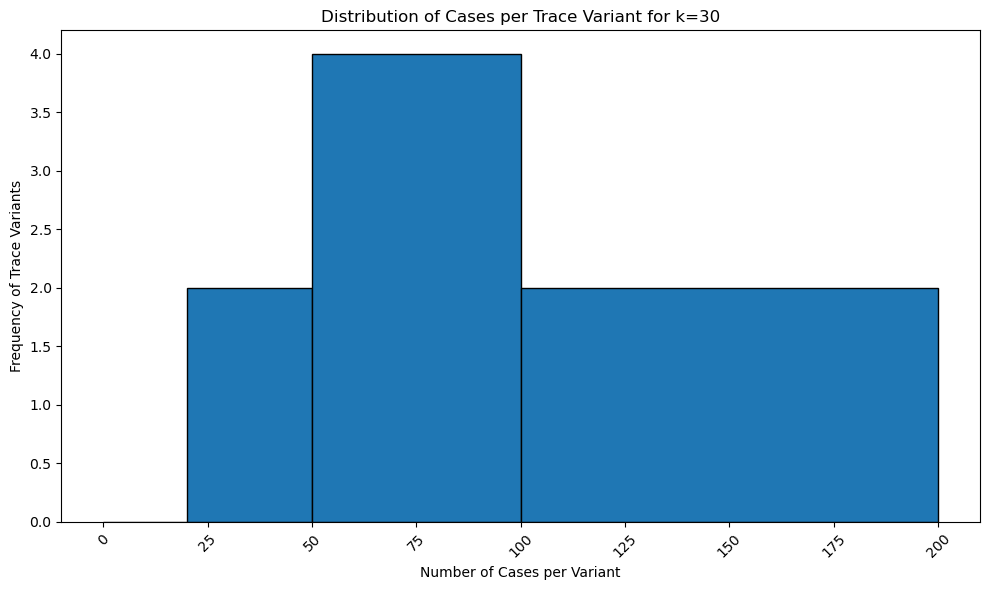

In [192]:
import pandas as pd
import matplotlib.pyplot as plt

# Example k-value (replace with your actual k-value)
k_value = 30  # Change this dynamically for each k-value

# Define the bins for the histogram
bins = [0, 10, 20, 50, 100, 200]

# Plot the histogram directly from the 'case_count' data
plt.figure(figsize=(10, 6))
plt.hist(trace_grouped_df1['case_count'], bins=bins, edgecolor='black')

plt.xlabel('Number of Cases per Variant')
plt.ylabel('Frequency of Trace Variants')
plt.title(f'Distribution of Cases per Trace Variant for k={k_value}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# unique_cases40 = filtered_event_df1['case:concept:name'].unique()

# len(unique_cases40)

length_list = np.size(unique_case_ids)

print(length_list)

840


In [ ]:
# Optional: Convert to event log format if needed
filtered_event_log1 = pm4py.convert_to_event_log(filtered_event_df1)

In [198]:
len(pm4py.get_variants_as_tuples(filtered_event_log1))

39

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pm4py

# def prepare_trace_data(log_df, label): 
#     # Prepare the data by grouping by cases and counting trace lengths and unique activities
#     trace_data = log_df.groupby('case:concept:name').agg(
#         trace_length=('concept:name', 'size'),
#         unique_activities=('concept:name', pd.Series.nunique)
#     ).reset_index()
#     trace_data['source'] = label
#     return trace_data

# # Prepare the trace data for both original and anonymized datasets
# original_trace_data = prepare_trace_data(filtered_df, label='Original')
# anonymized_trace_data = prepare_trace_data(filtered_event_df1, label='Anonymized')

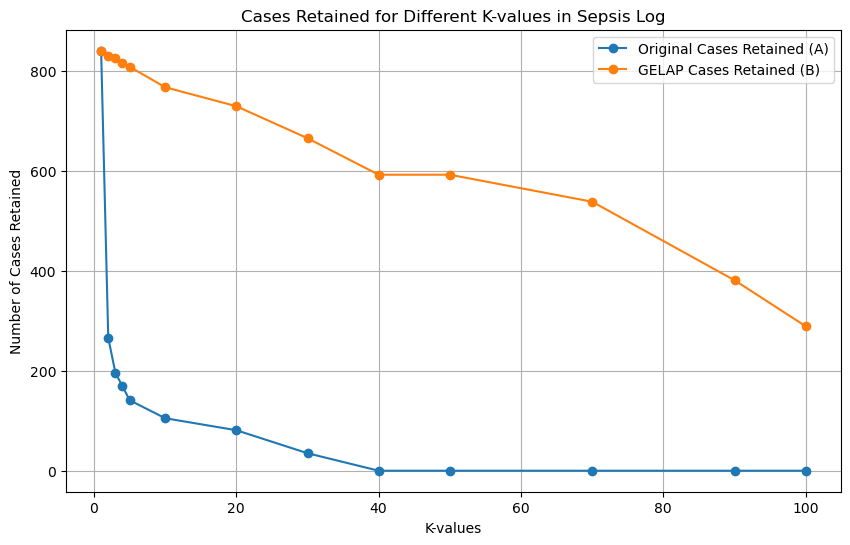

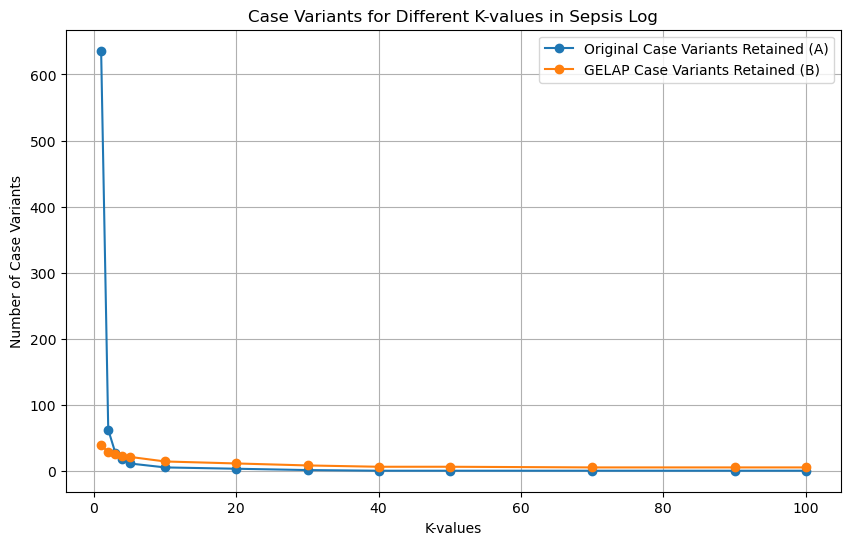

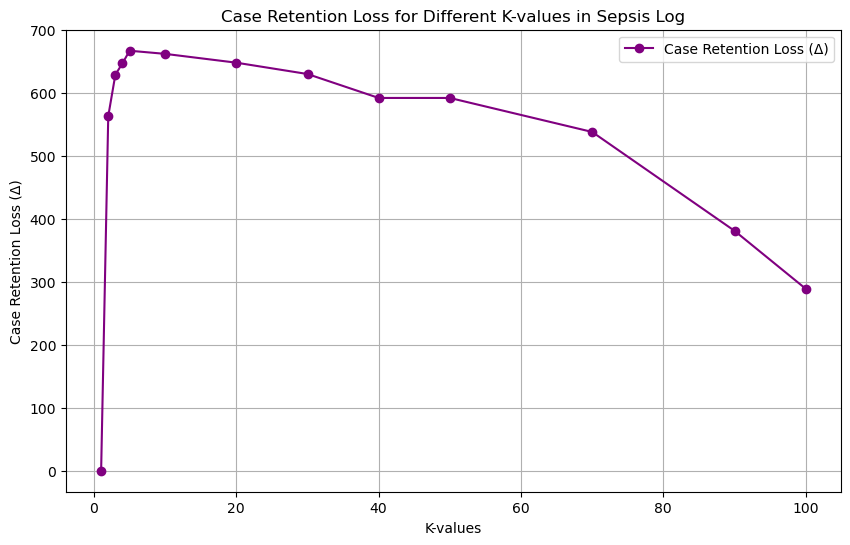

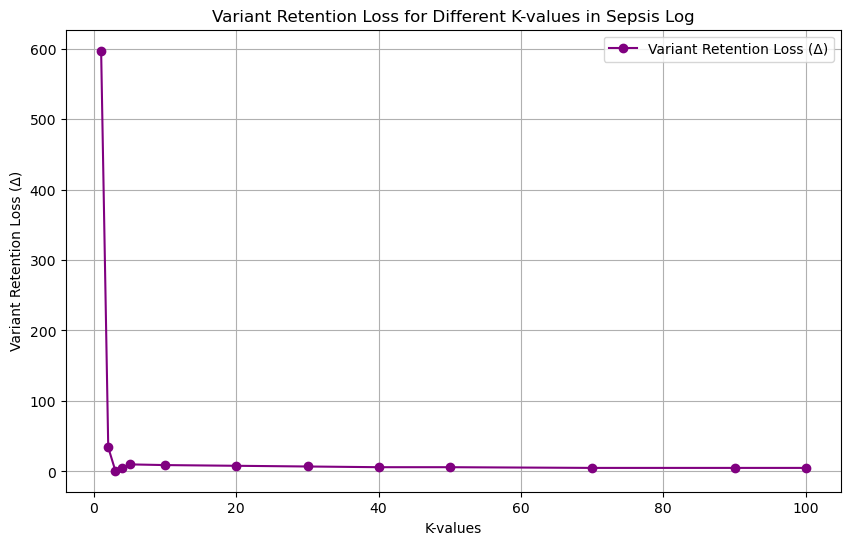

In [202]:
import matplotlib.pyplot as plt

# Data for Sepsis log based on the two tables for k-values
k_values = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 70, 90, 100]
original_cases_retained = [840, 266, 196, 169, 141, 105, 81, 35, 0, 0, 0, 0, 0]
gelap_cases_retained = [840, 829, 825, 816, 808, 767, 729, 665, 592, 592, 538, 381, 289]
original_case_variants = [636, 62, 27, 18, 11, 5, 3, 1, 0, 0, 0, 0, 0]
gelap_case_variants = [39, 28, 26, 23, 21, 14, 11, 8, 6, 6, 5, 5, 5]

# Plotting filtered and anonymized cases retained
plt.figure(figsize=(10, 6))
plt.plot(k_values, original_cases_retained, label="Original Cases Retained (A)", marker='o')
plt.plot(k_values, gelap_cases_retained, label="GELAP Cases Retained (B)", marker='o')
plt.xlabel("K-values")
plt.ylabel("Number of Cases Retained")
plt.title("Cases Retained for Different K-values in Sepsis Log")
plt.legend()
plt.grid(True)
plt.show()

# Plotting filtered and anonymized case variants
plt.figure(figsize=(10, 6))
plt.plot(k_values, original_case_variants, label="Original Case Variants Retained (A)", marker='o')
plt.plot(k_values, gelap_case_variants, label="GELAP Case Variants Retained (B)", marker='o')
plt.xlabel("K-values")
plt.ylabel("Number of Case Variants")
plt.title("Case Variants for Different K-values in Sepsis Log")
plt.legend()
plt.grid(True)
plt.show()

# Plotting Delta Variance (B-A) for Sepsis Cases
case_retention_loss = [b - a for a, b in zip(original_cases_retained, gelap_cases_retained)]
plt.figure(figsize=(10, 6))
plt.plot(k_values, case_retention_loss, label="Case Retention Loss (Δ)", marker='o', color='purple')
plt.xlabel("K-values")
plt.ylabel("Case Retention Loss (Δ)")
plt.title("Case Retention Loss for Different K-values in Sepsis Log")
plt.legend()
plt.grid(True)
plt.show()

# Plotting Delta Variance (B-A) for Sepsis Cases
variant_retention_loss = [abs (b - a) for a, b in zip(original_case_variants, gelap_case_variants)]
plt.figure(figsize=(10, 6))
plt.plot(k_values, variant_retention_loss, label="Variant Retention Loss (Δ)", marker='o', color='purple')
plt.xlabel("K-values")
plt.ylabel("Variant Retention Loss (Δ)")
plt.title("Variant Retention Loss for Different K-values in Sepsis Log")
plt.legend()
plt.grid(True)
plt.show()

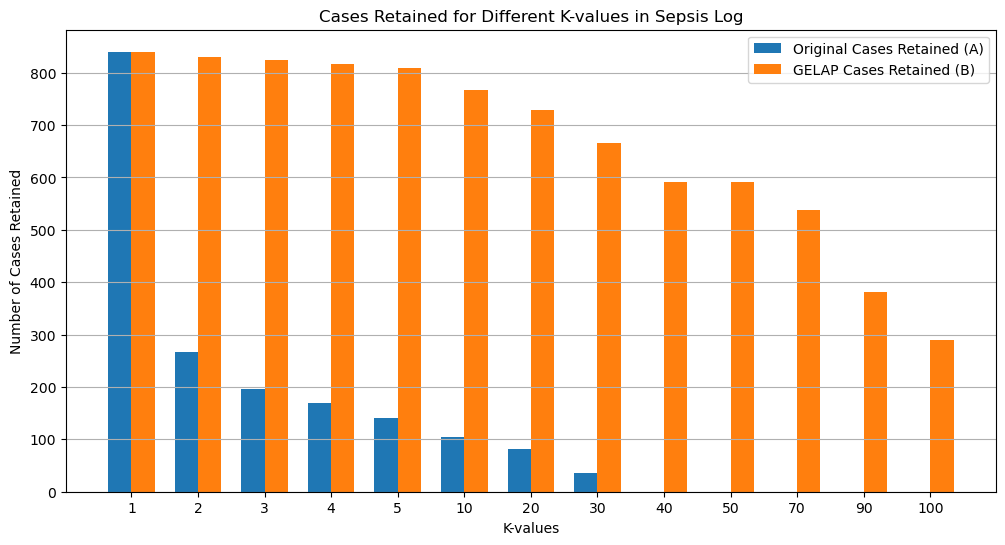

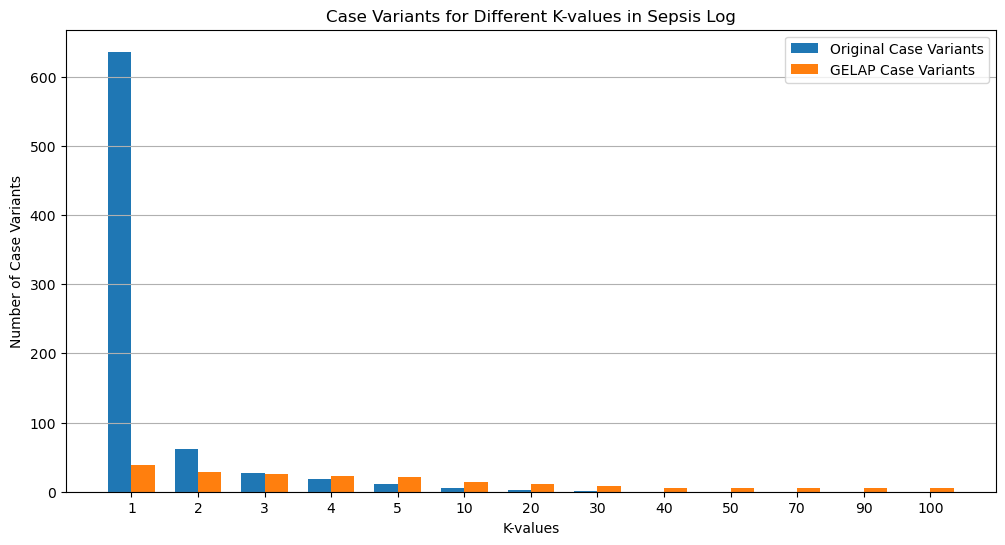

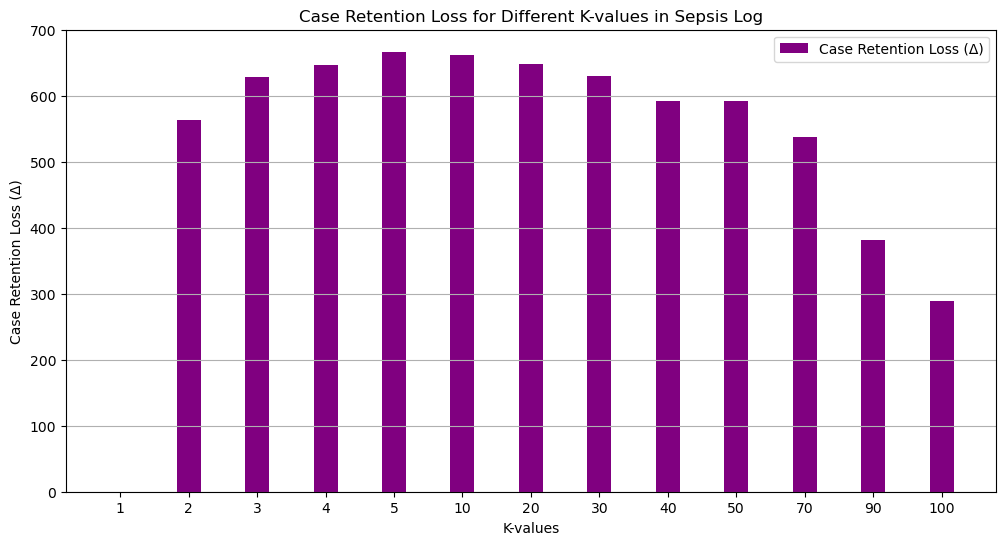

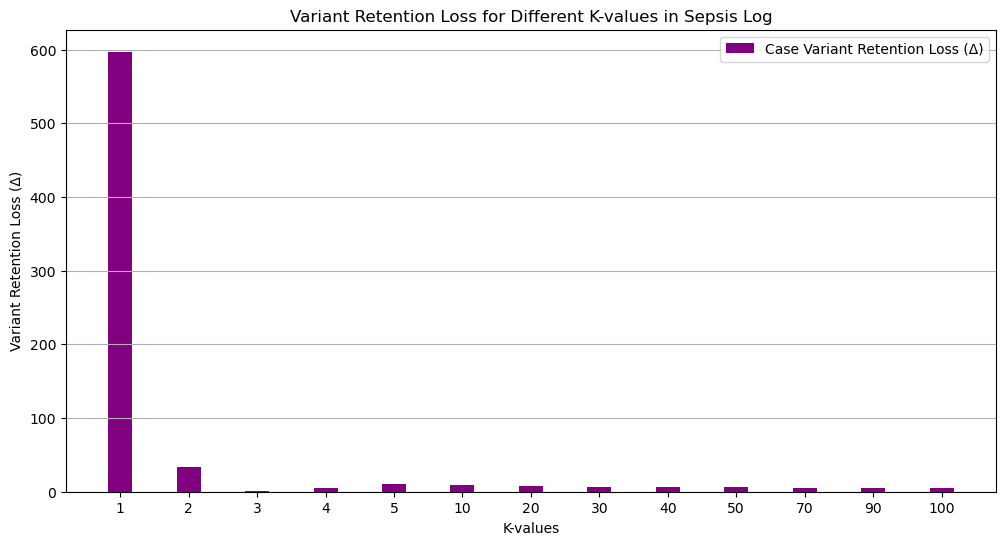

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Sepsis log based on the two tables for k-values
k_values = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 70, 90, 100]
original_cases_retained = [840, 266, 196, 169, 141, 105, 81, 35, 0, 0, 0, 0, 0]
gelap_cases_retained = [840, 829, 825, 816, 808, 767, 729, 665, 592, 592, 538, 381, 289]
original_case_variants = [636, 62, 27, 18, 11, 5, 3, 1, 0, 0, 0, 0, 0]
gelap_case_variants = [39, 28, 26, 23, 21, 14, 11, 8, 6, 6, 5, 5, 5]
case_retention_loss = [b - a for a, b in zip(original_cases_retained, gelap_cases_retained)]
variant_retention_loss = [abs(b - a) for a, b in zip(original_case_variants, gelap_case_variants ) ]

# Histogram for cases retained
plt.figure(figsize=(12, 6))
bar_width = 0.35
k_indexes = np.arange(len(k_values))

plt.bar(k_indexes - bar_width/2, original_cases_retained, width=bar_width, label="Original Cases Retained (A)")
plt.bar(k_indexes + bar_width/2, gelap_cases_retained, width=bar_width, label="GELAP Cases Retained (B)")
plt.xticks(k_indexes, k_values)
plt.xlabel("K-values")
plt.ylabel("Number of Cases Retained")
plt.title("Cases Retained for Different K-values in Sepsis Log")
plt.legend()
plt.grid(True, axis='y')
plt.show()

# Histogram for case variants
plt.figure(figsize=(12, 6))
plt.bar(k_indexes - bar_width/2, original_case_variants, width=bar_width, label="Original Case Variants")
plt.bar(k_indexes + bar_width/2, gelap_case_variants, width=bar_width, label="GELAP Case Variants")
plt.xticks(k_indexes, k_values)
plt.xlabel("K-values")
plt.ylabel("Number of Case Variants")
plt.title("Case Variants for Different K-values in Sepsis Log")
plt.legend()
plt.grid(True, axis='y')
plt.show()

# Histogram for Case Retention Loss (Δ)
plt.figure(figsize=(12, 6))
plt.bar(k_indexes, case_retention_loss, width=bar_width, color='purple', label="Case Retention Loss (Δ)")
plt.xticks(k_indexes, k_values)
plt.xlabel("K-values")
plt.ylabel("Case Retention Loss (Δ)")
plt.title("Case Retention Loss for Different K-values in Sepsis Log")
plt.legend()
plt.grid(True, axis='y')
plt.show()

# Histogram for Case Retention Loss (Δ)
plt.figure(figsize=(12, 6))
plt.bar(k_indexes, variant_retention_loss, width=bar_width, color='purple', label="Case Variant Retention Loss (Δ)")
plt.xticks(k_indexes, k_values)
plt.xlabel("K-values")
plt.ylabel("Variant Retention Loss (Δ)")
plt.title("Variant Retention Loss for Different K-values in Sepsis Log")
plt.legend()
plt.grid(True, axis='y')
plt.show()


In [ ]:
#Bar plot   #Not required

# import matplotlib.pyplot as plt
# import numpy as np

# # Define k-values and data for Sepsis log (replace these with actual data if different)
# k_values = [2, 3, 4, 5, 10, 20, 30, 40, 50, 70, 90, 100]
# cases_retained_original = [266, 196, 169, 141, 105, 81, 35, 0, 0, 0, 0, 0]
# cases_retained_gelap = [829, 825, 816, 808, 767, 729, 665, 592, 592, 538, 381, 289]
# case_variants_retained_original = [62, 27, 18, 11, 5, 3, 1, 0, 0, 0, 0, 0]
# case_variants_retained_gelap = [28, 26, 23, 21, 14, 11, 8, 6, 6, 5, 5, 5]
# case_retention_loss = [563, 629, 647, 667, 662, 648, 630, 592, 592, 538, 381, 289]

# # Define bar width and position
# bar_width = 0.08
# k_indexes = np.arange(len(k_values))

# # Plot for Cases Retained
# plt.figure(figsize=(12, 8))
# plt.bar(k_indexes - 1.5 * bar_width, cases_retained_original, width=bar_width, label="Original Cases Retained")
# plt.bar(k_indexes - 0.5 * bar_width, cases_retained_gelap, width=bar_width, label="GELAP Cases Retained")
# plt.bar(k_indexes + 0.5 * bar_width, case_variants_retained_original, width=bar_width, label="Original Case Variants Retained")
# plt.bar(k_indexes + 1.5 * bar_width, case_variants_retained_gelap, width=bar_width, label="GELAP Case Variants Retained")

# # Annotate the bars with values
# for i, val in enumerate(cases_retained_original):
#     plt.text(k_indexes[i] - 1.5 * bar_width, val + 0.02, round(val, 2), ha='center', va='bottom', fontsize=8)
# for i, val in enumerate(cases_retained_gelap):
#     plt.text(k_indexes[i] - 0.5 * bar_width, val + 0.02, round(val, 2), ha='center', va='bottom', fontsize=8)
# for i, val in enumerate(case_variants_retained_original):
#     plt.text(k_indexes[i] + 0.5 * bar_width, val + 0.02, round(val, 2), ha='center', va='bottom', fontsize=8)
# for i, val in enumerate(case_variants_retained_gelap):
#     plt.text(k_indexes[i] + 1.5 * bar_width, val + 0.02, round(val, 2), ha='center', va='bottom', fontsize=8)

# # Add labels and title
# plt.xticks(k_indexes, k_values)
# plt.xlabel("K-values")
# plt.ylabel("Count")
# plt.title("Cases and Case Variants Retained for Different K-values (Up to 100)")
# plt.legend()
# plt.grid(axis='y')

# plt.show()

# # Plot for Case Retention Loss
# plt.figure(figsize=(12, 6))
# plt.bar(k_indexes, case_retention_loss, color='orange', width=bar_width, label="Case Retention Loss (Δ)")

# # Annotate the bars with values
# for i, val in enumerate(case_retention_loss):
#     plt.text(k_indexes[i], val + 0.02, round(val, 2), ha='center', va='bottom', fontsize=8)

# # Add labels and title
# plt.xticks(k_indexes, k_values)
# plt.xlabel("K-values")
# plt.ylabel("Case Retention Loss (Δ)")
# plt.title("Case Retention Loss for Different K-values in Sepsis Log (Up to 100)")
# plt.legend()
# plt.grid(axis='y')

# plt.show()

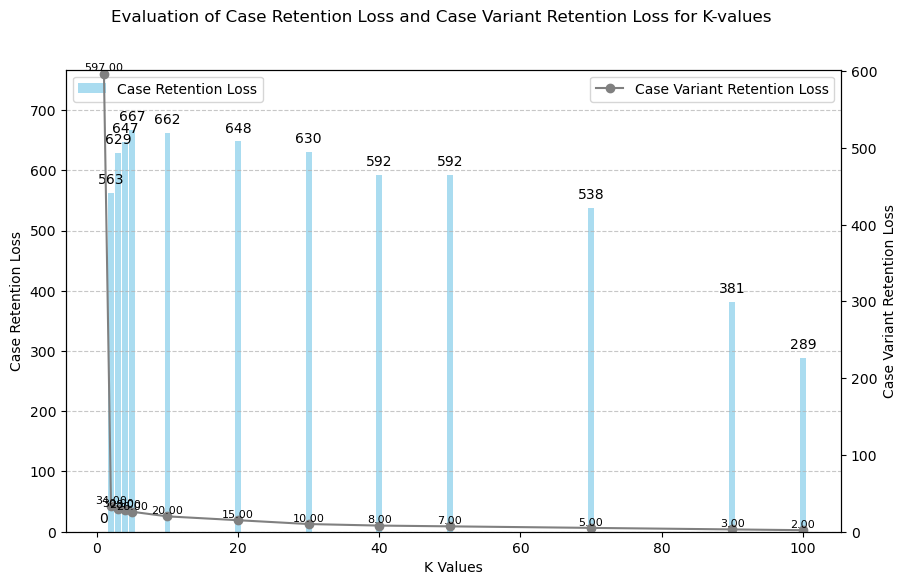

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data based on the Sepsis data provided
k_values = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 70, 90, 100]
case_retention_loss = [0, 563, 629, 647, 667, 662, 648, 630, 592, 592, 538, 381, 289]  
case_variant_retention_loss = [597, 34, 30, 28, 26, 20, 15, 10, 8, 7, 5, 3, 2]  

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Case Retention Loss on the left y-axis
ax1.bar(k_values, case_retention_loss, color='skyblue', label='Case Retention Loss', alpha=0.7)
ax1.set_xlabel('K Values')
ax1.set_ylabel('Case Retention Loss')
ax1.set_ylim(0, max(case_retention_loss) + 100)

# Adding case retention loss values on top of the bars
for i, v in enumerate(case_retention_loss):
    ax1.text(k_values[i], v + 10, f"{v}", ha='center', va='bottom')

# Plotting Case Variant Retention Loss on the right y-axis
ax2 = ax1.twinx()
ax2.plot(k_values, case_variant_retention_loss, color='gray', marker='o', label='Case Variant Retention Loss')
ax2.set_ylabel('Case Variant Retention Loss')
ax2.set_ylim(0, max(case_variant_retention_loss) + 5)

# Adding data utility values above the points
for i, v in enumerate(case_variant_retention_loss):
    ax2.text(k_values[i], v + 0.5, f"{v:.2f}", ha='center', va='bottom', fontsize=8)

# Adding grid, title, and legend
ax1.grid(axis='y', linestyle='--', alpha=0.7)
fig.suptitle('Evaluation of Case Retention Loss and Case Variant Retention Loss for K-values')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Define k-values and data for Sepsis log (replace these with actual data if different)
# k_values = [2, 3, 4, 5, 10, 20, 30, 40, 50, 70, 90, 100]
# cases_retained_original = [266, 196, 169, 141, 105, 81, 35, 0, 0, 0, 0, 0]
# cases_retained_gelap = [829, 825, 816, 808, 767, 729, 665, 592, 592, 538, 381, 289]
# case_variants_retained_original = [62, 27, 18, 11, 5, 3, 1, 0, 0, 0, 0, 0]
# case_variants_retained_gelap = [28, 26, 23, 21, 14, 11, 8, 6, 6, 5, 5, 5]
# case_retention_loss = [563, 629, 647, 667, 662, 648, 630, 592, 592, 538, 381, 289]
# variant_retention_loss = [34, 1, 5, 10, 9, 8, 7, 6, 6, 5, 5, 5]

# # Set up the bin edges based on k-values
# bins = np.arange(len(k_values) + 1)

# plt.figure(figsize=(12, 8))

# # Histogram for Cases Retained (Original and GELAP)
# plt.hist([bins[:-1], bins[:-1]], bins=bins, weights=[cases_retained_original, cases_retained_gelap], 
#          label=["Original Cases Retained", "GELAP Cases Retained"], histtype='bar', alpha=0.6)

# # Histogram for Case Variants Retained (Original and GELAP)
# plt.hist([bins[:-1], bins[:-1]], bins=bins, weights=[case_variants_retained_original, case_variants_retained_gelap], 
#          label=["Original Case Variants Retained", "GELAP Case Variants Retained"], histtype='bar', alpha=0.6)

# # Set tick positions and labels to k-values
# plt.xticks(bins[:-1] + 0.5, k_values)
# plt.xlabel("K-values")
# plt.ylabel("Count")
# plt.title("Cases and Case Variants Retained for Different K-values (Up to 100)")
# plt.legend()
# plt.grid(axis='y')

# plt.show()

# # Histogram for Case Retention Loss
# plt.figure(figsize=(12, 6))
# plt.hist(bins[:-1], bins=bins, weights=case_retention_loss, color='green', label="Case Retention Loss (Δ)", alpha=0.6)

# # Set tick positions and labels to k-values
# plt.xticks(bins[:-1] + 0.5, k_values)
# plt.xlabel("K-values")
# plt.ylabel("Case Retention Loss (Δ)")
# plt.title("Case Retention Loss for Different K-values in Sepsis Log (Up to 100)")
# plt.legend()
# plt.grid(axis='y')

# plt.show()

# # Histogram for Variant Retention Loss
# plt.figure(figsize=(12, 6))
# plt.hist(bins[:-1], bins=bins, weights=variant_retention_loss, color='green', label="Variant Retention Loss (Δ)", alpha=0.6)

# # Set tick positions and labels to k-values
# plt.xticks(bins[:-1] + 0.5, k_values)
# plt.xlabel("K-values")
# plt.ylabel("Variant Retention Loss (Δ)")
# plt.title("Variant Retention Loss for Different K-values in Sepsis Log (Up to 100)")
# plt.legend()
# plt.grid(axis='y')

# plt.show()